In [1]:
import dask.dataframe as dd
import pandas as pd

In [2]:
# reading the data of a dask directory and converting into a pandas dataframe
def read_dd_to_pandas(route):
    route_dask_df = dd.read_csv("~/data/leavetimes_split_by_route/{}/*.part".format(route))
    route_dask_df = route_dask_df.drop('Unnamed: 0', axis=1)
    route_pd_df = route_dask_df.compute()
    route_pd_df = route_pd_df.reset_index()
    route_pd_df["DAYOFSERVICE"] = pd.to_datetime(route_pd_df["DAYOFSERVICE"])
    route_pd_df["LASTUPDATE"] = pd.to_datetime(route_pd_df["LASTUPDATE"])

    return route_pd_df

In [3]:
route_pd_df = read_dd_to_pandas("route1")

In [4]:
route_pd_df.head()

,index,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE
0,0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,2018-01-08 17:21:10
1,1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,2018-01-08 17:21:10
2,2,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,2018-01-08 17:21:10
3,3,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,2018-01-08 17:21:10
4,4,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,2018-01-08 17:21:10


In [5]:
len(route_pd_df)

1336960

In [6]:
# get the memory in bytes
route_pd_df.memory_usage(deep=True).sum()

139043968

The dataset I choose was the first one in the file, it has 1336960 rows of data, and that takes estimated 300 mb of memory

In [7]:
route_pd_df.head()

,index,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE
0,0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,2018-01-08 17:21:10
1,1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,2018-01-08 17:21:10
2,2,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,2018-01-08 17:21:10
3,3,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,2018-01-08 17:21:10
4,4,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,2018-01-08 17:21:10


In [8]:
route_pd_df.dtypes

index                       int64
DAYOFSERVICE       datetime64[ns]
TRIPID                      int64
PROGRNUMBER                 int64
STOPPOINTID                 int64
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR              int64
ACTUALTIME_DEP              int64
VEHICLEID                   int64
SUPPRESSED                float64
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
dtype: object

In [9]:
# datetime things
route_pd_df["DAYOFSERVICE"] = pd.to_datetime(route_pd_df["DAYOFSERVICE"])
route_pd_df["LASTUPDATE"] = pd.to_datetime(route_pd_df["LASTUPDATE"])

# categorical things
route_pd_df["TRIPID"] = route_pd_df["TRIPID"].astype("category")
route_pd_df["VEHICLEID"] = route_pd_df["VEHICLEID"].astype("category")
route_pd_df["SUPPRESSED"] = route_pd_df["SUPPRESSED"].astype("category")
route_pd_df["STOPPOINTID"] = route_pd_df["STOPPOINTID"].astype("category")
route_pd_df["PROGRNUMBER"] = route_pd_df["PROGRNUMBER"].astype("category")

# NUMBERICAL tings
# these are the time features, will keep these the same as before

In [10]:
route_pd_df.dtypes

index                       int64
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
PROGRNUMBER              category
STOPPOINTID              category
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR              int64
ACTUALTIME_DEP              int64
VEHICLEID                category
SUPPRESSED               category
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
dtype: object

In [11]:
route_pd_df.max()

index                              9131
DAYOFSERVICE        2018-12-31 00:00:00
PLANNEDTIME_ARR                   86160
PLANNEDTIME_DEP                   86160
ACTUALTIME_ARR                    87714
ACTUALTIME_DEP                    87714
JUSTIFICATIONID    484981386676289600.0
LASTUPDATE          2019-01-16 18:27:21
dtype: object

In [12]:
route_pd_df.min()

index                                0
DAYOFSERVICE       2018-01-01 00:00:00
PLANNEDTIME_ARR                  23400
PLANNEDTIME_DEP                  23400
ACTUALTIME_ARR                   22841
ACTUALTIME_DEP                   22841
JUSTIFICATIONID               181761.0
LASTUPDATE         2018-01-08 17:21:10
dtype: object

We can see if there are extreme outliers in the dataset by looking at the min and max

There does not seem to be any

# Read the trips file

need to get a list opf routes taht are valid from the gtfs-r feed data, use that information to see if our data is okay, if we need to adjust the times so that there are no massive issues.

so we can get the route of the and see how it compares with the modern route

## things to do

create a table for routes : list of stations

compare the stations for the route in the dataset to the live stations

think about what we want to do if there are massive differences/ little differences



In [34]:
# read the data files that we need to use
dublin_bus_stoptimes = pd.read_csv("~/data/dublin_bus/stop_times.txt")
go_ahead_stoptimes = pd.read_csv("~/data/dublin_go_ireland/stop_times.txt")
dublin_bus_stops = pd.read_csv("~/data/dublin_bus/stops.txt")
go_ahead_stops = pd.read_csv("~/data/dublin_go_ireland/stops.txt")
dublin_bus_trips_data = pd.read_csv("~/data/dublin_bus/trips.txt")
go_ahead_trips = pd.read_csv("~/data/dublin_go_ireland/trips.txt")
# the route ids are froo dublin bus hosted buses
dublin_bus_routes = pd.read_csv("~/data/dublin_bus/routes.txt")
go_ahead_routes = pd.read_csv("~/data/dublin_go_ireland/routes.txt")

In [35]:
dublin_bus_stoptimes.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,5242.y1005.60-1-d12-1.1.O,21:00:00,21:00:00,8240DB000226,1,Sandymount,0,0,0.00
1,5242.y1005.60-1-d12-1.1.O,21:00:38,21:00:38,8220DB000228,2,Sandymount,0,0,267.48
2,5242.y1005.60-1-d12-1.1.O,21:01:11,21:01:11,8240DB000229,3,Sandymount,0,0,483.53
3,5242.y1005.60-1-d12-1.1.O,21:02:02,21:02:02,8240DB000227,4,Sandymount,0,0,834.47
4,5242.y1005.60-1-d12-1.1.O,21:02:35,21:02:35,8240DB000230,5,Sandymount,0,0,1063.49


In [36]:
# get the conversion between the route
route_ids = list(dublin_bus_routes.route_id)
values = list(dublin_bus_routes.route_short_name)

dublin_bus_conv = {}
for i in range(len(route_ids)):
    dublin_bus_conv[route_ids[i]] = values[i]

go_ahead_route_ids = list(go_ahead_routes.route_id)
go_ahead_values = list(go_ahead_routes.route_short_name)

go_ahead_conv = {}
for i in range(len(go_ahead_route_ids)):
    go_ahead_conv[go_ahead_route_ids[i]] = go_ahead_values[i]


In [37]:

# get the short version of the stiop id, to convert
# stopid long version to short version
dublin_bus_stop_values = []
for stop in dublin_bus_stops.stop_name:
    dublin_bus_name_number = stop.split()
    dublin_bus_stop_values.append(dublin_bus_name_number[-1])
    
go_ahead_stop_values = []
for stop in go_ahead_stops.stop_name:
    go_ahead_name_number = stop.split()
    go_ahead_stop_values.append(go_ahead_name_number[-1])

# converting the stop if to the stop number
dublin_bus_stop_keys = list(dublin_bus_stops.stop_id)
go_ahead_stop_keys = list(go_ahead_stops.stop_id)

# create a dictionary of the conversion of the stopids to the stop number
# as the old dataset only contains the stop numbers, easy to compare
go_ahead_stop_conv = {}
for i in range(len(go_ahead_stop_keys)):
    go_ahead_stop_conv[go_ahead_stop_keys[i]] = go_ahead_stop_values[i]
    
dublin_bus_stop_conv = {}
for i in range(len(dublin_bus_stop_keys)):
    dublin_bus_stop_conv[dublin_bus_stop_keys[i]] = dublin_bus_stop_values[i]
    
# get the conversions between the tripids to route id
dublin_bus_trip_to_routes = {}
dublin_bus_trip_to_routes_keys = list(dublin_bus_trips_data.trip_id)
dublin_bus_trip_to_routes_values = list(dublin_bus_trips_data.route_id)

for i in range(len(dublin_bus_trip_to_routes_keys)):
    dublin_bus_trip_to_routes[dublin_bus_trip_to_routes_keys[i]] = dublin_bus_conv[dublin_bus_trip_to_routes_values[i]]
    

go_ahead_trip_to_routes = {}
go_ahead_trip_to_routes_keys = list(go_ahead_trips.trip_id)
go_ahead_trip_to_routes_values = list(go_ahead_trips.route_id)

for i in range(len(go_ahead_trip_to_routes_keys)):
    go_ahead_trip_to_routes[go_ahead_trip_to_routes_keys[i]] = go_ahead_conv[go_ahead_trip_to_routes_values[i]]

In [38]:
dublin_bus_trip_to_routes

{'3736.y1003.60-116-b12-1.57.I': '116',
 '3737.y1003.60-116-b12-1.56.O': '116',
 '3907.y1005.60-116-d12-1.57.I': '116',
 '3908.y1005.60-116-d12-1.56.O': '116',
 '3770.y1003.60-118-b12-1.58.I': '118',
 '3911.y1005.60-118-d12-1.58.I': '118',
 '3954.y1005.60-118-d12-1.58.I': '118',
 '14016.y1004.60-11-b12-1.18.I': '11',
 '14017.y1004.60-11-b12-1.17.O': '11',
 '14018.y1004.60-11-b12-1.18.I': '11',
 '14019.y1004.60-11-b12-1.17.O': '11',
 '14020.y1004.60-11-b12-1.18.I': '11',
 '14021.y1004.60-11-b12-1.17.O': '11',
 '14022.y1004.60-11-b12-1.18.I': '11',
 '14023.y1004.60-11-b12-1.17.O': '11',
 '14024.y1004.60-11-b12-1.18.I': '11',
 '14025.y1004.60-11-b12-1.17.O': '11',
 '14026.y1004.60-11-b12-1.18.I': '11',
 '14027.y1004.60-11-b12-1.17.O': '11',
 '14028.y1004.60-11-b12-1.18.I': '11',
 '14029.y1004.60-11-b12-1.17.O': '11',
 '14030.y1004.60-11-b12-1.18.I': '11',
 '14031.y1004.60-11-b12-1.17.O': '11',
 '14032.y1004.60-11-b12-1.18.I': '11',
 '14033.y1004.60-11-b12-1.17.O': '11',
 '14034.y1004.60-1

In [39]:
dublin_bus_stoptimes.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,5242.y1005.60-1-d12-1.1.O,21:00:00,21:00:00,8240DB000226,1,Sandymount,0,0,0.00
1,5242.y1005.60-1-d12-1.1.O,21:00:38,21:00:38,8220DB000228,2,Sandymount,0,0,267.48
2,5242.y1005.60-1-d12-1.1.O,21:01:11,21:01:11,8240DB000229,3,Sandymount,0,0,483.53
3,5242.y1005.60-1-d12-1.1.O,21:02:02,21:02:02,8240DB000227,4,Sandymount,0,0,834.47
4,5242.y1005.60-1-d12-1.1.O,21:02:35,21:02:35,8240DB000230,5,Sandymount,0,0,1063.49


In [40]:
go_ahead_stoptimes.head()

,trip_id,arrival_time,departure_time,stop_id,stop_sequence,stop_headsign,pickup_type,drop_off_type,shape_dist_traveled
0,1143.y1006.17-130-cm1-1.82.I,06:10:00,06:10:00,8260B136421,1,NaN,0,0,0.00
1,1143.y1006.17-130-cm1-1.82.I,06:18:00,06:18:00,8260B1324001,2,NaN,0,0,7572.44
2,1143.y1006.17-130-cm1-1.82.I,06:25:00,06:25:00,8260B1408801,3,NaN,0,0,15897.87
3,1143.y1006.17-130-cm1-1.82.I,06:32:00,06:32:00,8260B136431,4,NaN,0,0,22830.16
4,1143.y1006.17-130-cm1-1.82.I,06:34:00,06:34:00,8260B136391,5,NaN,0,0,24442.99


In [41]:
dublin_bus_stoptimes.shape

(1627385, 9)

In [42]:
go_ahead_stoptimes.shape

(1287241, 9)

In [43]:
#replacing the values
%time dublin_bus_stoptimes["stop_id"].replace(dublin_bus_stop_conv, inplace = True)
%time go_ahead_stoptimes["stop_id"].replace(go_ahead_stop_conv, inplace=True)

CPU times: user 3min 22s, sys: 25.6 s, total: 3min 47s
Wall time: 13min 29s
CPU times: user 1min 14s, sys: 2.18 s, total: 1min 16s
Wall time: 1min 18s


In [44]:
go_ahead_route_stations = go_ahead_stoptimes.groupby("trip_id")["stop_id"].apply(list).reset_index(name='stops')

In [45]:
dublin_bus_route_stations = dublin_bus_stoptimes.groupby("trip_id")["stop_id"].apply(list).reset_index(name='stops')

In [46]:
dublin_bus_trip_to_routes

{'3736.y1003.60-116-b12-1.57.I': '116',
 '3737.y1003.60-116-b12-1.56.O': '116',
 '3907.y1005.60-116-d12-1.57.I': '116',
 '3908.y1005.60-116-d12-1.56.O': '116',
 '3770.y1003.60-118-b12-1.58.I': '118',
 '3911.y1005.60-118-d12-1.58.I': '118',
 '3954.y1005.60-118-d12-1.58.I': '118',
 '14016.y1004.60-11-b12-1.18.I': '11',
 '14017.y1004.60-11-b12-1.17.O': '11',
 '14018.y1004.60-11-b12-1.18.I': '11',
 '14019.y1004.60-11-b12-1.17.O': '11',
 '14020.y1004.60-11-b12-1.18.I': '11',
 '14021.y1004.60-11-b12-1.17.O': '11',
 '14022.y1004.60-11-b12-1.18.I': '11',
 '14023.y1004.60-11-b12-1.17.O': '11',
 '14024.y1004.60-11-b12-1.18.I': '11',
 '14025.y1004.60-11-b12-1.17.O': '11',
 '14026.y1004.60-11-b12-1.18.I': '11',
 '14027.y1004.60-11-b12-1.17.O': '11',
 '14028.y1004.60-11-b12-1.18.I': '11',
 '14029.y1004.60-11-b12-1.17.O': '11',
 '14030.y1004.60-11-b12-1.18.I': '11',
 '14031.y1004.60-11-b12-1.17.O': '11',
 '14032.y1004.60-11-b12-1.18.I': '11',
 '14033.y1004.60-11-b12-1.17.O': '11',
 '14034.y1004.60-1

In [47]:
%time dublin_bus_route_stations["trip_id"].replace(dublin_bus_trip_to_routes, inplace=True)

CPU times: user 28.4 s, sys: 549 ms, total: 28.9 s
Wall time: 28.9 s


In [48]:
len(go_ahead_trip_to_routes)

27048

In [49]:
len(dublin_bus_trip_to_routes)

28401

In [50]:
%time go_ahead_route_stations["trip_id"].replace(go_ahead_trip_to_routes, inplace=True)

CPU times: user 24.7 s, sys: 278 ms, total: 24.9 s
Wall time: 24.9 s


In [51]:
len(go_ahead_route_stations)

27048

In [52]:
dublin_bus_route_stations.head()

,trip_id,stops
0,38,"[4745, 4989, 4990, 4991, 4992, 1719, 1828, 182..."
1,38,"[4745, 4989, 4990, 4991, 4992, 1719, 1828, 182..."
2,151,"[7514, 2279, 6251, 5140, 1500, 302, 4495, 4522..."
3,151,"[7514, 2279, 6251, 5140, 1500, 302, 4495, 4522..."
4,151,"[4606, 7142, 7015, 4617, 4555, 4552, 4554, 341..."


In [53]:
# need to groupby the rows of the daataframe
go_ahead_single_route_stations = go_ahead_route_stations.groupby("trip_id")["stops"].apply(sum).reset_index(name='stops')
dublin_bus_single_route_stations = dublin_bus_route_stations.groupby("trip_id")["stops"].apply(sum).reset_index(name='stops')

In [54]:
#getting unique values in the list
for i in range(len(dublin_bus_single_route_stations)):
    dublin_bus_single_route_stations["stops"][i] = list(set(dublin_bus_single_route_stations["stops"][i]))
    
for i in range(len(go_ahead_single_route_stations)):
    go_ahead_single_route_stations["stops"][i] = list(set(go_ahead_single_route_stations["stops"][i])) 

In [55]:
all_routes = pd.concat([dublin_bus_single_route_stations, go_ahead_single_route_stations]).reset_index()

In [56]:
all_routes.to_csv("~/data/routes_stopslist_2021.csv")

In [57]:
route_pd_df = route_pd_df.reset_index()

In [58]:
route_pd_df.head()

,level_0,index,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,date_and_time
0,0,0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,2018-01-08 17:21:10,2018-01-01 13:00:00
1,1,1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,2018-01-08 17:21:10,2018-01-01 15:00:00
2,2,2,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,2018-01-08 17:21:10,2018-01-01 16:00:00
3,3,3,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,2018-01-08 17:21:10,2018-01-01 16:00:00
4,4,4,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,2018-01-08 17:21:10,2018-01-01 15:00:00


In [59]:
old_route_stop_list = list(route_pd_df["STOPPOINTID"].unique())
current_route_stop_list = all_routes["stops"][all_routes["trip_id"] == "1"].values

In [60]:
current_route_stop_list

array([list(['228', '340', '1642', '10', '388', '203', '21', '350', '227', '372', '17', '12', '119', '49', '381', '85', '390', '395', '355', '352', '351', '51', '224', '7602', '396', '265', '7741', '7739', '4432', '7000', '278', '52', '1620', '204', '47', '19', '7603', '373', '397', '391', '18', '213', '229', '231', '392', '46', '214', '400', '319', '220', '7615', '44', '371', '45', '354', '356', '357', '230', '387', '221', '225', '374', '398', '271', '14', '389', '7740', '353', '1641', '7738', '393', '223', '48', '205', '226', '222', '15', '399'])],
      dtype=object)

In [61]:
old_route_stop_list = list(map(str,old_route_stop_list))

In [62]:
def find_difference(list1, list2):
    diff_set = set(list1).symmetric_difference(set(list2))
    return list(diff_set)

In [63]:
find_difference(old_route_stop_list, current_route_stop_list[0])

['378',
 '4451',
 '376',
 '382',
 '2804',
 '385',
 '383',
 '384',
 '7740',
 '375',
 '7741',
 '7739',
 '7738',
 '7000',
 '380',
 '377']

In [64]:
import os

In [65]:
testing = all_routes["stops"][all_routes["trip_id"] == "142"].values

In [66]:
len(testing[0])

102

In [67]:
test_route_pd_df = read_dd_to_pandas("route"+"142")

In [68]:
test_old_route_stop_list = list(route_pd_df["STOPPOINTID"].unique())
test_old_route_stop_list = list(map(str,test_old_route_stop_list))


In [69]:
find_difference(test_old_route_stop_list, testing[0])

['6055',
 '228',
 '340',
 '1642',
 '7194',
 '2819',
 '2810',
 '876',
 '3634',
 '350',
 '6310',
 '227',
 '1022',
 '2499',
 '3643',
 '3616',
 '1076',
 '49',
 '1026',
 '2896',
 '3605',
 '3628',
 '1073',
 '351',
 '51',
 '905',
 '4331',
 '7602',
 '396',
 '265',
 '6010',
 '3632',
 '4432',
 '278',
 '52',
 '1620',
 '204',
 '1062',
 '47',
 '1072',
 '3625',
 '7603',
 '18',
 '229',
 '231',
 '392',
 '380',
 '378',
 '3631',
 '3642',
 '4451',
 '1353',
 '214',
 '3641',
 '4495',
 '319',
 '1354',
 '7195',
 '6052',
 '7196',
 '4528',
 '220',
 '44',
 '7397',
 '843',
 '357',
 '387',
 '7582',
 '221',
 '225',
 '374',
 '385',
 '398',
 '2500',
 '7578',
 '383',
 '1020',
 '389',
 '3636',
 '353',
 '1641',
 '393',
 '2809',
 '48',
 '205',
 '15',
 '6042',
 '7577',
 '1065',
 '3012',
 '1064',
 '3011',
 '10',
 '388',
 '1027',
 '376',
 '203',
 '1018',
 '21',
 '1067',
 '3607',
 '372',
 '3653',
 '1019',
 '1013',
 '17',
 '12',
 '1070',
 '119',
 '382',
 '381',
 '85',
 '390',
 '2804',
 '3615',
 '355',
 '395',
 '3656',
 '895'

In [70]:
#create new directory
diff_columns = ["route_id", "stops"]


# read all of the files
directory = 'data/leavetimes_split_by_route'
for filename in os.listdir(directory):
    
    route = filename[5:]
    print(route)
    temp_route_pd_df = read_dd_to_pandas("route"+route)
    temp_old_route_stop_list = list(route_pd_df["STOPPOINTID"].unique())
    temp_old_route_stop_list = list(map(str,temp_old_route_stop_list))
    try:
        temp_current_route_stop_list = all_routes["stops"][all_routes["trip_id"] == route.lower()].values[0]
    
#     print(temp_old_route_stop_list)
#     print("current")
#     print(temp_current_route_stop_list)
    
        current_route_difference = find_difference(temp_old_route_stop_list, temp_current_route_stop_list)
        # append the data to the dataframe
        try:     
            temp_df = pd.DataFrame([[route, current_route_difference]], columns = diff_columns)
            difference_df = pd.concat([difference_df , temp_df])
        
        except NameError:
            difference_df = pd.DataFrame([[route, current_route_difference]], columns = diff_columns)
    
            
    except IndexError:
        temp_df = pd.DataFrame([[route, []]], columns = diff_columns)
        difference_df = pd.concat([difference_df , temp_df])
        
difference_df = difference_df.reset_index()

142
79A
17A
39
42D
9
56A
63
220
42
122
29A
59
39A
41X
33X
123
32
38D
31
69X
67
27X
47
76
44
145
84X
15D
31B
77X
77A
66
40B
46A
68
32X
140
27B
33
41B
67X
17
118
7
15
66B
238
43
25
7A
39X
61
1
102
25D
111
25B
84
51D
18
40D
68X
116
66A
16D
40
54A
161
114
38
83A
83
66X
13
151
68A
33B
184
236
27
41D
31D
239
120
49
31A
104
53
27A
41A
65
15A
44B
41
33D
41C
4
46E
37
70D
84A
33E
270
75
38A
185
26
38B
70
130
7B
69
25X
79
16
51X
150
33A
7D
15B
14
25A
45A
40E
16C
14C
65B
11
76A


In [71]:
difference_df["stops"]

0      [6055, 228, 340, 1642, 7194, 2819, 2810, 876, ...
1      [228, 2706, 1443, 1480, 340, 1642, 378, 2645, ...
2      [228, 340, 1642, 1000, 4597, 1816, 1580, 113, ...
3      [1703, 7025, 1443, 7018, 228, 6088, 752, 340, ...
4                                                     []
                             ...                        
125                                                   []
126                                                   []
127    [228, 340, 1642, 1082, 1157, 2532, 1168, 1166,...
128    [228, 450, 879, 340, 1642, 4460, 887, 36, 22, ...
129    [228, 340, 1642, 4795, 1813, 2655, 2124, 2618,...
Name: stops, Length: 130, dtype: object

In [72]:
difference_df.to_csv("~/data/difference_between_old_and_current.csv")

In [73]:
actual_diff_df = pd.read_csv("~/data/difference_between_old_and_current.csv")
actual_diff_df = actual_diff_df.drop(['Unnamed: 0', "index"], axis=1)


In [74]:
import matplotlib.pyplot as plt

In [75]:
actual_diff_df.head()

,route_id,stops
0,142,"['6055', '228', '340', '1642', '7194', '2819',..."
1,79A,"['228', '2706', '1443', '1480', '340', '1642',..."
2,17A,"['228', '340', '1642', '1000', '4597', '1816',..."
3,39,"['1703', '7025', '1443', '7018', '228', '6088'..."
4,42D,[]


In [76]:
x_values = list(actual_diff_df["route_id"])

In [77]:
actual_diff_df["stops"][0][1:-2].split(",")

["'6055'",
 " '228'",
 " '340'",
 " '1642'",
 " '7194'",
 " '2819'",
 " '2810'",
 " '876'",
 " '3634'",
 " '350'",
 " '6310'",
 " '227'",
 " '1022'",
 " '2499'",
 " '3643'",
 " '3616'",
 " '1076'",
 " '49'",
 " '1026'",
 " '2896'",
 " '3605'",
 " '3628'",
 " '1073'",
 " '351'",
 " '51'",
 " '905'",
 " '4331'",
 " '7602'",
 " '396'",
 " '265'",
 " '6010'",
 " '3632'",
 " '4432'",
 " '278'",
 " '52'",
 " '1620'",
 " '204'",
 " '1062'",
 " '47'",
 " '1072'",
 " '3625'",
 " '7603'",
 " '18'",
 " '229'",
 " '231'",
 " '392'",
 " '380'",
 " '378'",
 " '3631'",
 " '3642'",
 " '4451'",
 " '1353'",
 " '214'",
 " '3641'",
 " '4495'",
 " '319'",
 " '1354'",
 " '7195'",
 " '6052'",
 " '7196'",
 " '4528'",
 " '220'",
 " '44'",
 " '7397'",
 " '843'",
 " '357'",
 " '387'",
 " '7582'",
 " '221'",
 " '225'",
 " '374'",
 " '385'",
 " '398'",
 " '2500'",
 " '7578'",
 " '383'",
 " '1020'",
 " '389'",
 " '3636'",
 " '353'",
 " '1641'",
 " '393'",
 " '2809'",
 " '48'",
 " '205'",
 " '15'",
 " '6042'",
 " '7

In [78]:
bar_values = []
for i in range(len(x_values)):
    bar_values.append(len(actual_diff_df["stops"][i].split(",")))

In [79]:
bar_values

[186,
 148,
 201,
 231,
 1,
 215,
 168,
 156,
 251,
 195,
 175,
 172,
 132,
 226,
 179,
 203,
 174,
 198,
 146,
 206,
 118,
 212,
 171,
 135,
 152,
 172,
 225,
 160,
 144,
 211,
 147,
 202,
 200,
 153,
 203,
 237,
 185,
 171,
 174,
 223,
 136,
 215,
 218,
 128,
 193,
 221,
 177,
 131,
 184,
 161,
 209,
 139,
 184,
 16,
 198,
 139,
 169,
 158,
 258,
 177,
 206,
 167,
 126,
 192,
 173,
 124,
 246,
 172,
 138,
 140,
 210,
 217,
 218,
 209,
 235,
 184,
 126,
 128,
 170,
 128,
 262,
 102,
 1,
 145,
 155,
 177,
 228,
 130,
 124,
 168,
 1,
 266,
 137,
 136,
 131,
 128,
 146,
 198,
 119,
 200,
 1,
 171,
 168,
 109,
 248,
 188,
 125,
 144,
 180,
 172,
 159,
 193,
 202,
 172,
 146,
 173,
 1,
 157,
 224,
 257,
 156,
 233,
 158,
 205,
 143,
 1,
 1,
 199,
 165,
 164]

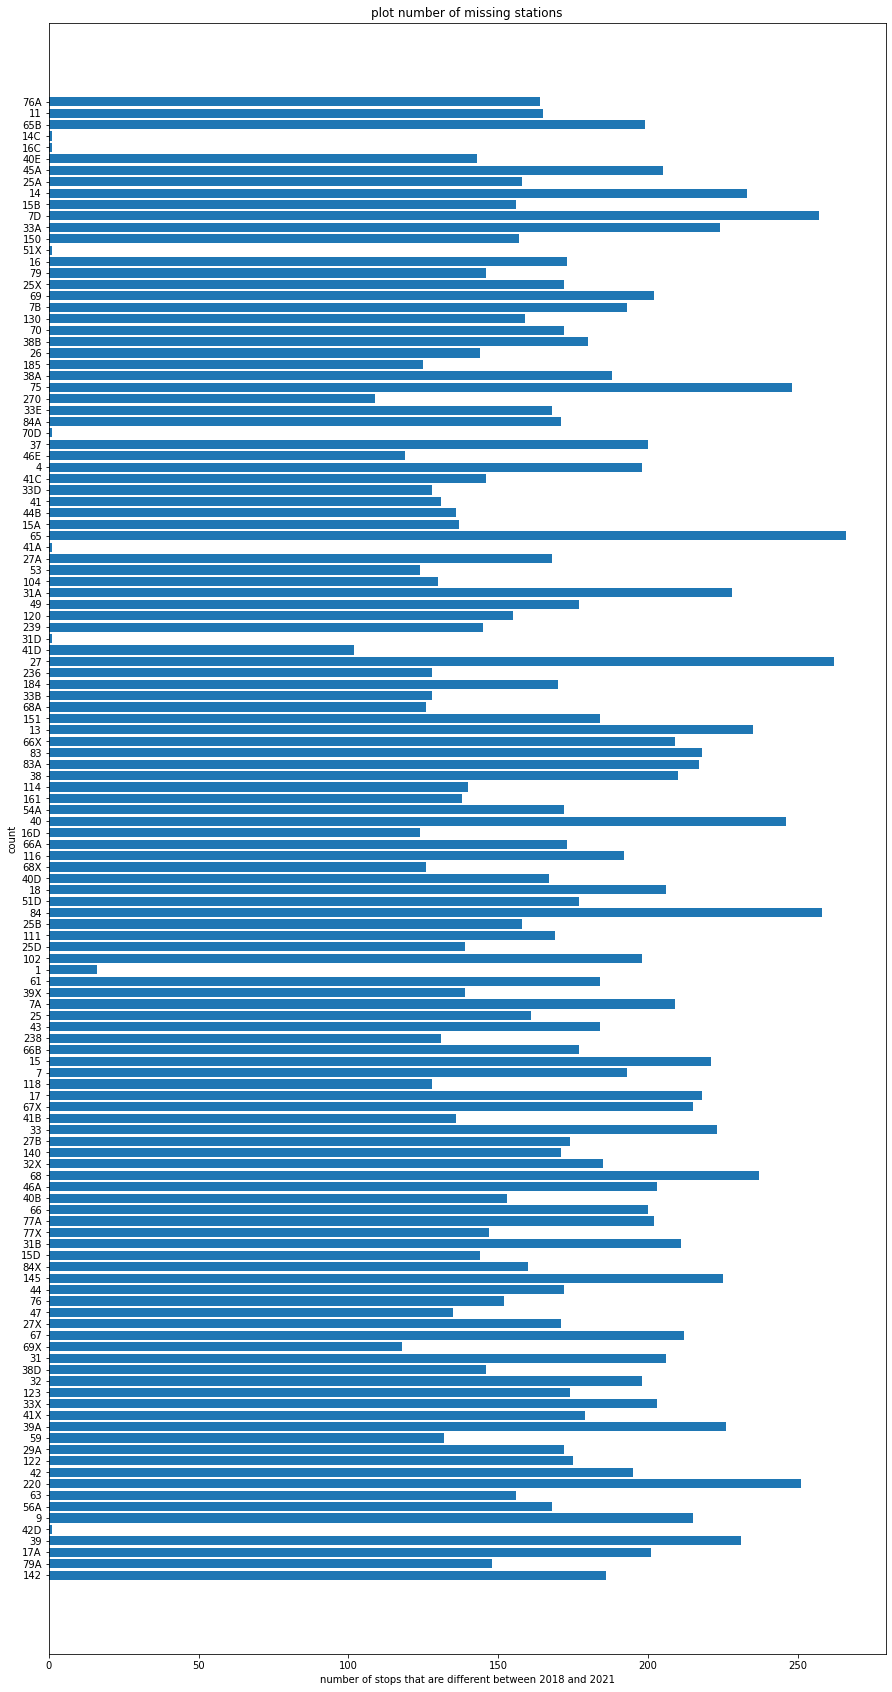

In [80]:
fig, ax = plt.subplots(figsize = (15,30))
ax.barh(x_values, bar_values)
ax.set_title("plot number of missing stations")
ax.set_ylabel("count")
ax.set_xlabel("number of stops that are different between 2018 and 2021")

plt.savefig("differences")
plt.show()

From the plot we can see that the bus routes have changed quite a lot in the few years difference

# plot the data

plot the features of the dataset

come to conclusions on the dataset

choose relevant features

decide what model we want to use/ what we are trying to predict

train model

In [81]:
weather_df = pd.read_csv("~/data/openweatherapi_2018_data_with_columns_removed2021-06-26 01:55:47.555341.csv")
weather_df = weather_df.drop("Unnamed: 0", axis = 1)

In [82]:
weather_df.head()

,dt,dt_iso,timezone,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2017-12-31 00:00:00+00:00,2017-12-31 00:00:00 +0000 UTC,0,283.06,279.56,281.150,285.150,983,93,4.63,140,NaN,NaN,75,803,Clouds,broken clouds,04n
1,2017-12-31 01:00:00+00:00,2017-12-31 01:00:00 +0000 UTC,0,284.24,274.44,284.150,284.716,983,82,13.38,230,NaN,NaN,75,803,Clouds,broken clouds,04n
2,2017-12-31 02:00:00+00:00,2017-12-31 02:00:00 +0000 UTC,0,284.16,275.52,283.662,284.669,982,76,11.32,220,NaN,NaN,75,803,Clouds,broken clouds,04n
3,2017-12-31 03:00:00+00:00,2017-12-31 03:00:00 +0000 UTC,0,283.14,271.20,282.423,283.726,983,62,14.92,240,NaN,NaN,75,803,Clouds,broken clouds,04n
4,2017-12-31 04:00:00+00:00,2017-12-31 04:00:00 +0000 UTC,0,281.75,268.11,281.150,282.742,984,61,16.98,240,NaN,NaN,75,803,Clouds,broken clouds,04n


In [83]:
route_pd_df.dtypes

level_0                     int64
index                       int64
DAYOFSERVICE       datetime64[ns]
TRIPID                   category
PROGRNUMBER              category
STOPPOINTID              category
PLANNEDTIME_ARR             int64
PLANNEDTIME_DEP             int64
ACTUALTIME_ARR              int64
ACTUALTIME_DEP              int64
VEHICLEID                category
SUPPRESSED               category
JUSTIFICATIONID           float64
LASTUPDATE         datetime64[ns]
date_and_time      datetime64[ns]
dtype: object

In [84]:
# change the dtypes of the weather features
weather_df["dt"] = pd.to_datetime(weather_df["dt"]).dt.tz_localize(None)

# categorical data
weather_df["weather_main"] = weather_df["weather_main"].astype("category")
weather_df["weather_icon"] = weather_df["weather_icon"].astype("category")

In [85]:
weather_df.dtypes

dt                     datetime64[ns]
dt_iso                         object
timezone                        int64
temp                          float64
feels_like                    float64
temp_min                      float64
temp_max                      float64
pressure                        int64
humidity                        int64
wind_speed                    float64
wind_deg                        int64
rain_1h                       float64
snow_1h                       float64
clouds_all                      int64
weather_id                      int64
weather_main                 category
weather_description            object
weather_icon                 category
dtype: object

In [86]:
# we need to merge the data for the route and the weather data
#merge with respect to the time, and eazch hour
# for example, 1:30 should be emrged with the data for 1:00 as weather
# is on hourly basis

# CREATE  a new feature in the routes that contains the hours so that we can 
# merge with the weather data
route_time_planned = route_pd_df["PLANNEDTIME_ARR"]
route_time_actual = route_pd_df["ACTUALTIME_ARR"]

actual_time_hour = []
expected_time_hour = []
for i in range(len(route_time_actual)):
    actual_time_hour.append(route_time_actual[i] // 3600)
    expected_time_hour.append(route_time_planned[i] // 3600)

actual_date = route_pd_df["DAYOFSERVICE"]

In [87]:
import datetime

In [88]:

# parse it into datetime with this  any hours
date_time = []
for i in range(len(actual_time_hour)):
    new_datetime = actual_date[i] + datetime.timedelta(hours = int(actual_time_hour[i]))
    date_time.append(new_datetime)

In [89]:
len(actual_time_hour)

1336960

In [90]:
# add in the new column, 
# new column means that we can remove the other date column
route_pd_df["date_and_time"] = date_time

In [91]:
route_pd_df.head()

,level_0,index,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,date_and_time
0,0,0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,2018-01-08 17:21:10,2018-01-01 13:00:00
1,1,1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,2018-01-08 17:21:10,2018-01-01 15:00:00
2,2,2,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,2018-01-08 17:21:10,2018-01-01 16:00:00
3,3,3,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,2018-01-08 17:21:10,2018-01-01 16:00:00
4,4,4,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,2018-01-08 17:21:10,2018-01-01 15:00:00


In [139]:
from PIL import Image

142
79A
17A
39
42D
9
56A
63
220
42
122
29A
59
39A
41X
33X
123
32
38D
31
69X


<ipython-input-142-34358c4f2265>:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15,15))


67
27X
47
76
44
145
84X
15D
31B
77X
77A
66
40B
46A
68
32X
140
27B
33
41B
67X
17
118
7
15
66B
238
43
25
7A
39X
61
1
102
25D
111
25B
84
51D
18
40D
68X
116
66A
16D
40
54A
161
114
38
83A
83
66X
13
151
68A
33B
184
236
27
41D
31D
239
120
49
31A
104
53
27A
41A
65
15A
44B
41
33D
41C
4
46E
37
70D
84A
33E
270
75
38A
185
26
38B
70
130
7B
69
25X
79
16
51X
150
33A
7D
15B
14
25A
45A
40E
16C
14C
65B
11
76A


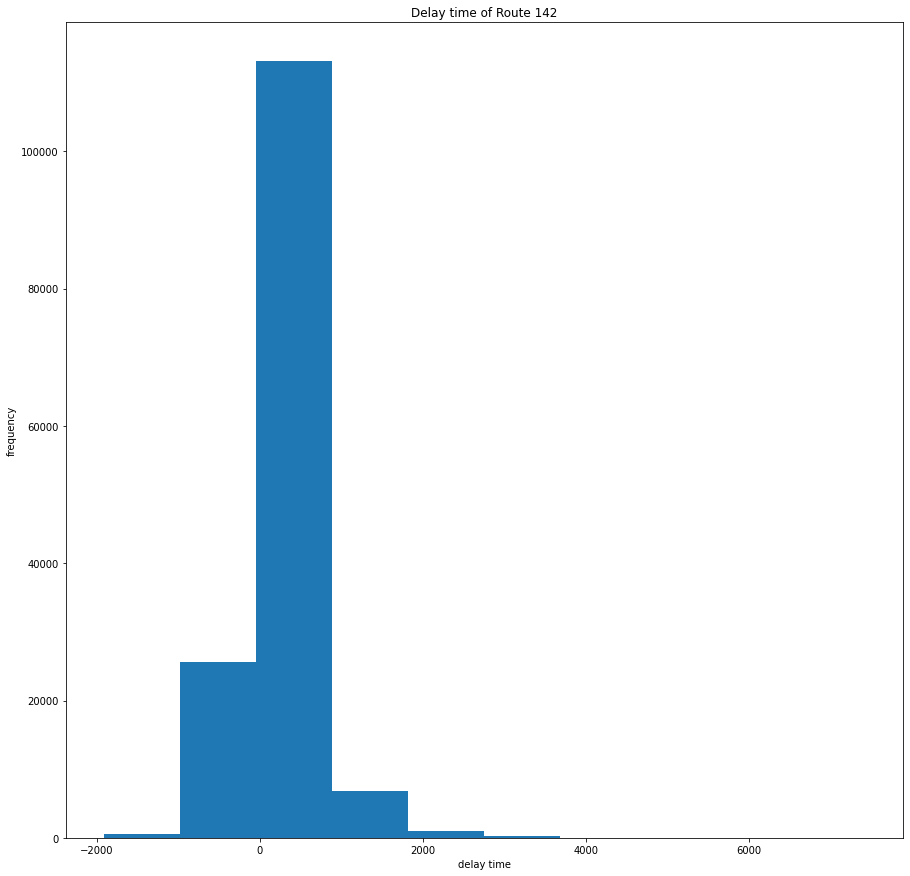

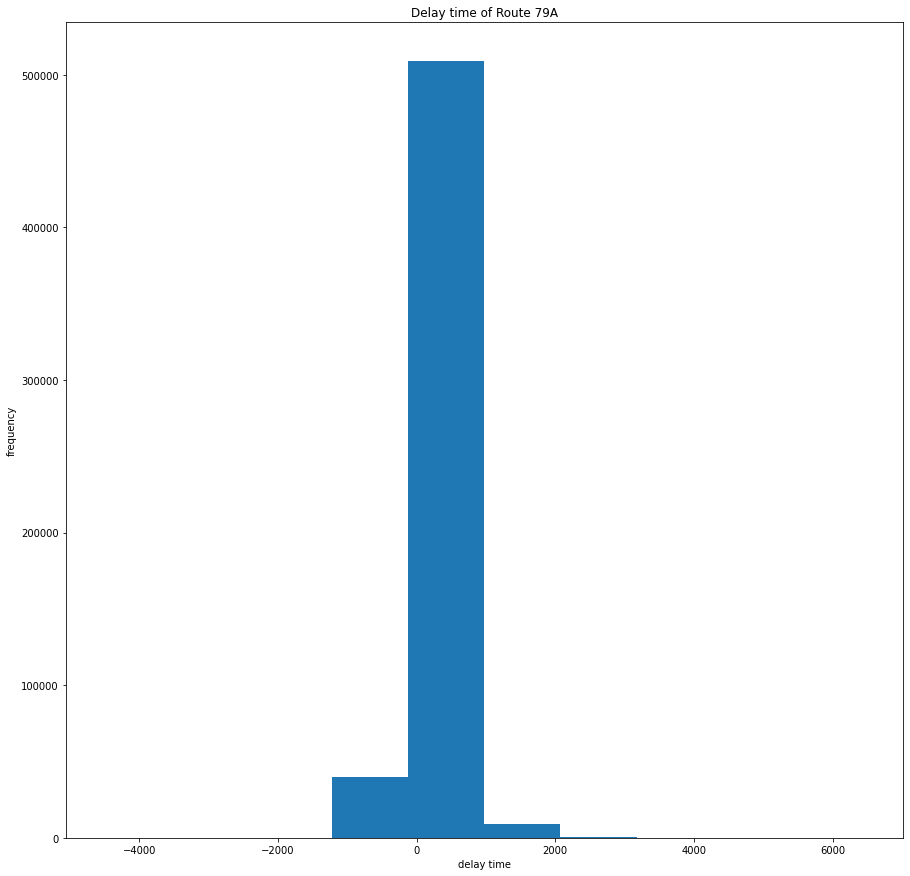

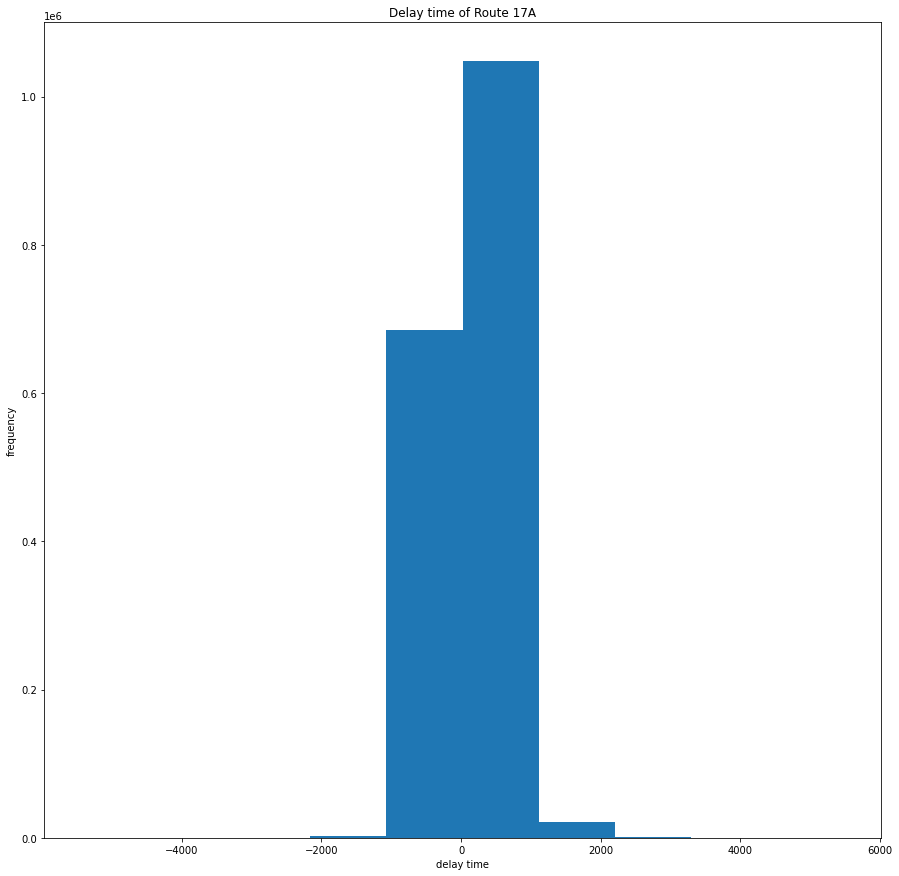

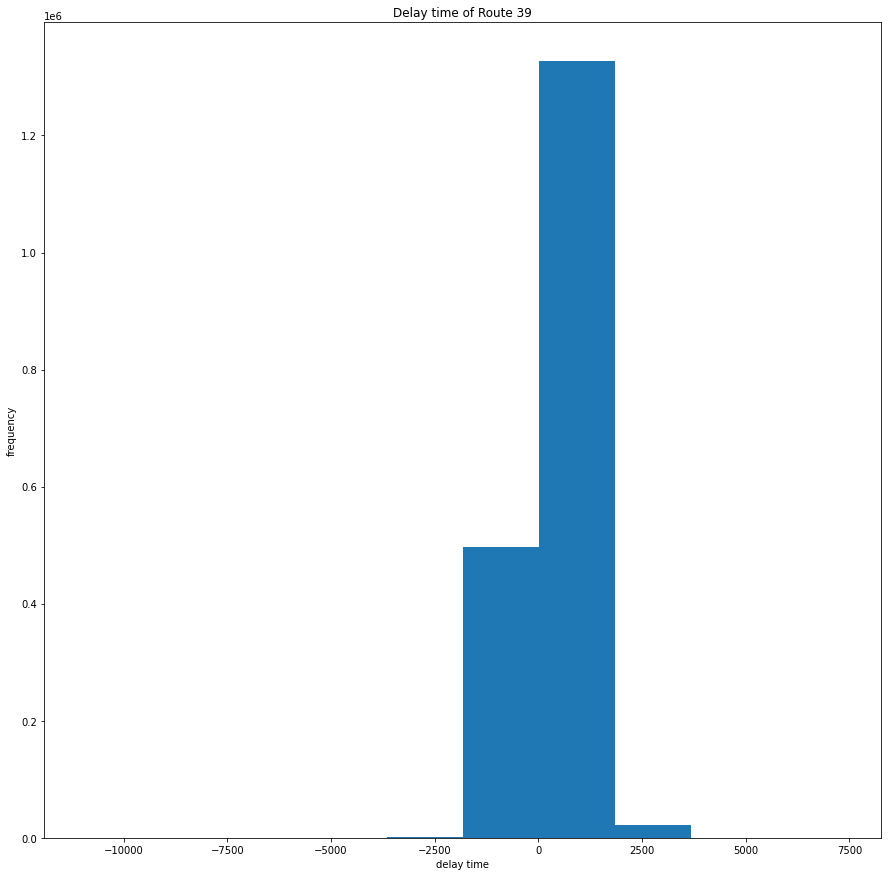

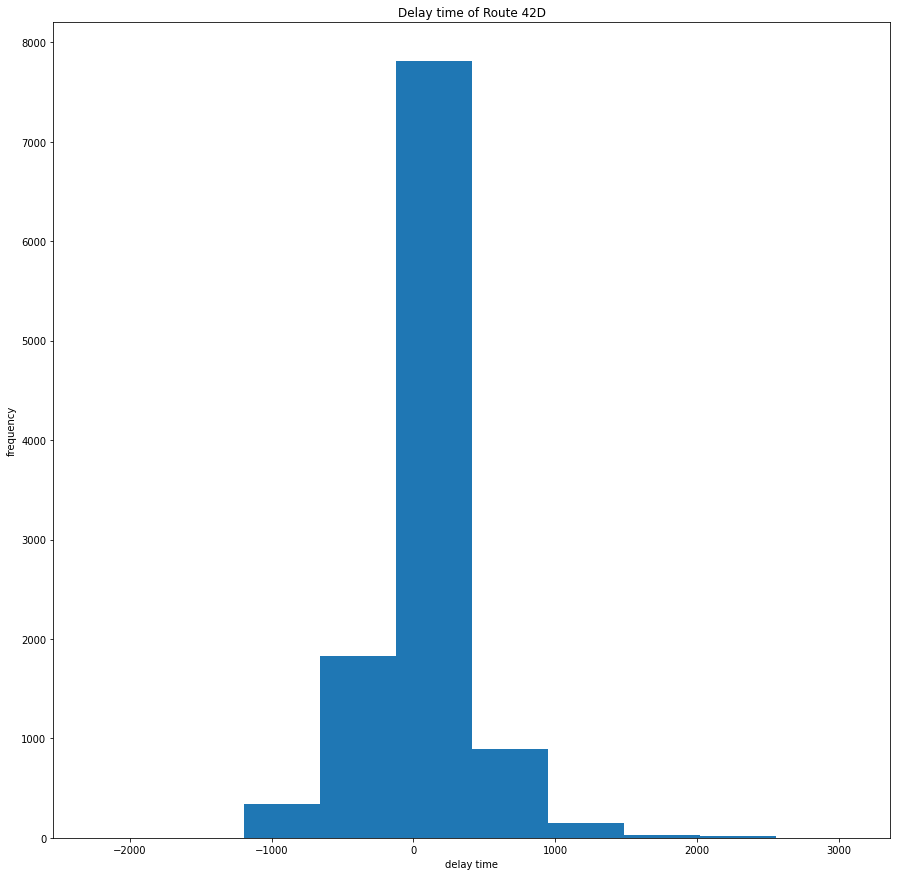

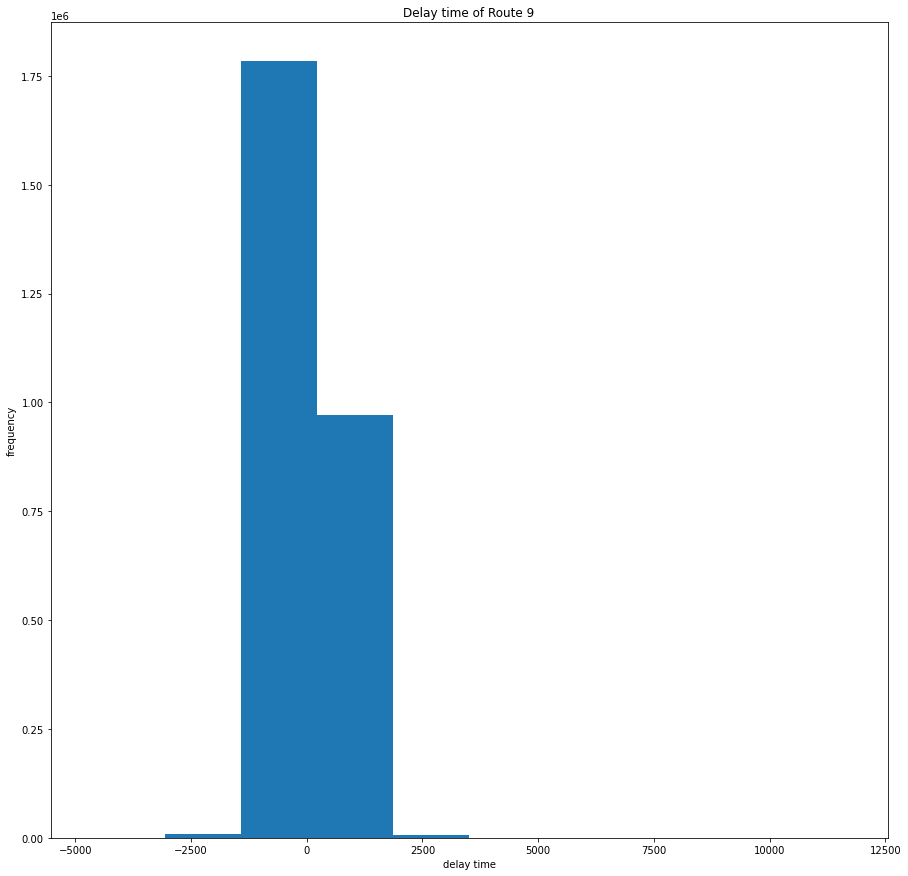

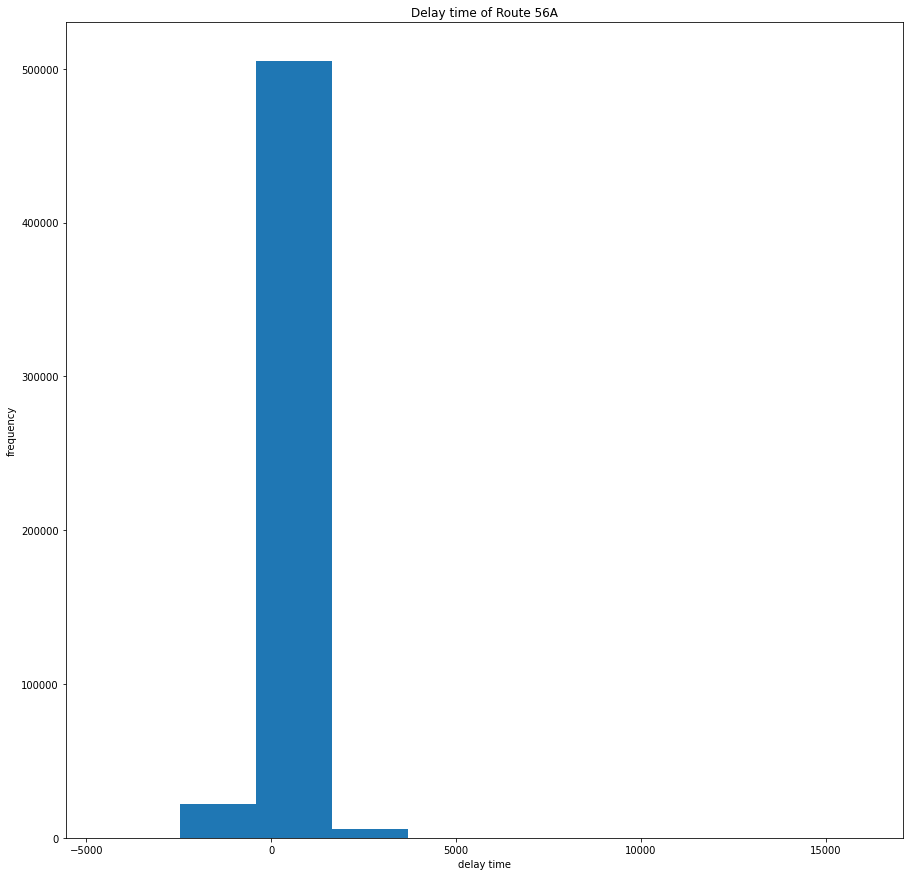

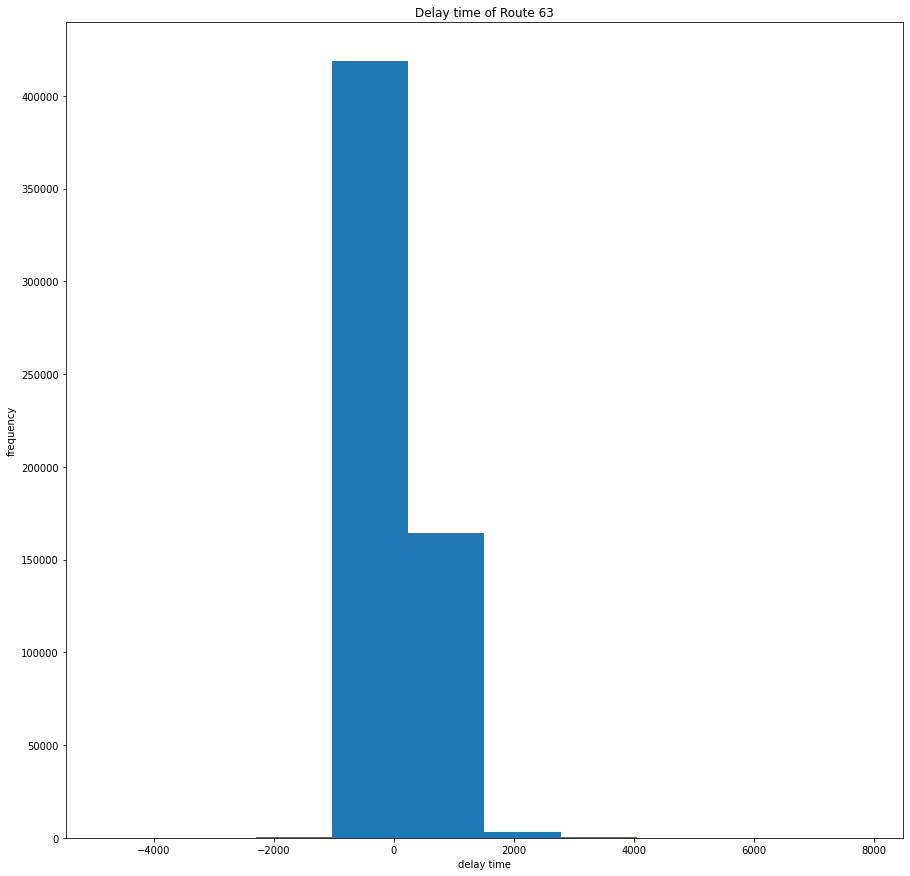

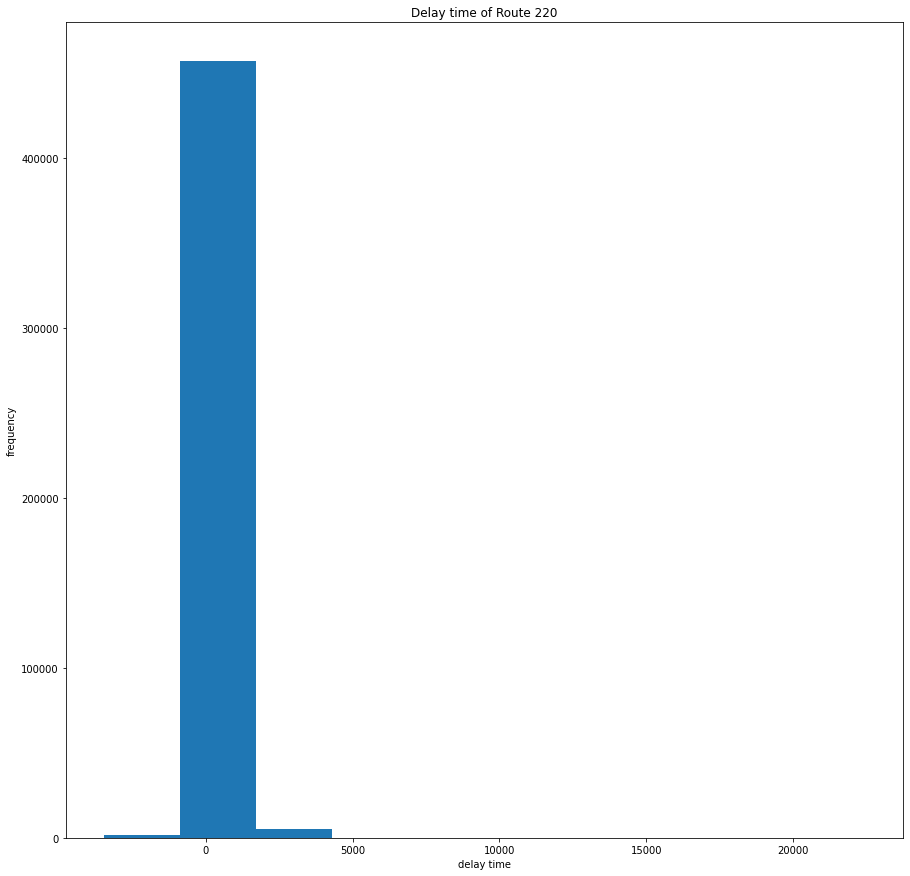

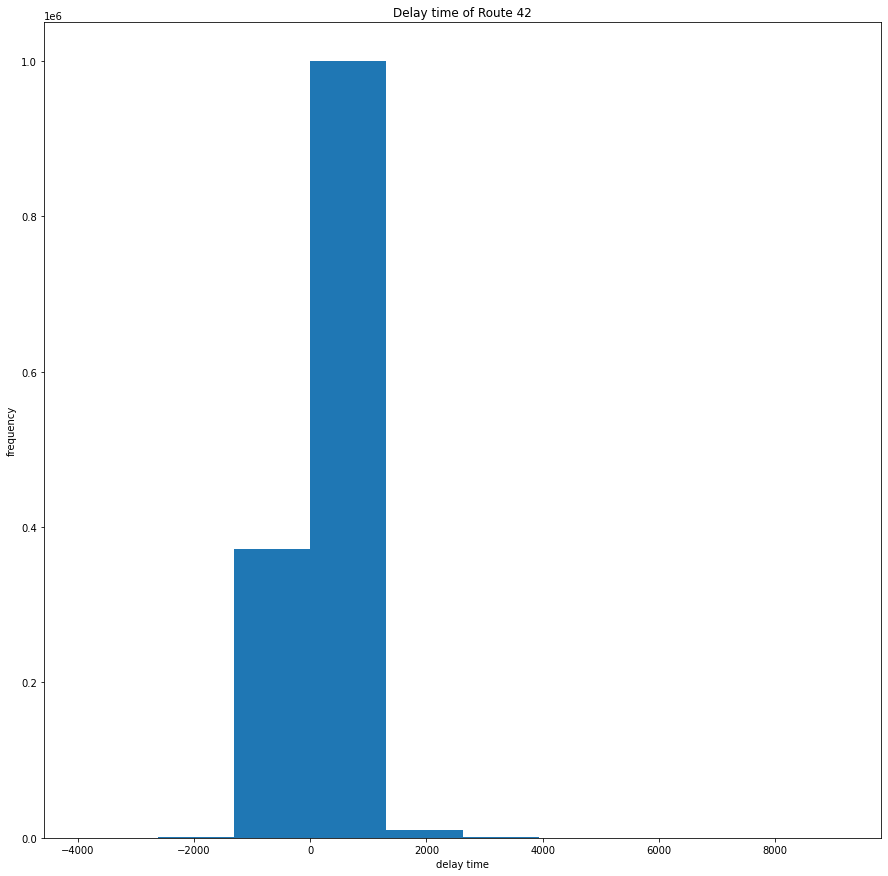

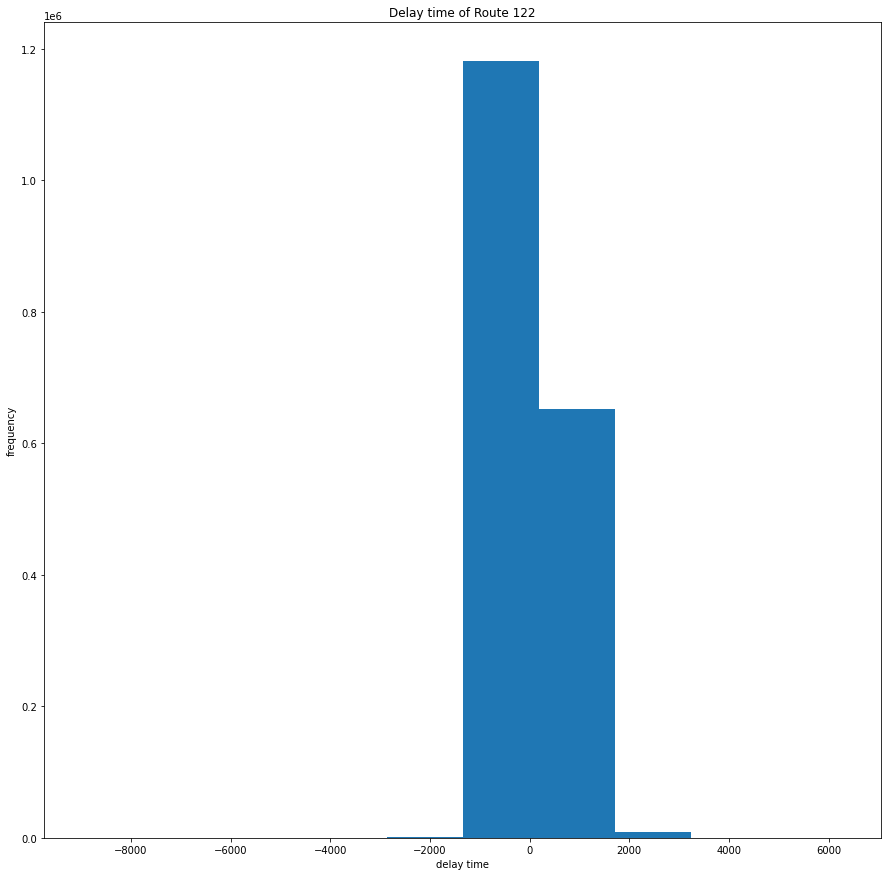

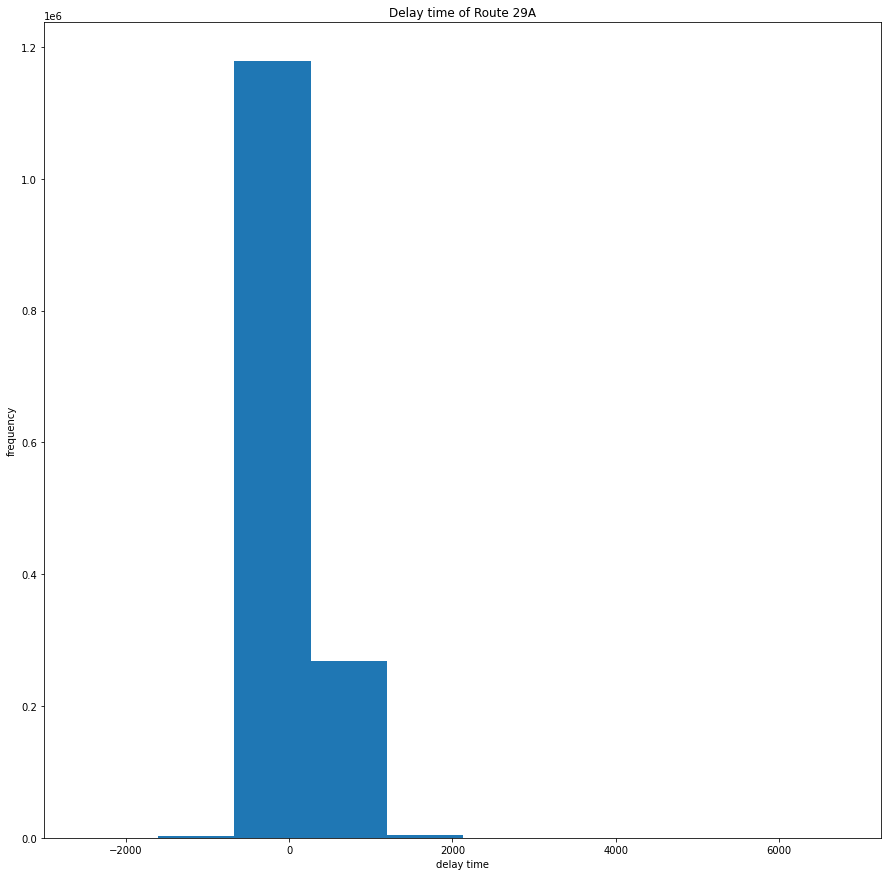

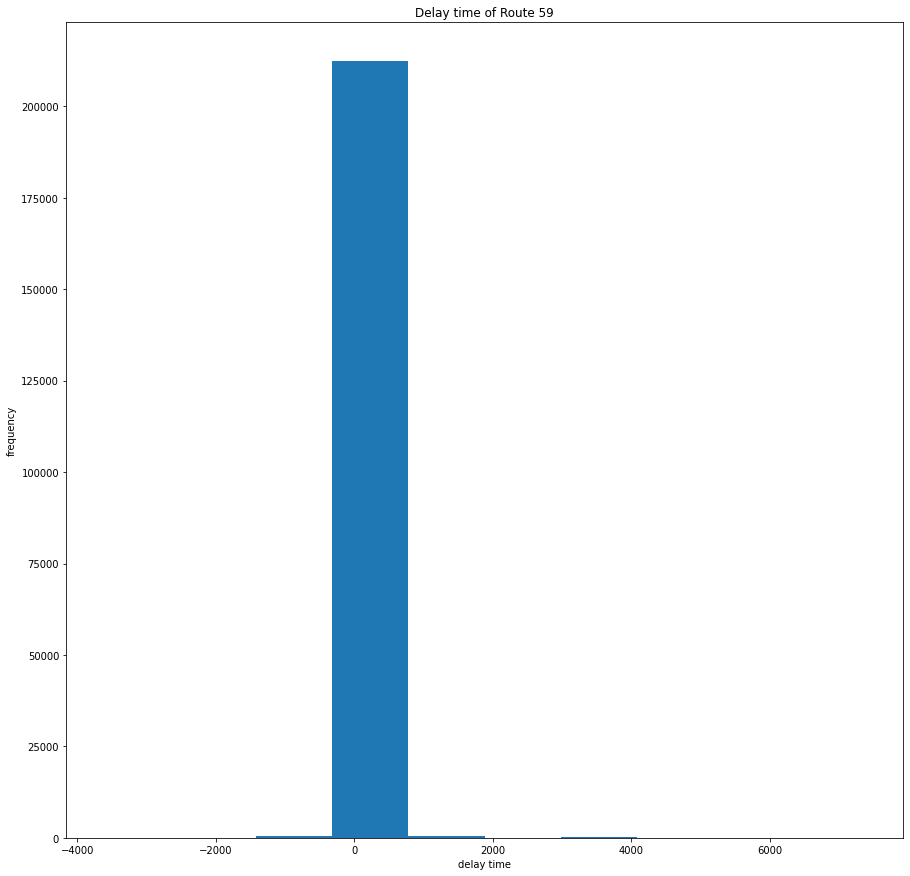

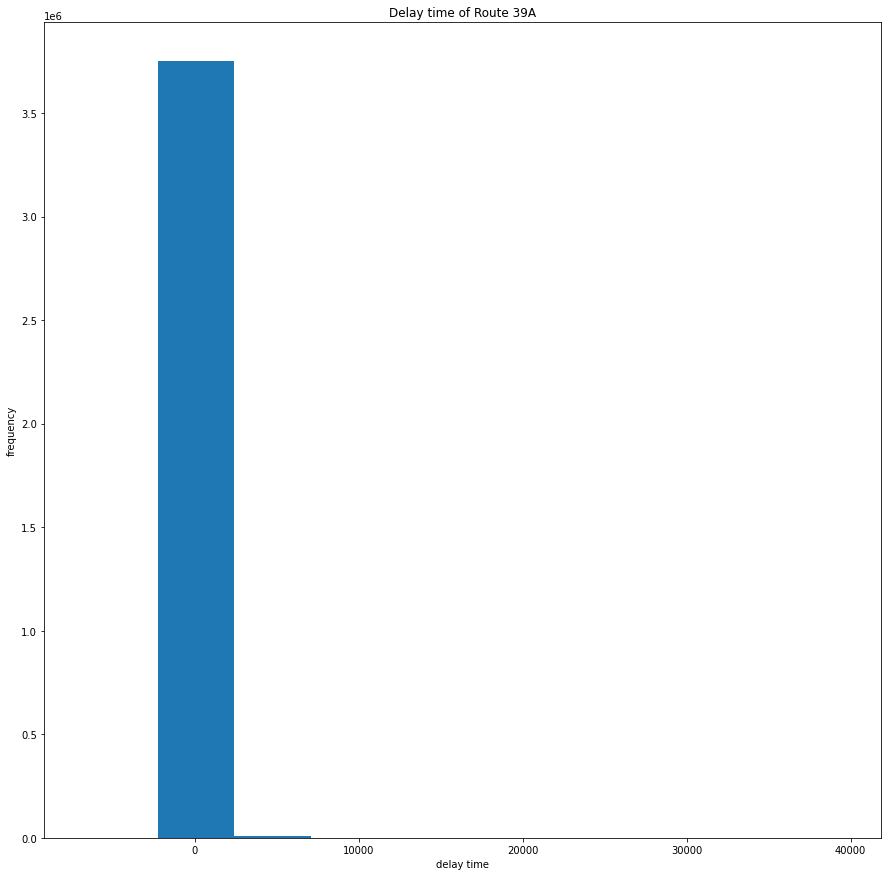

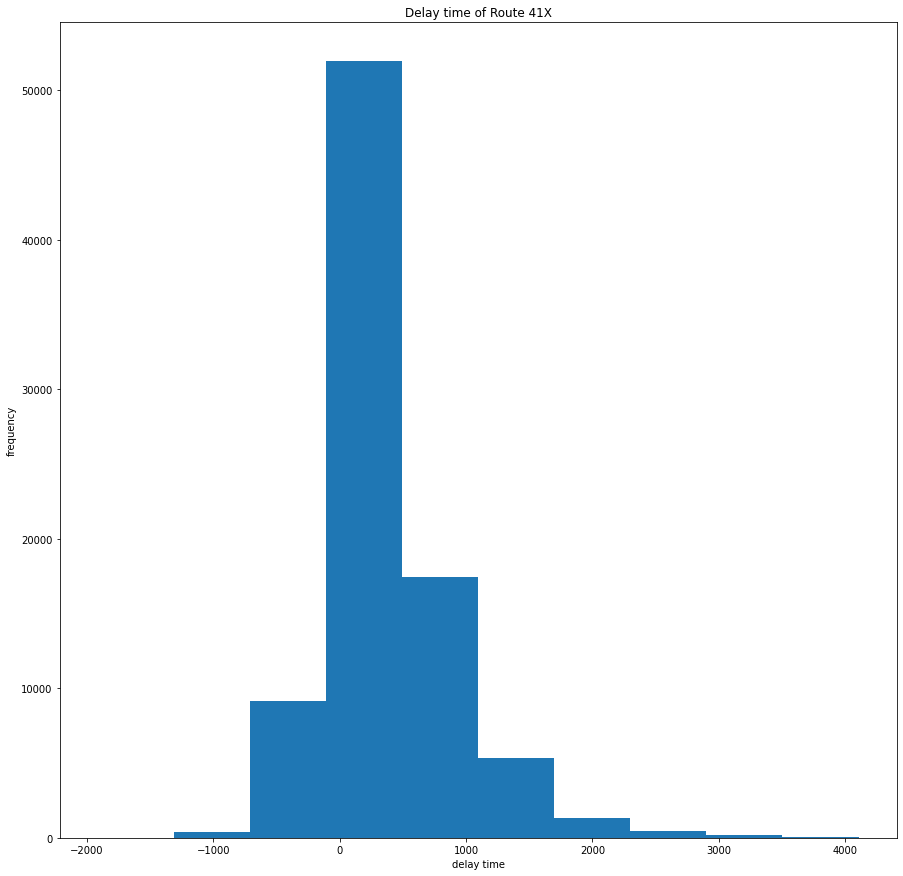

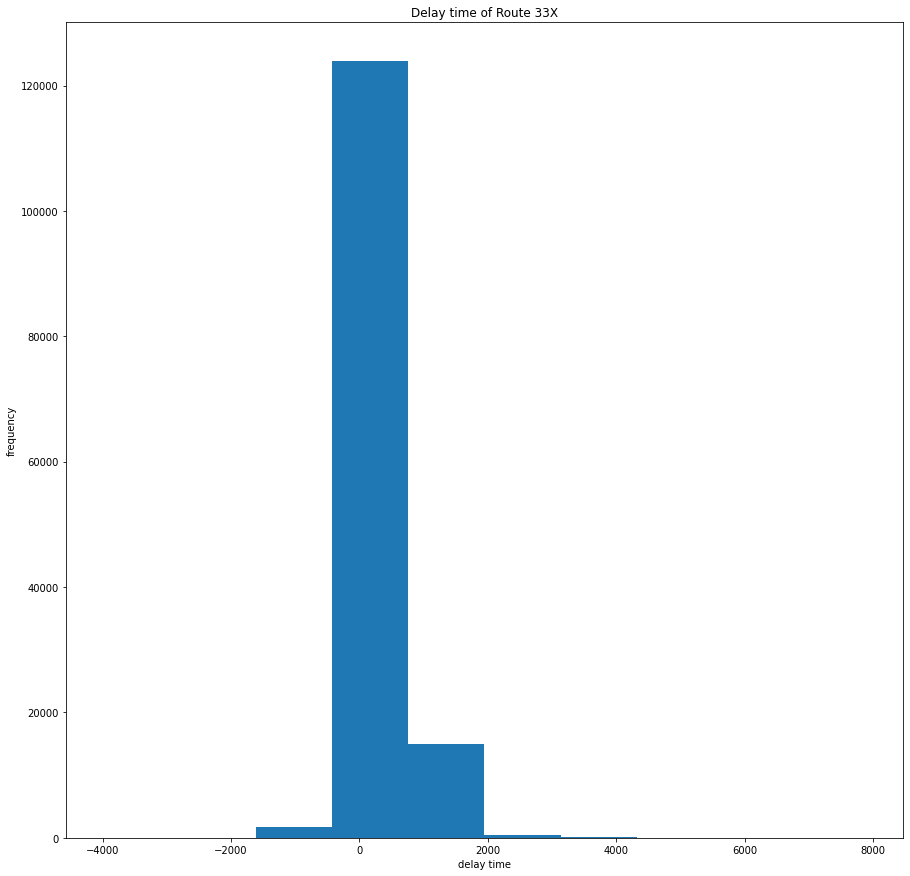

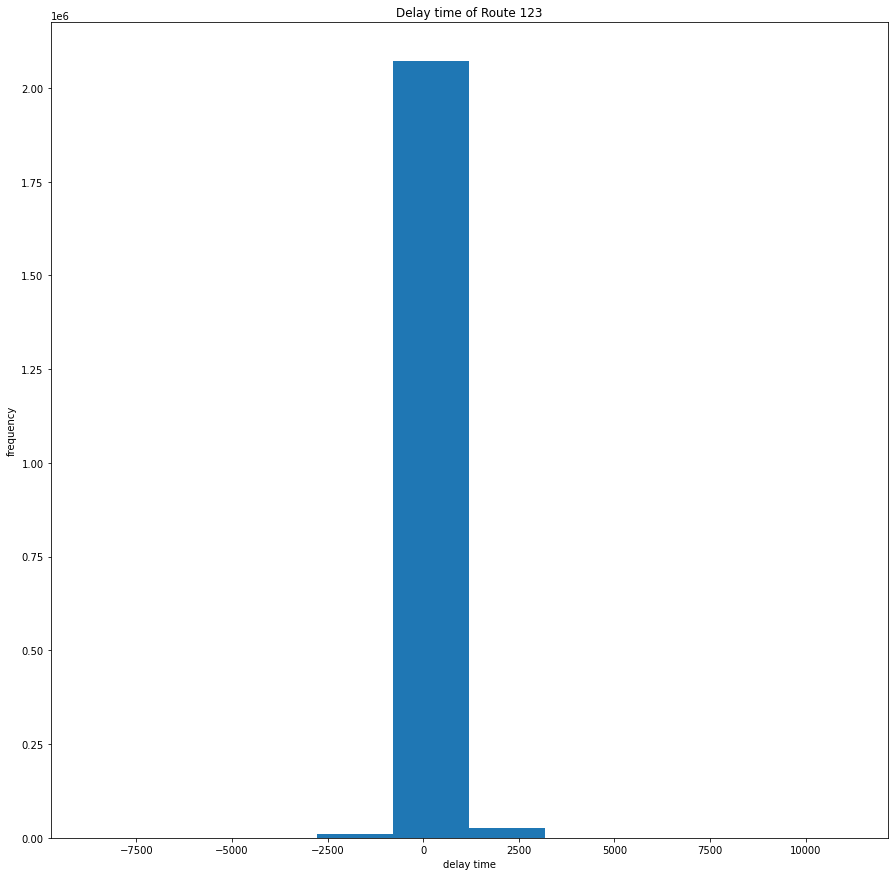

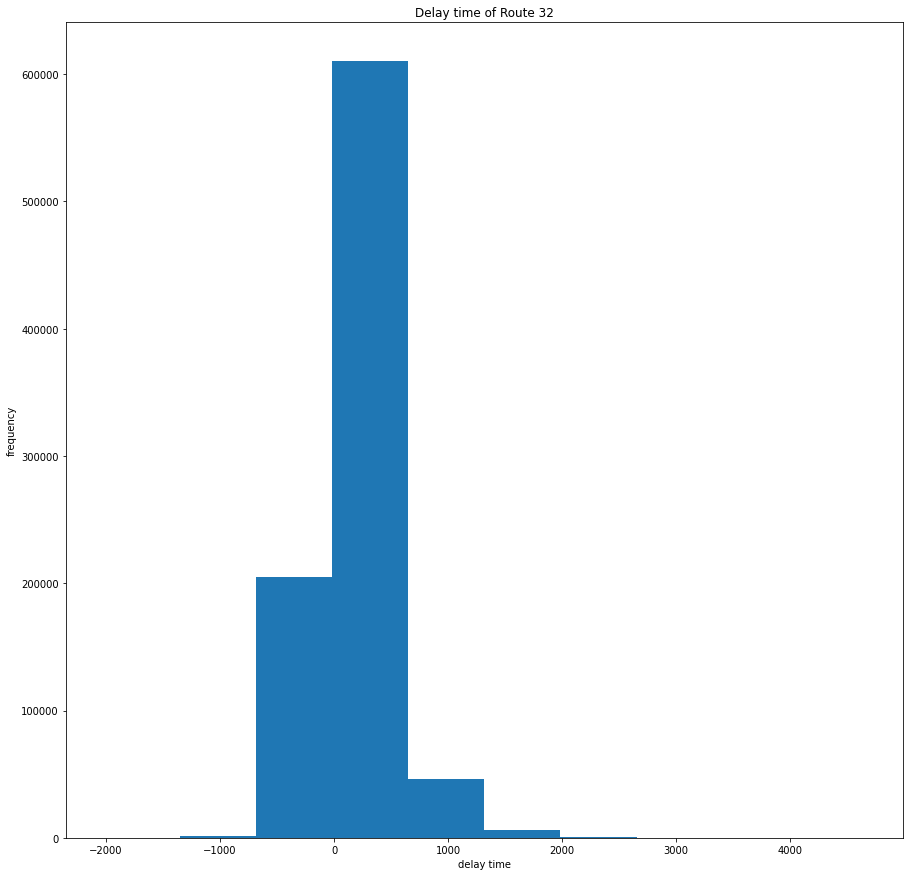

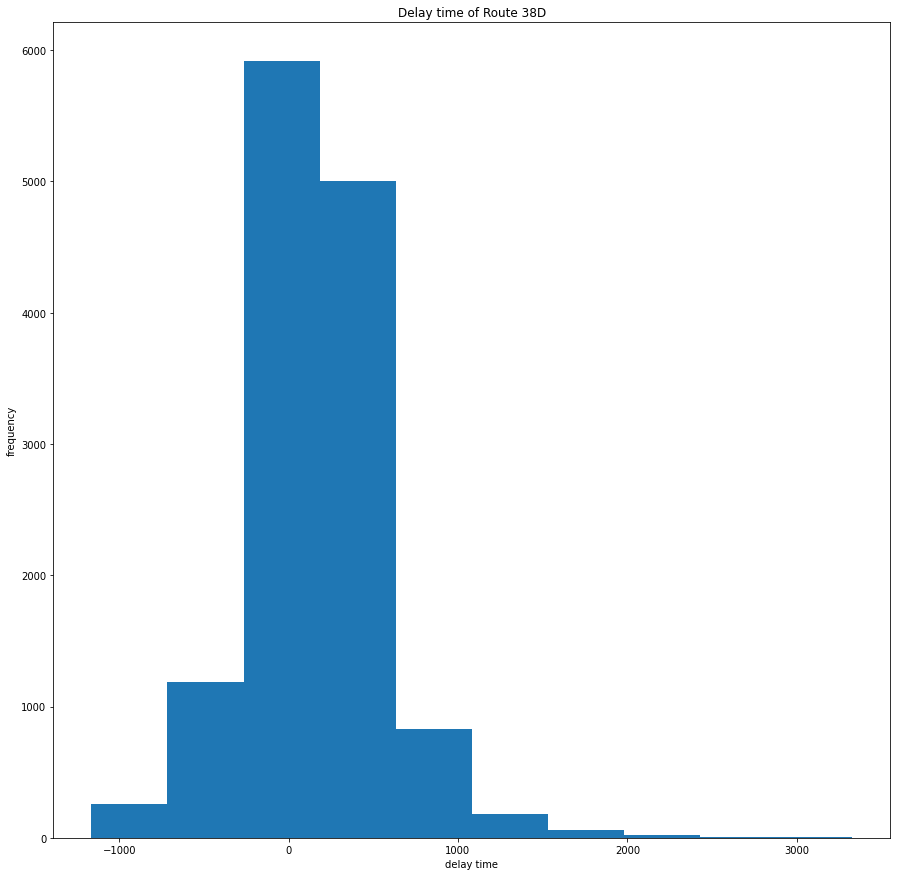

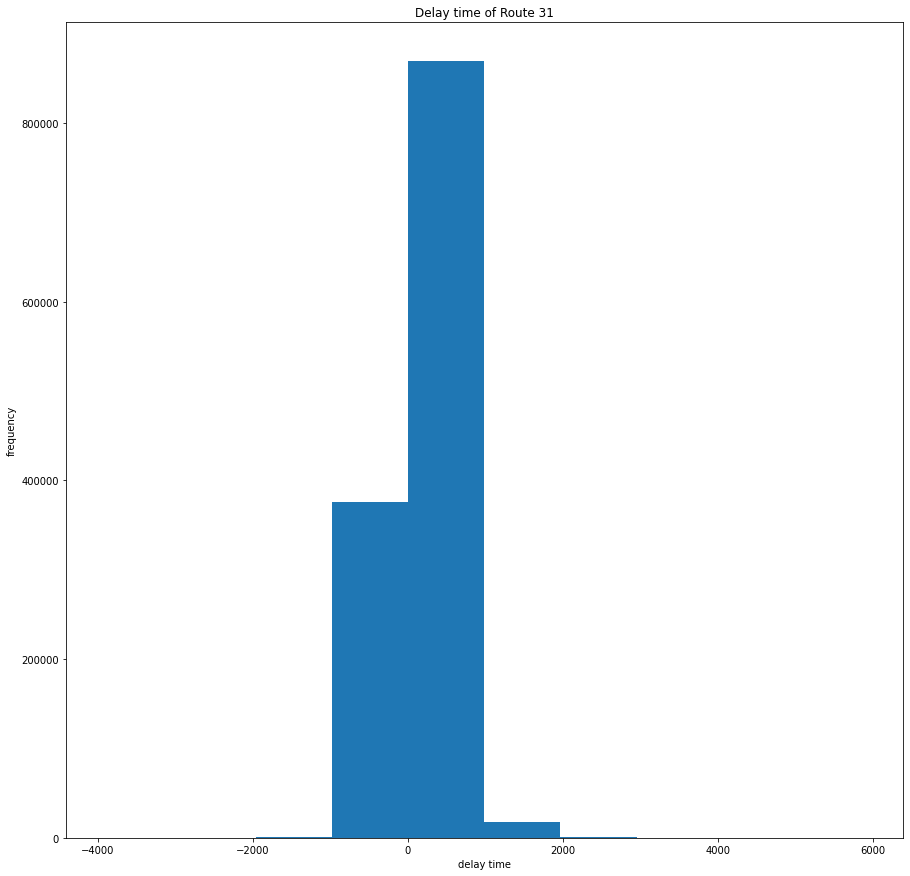

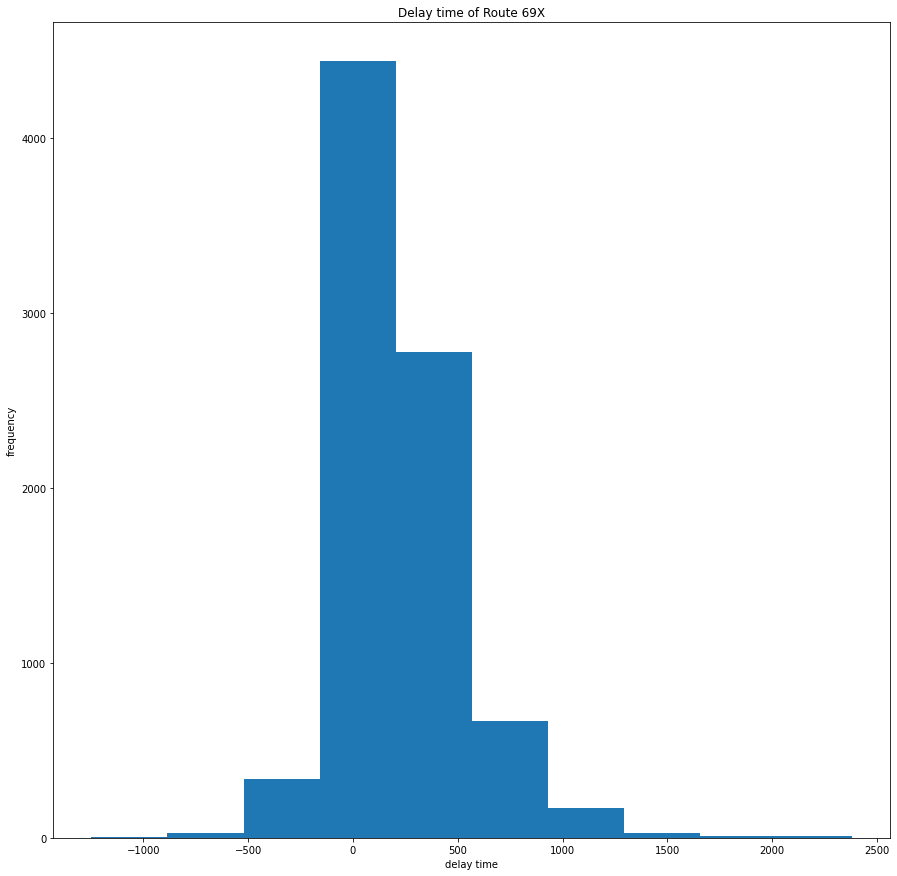

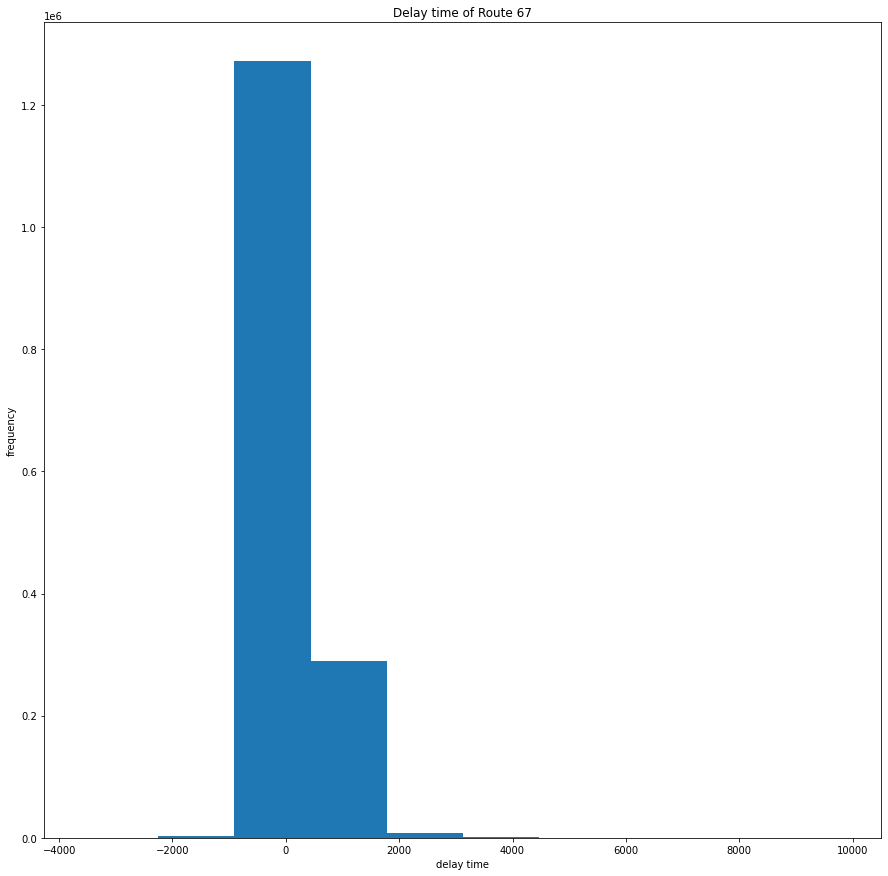

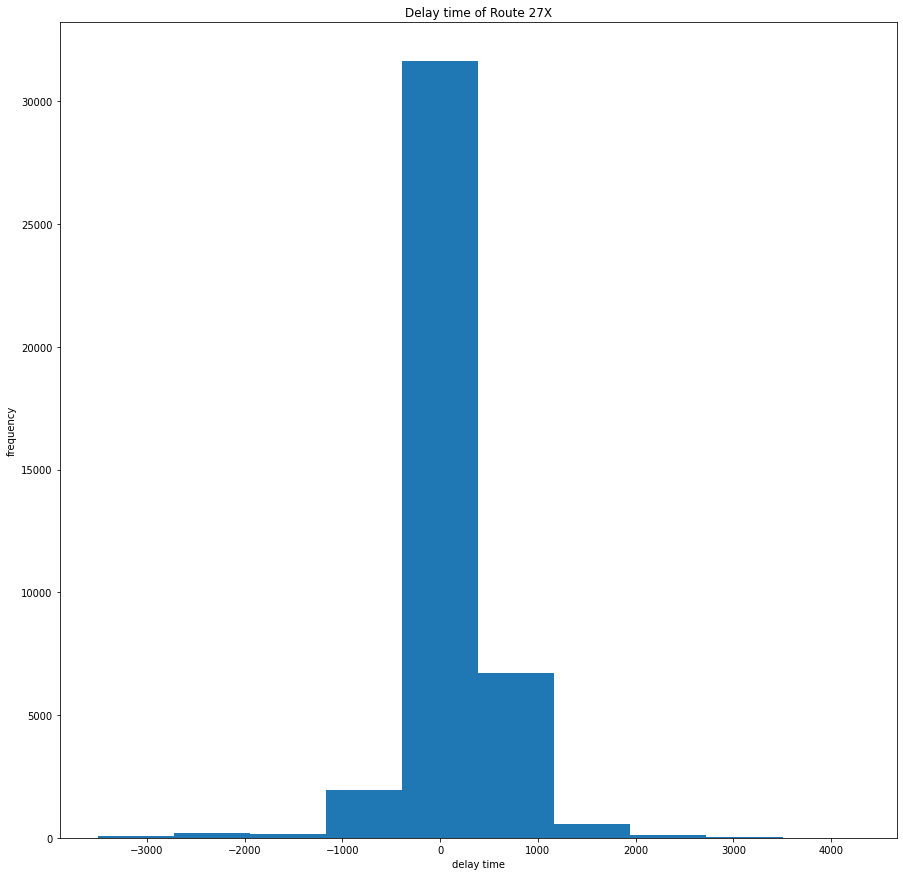

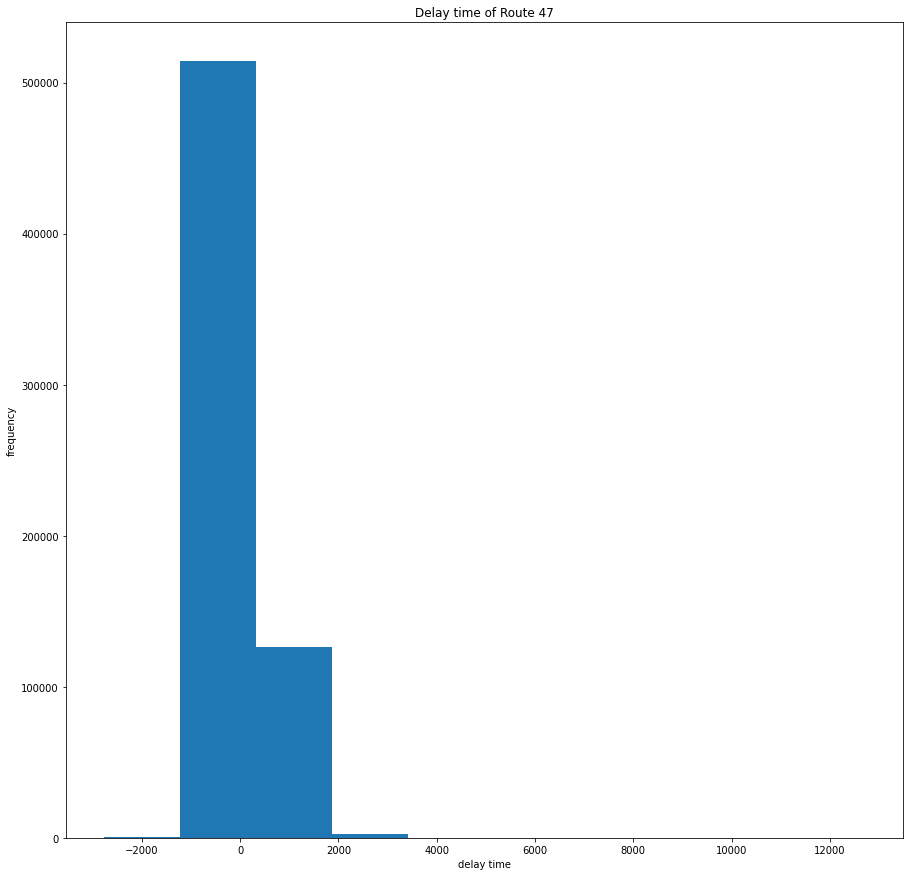

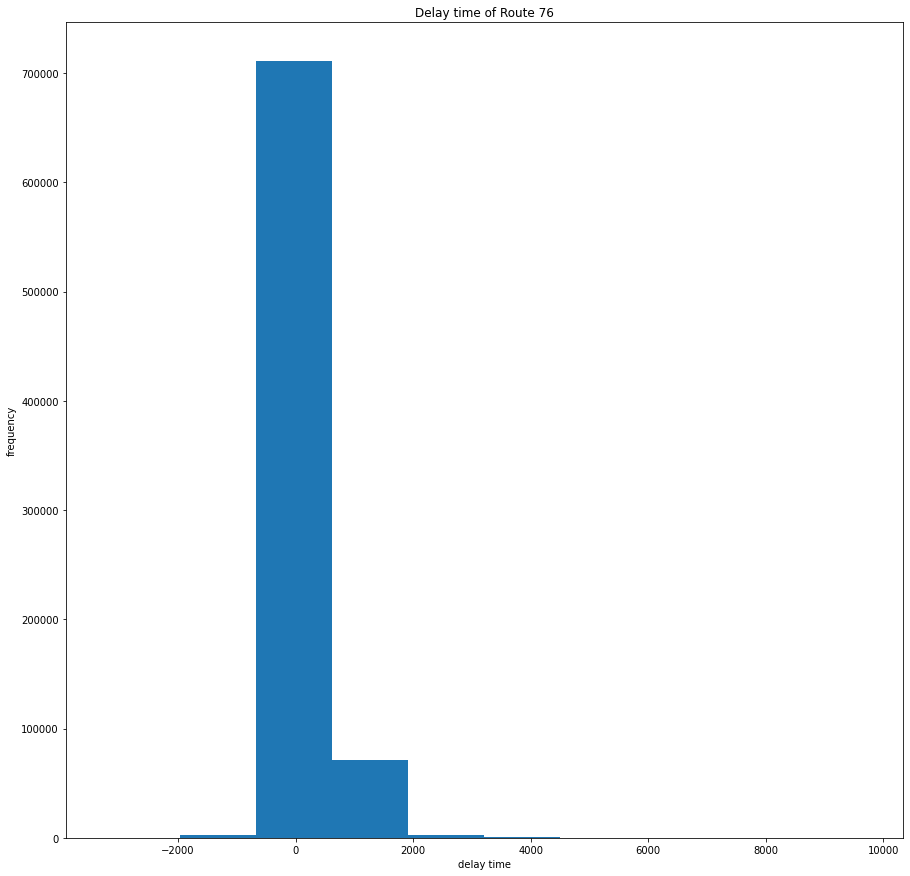

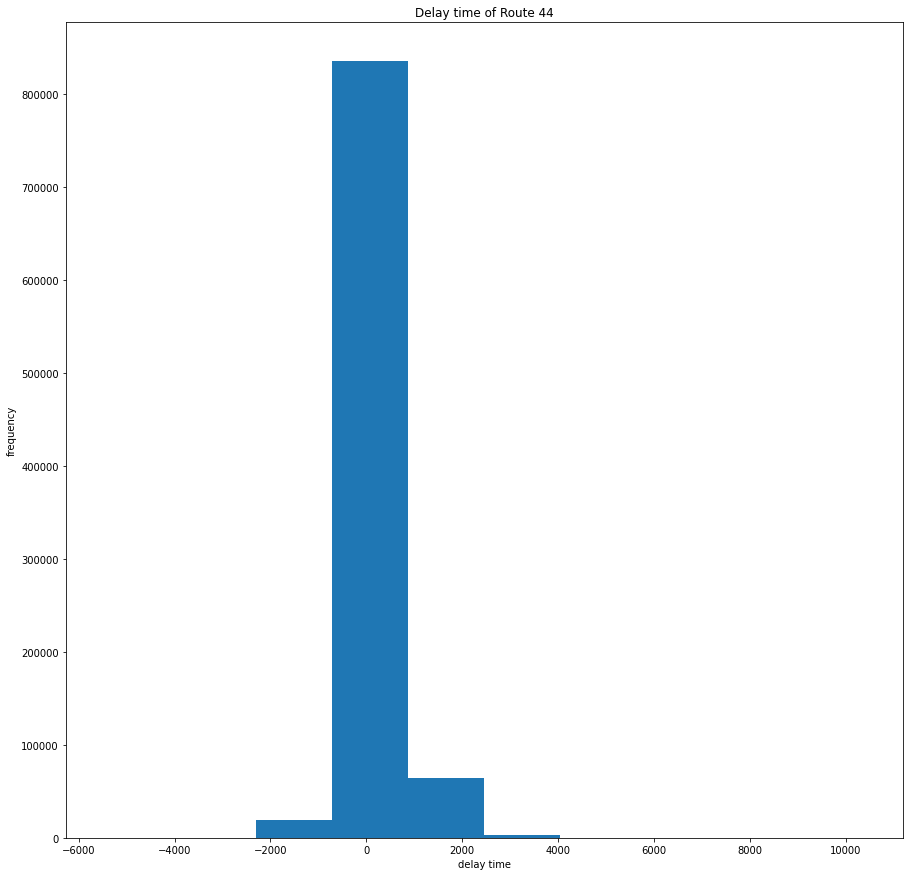

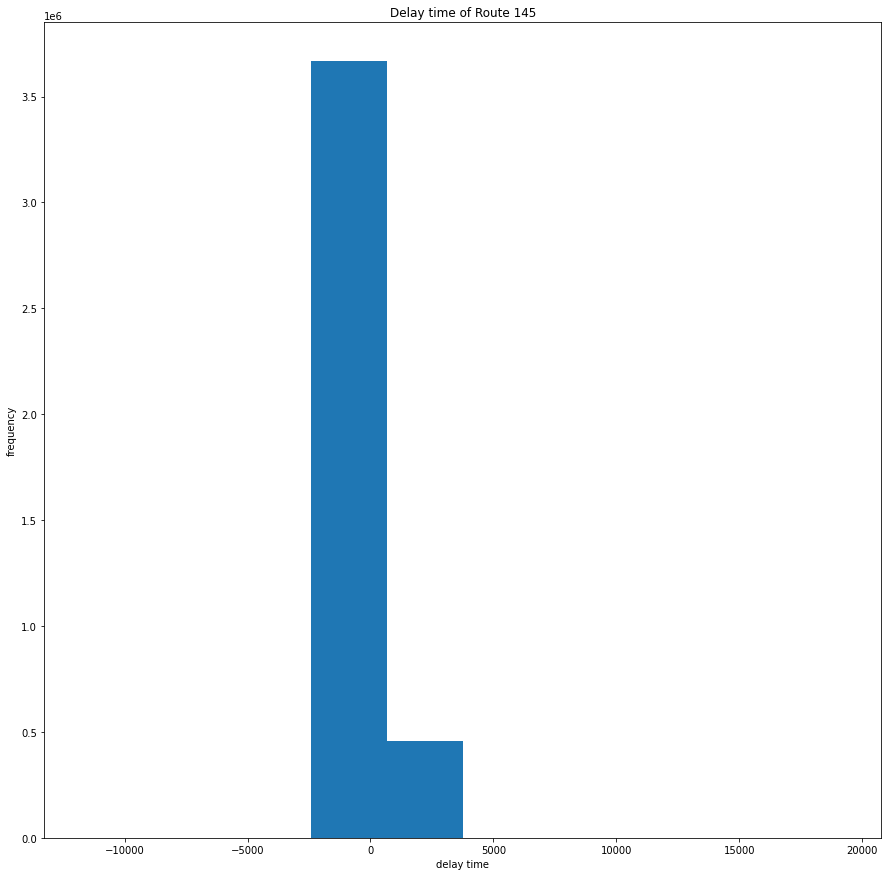

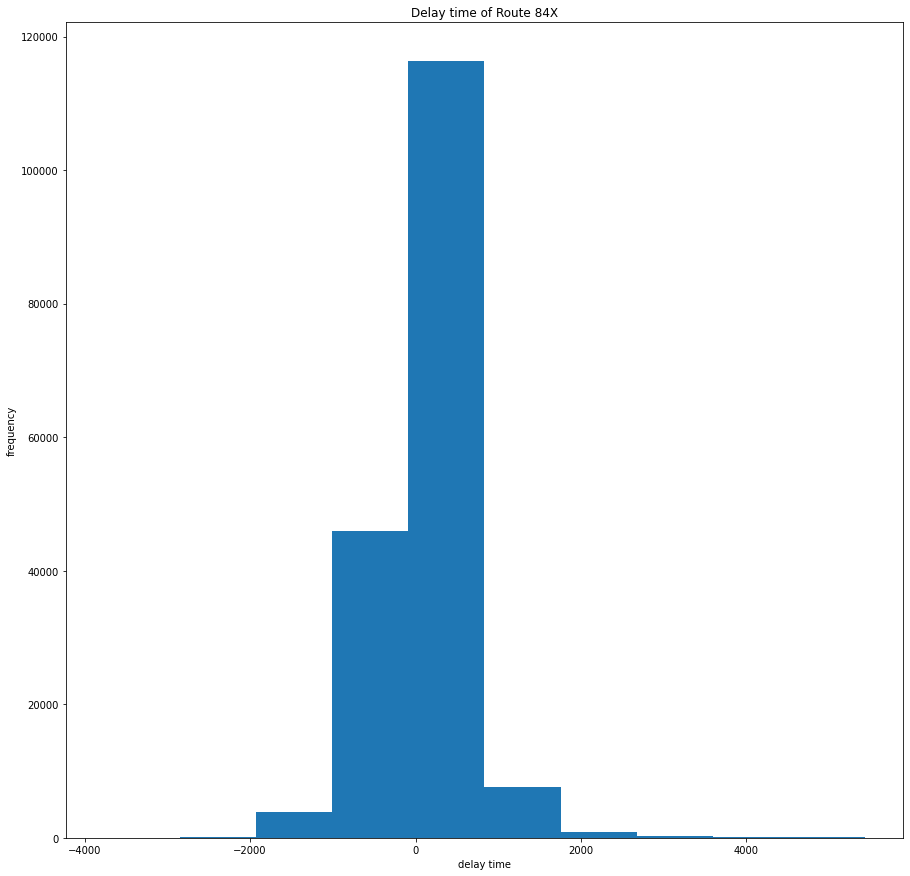

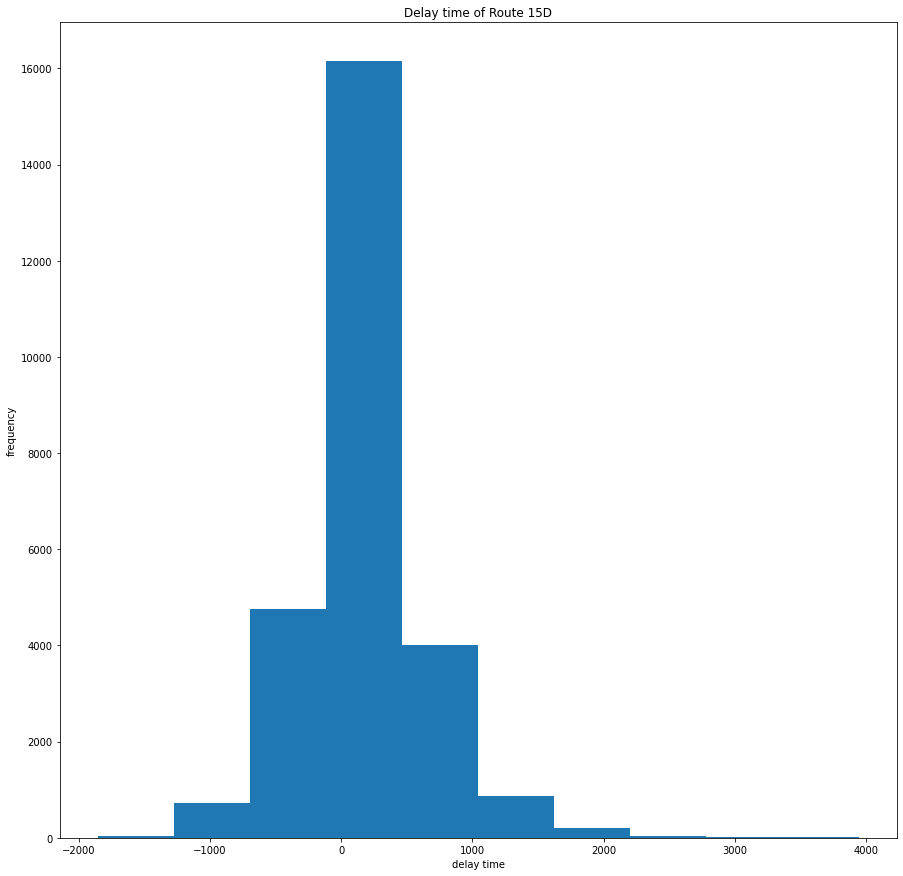

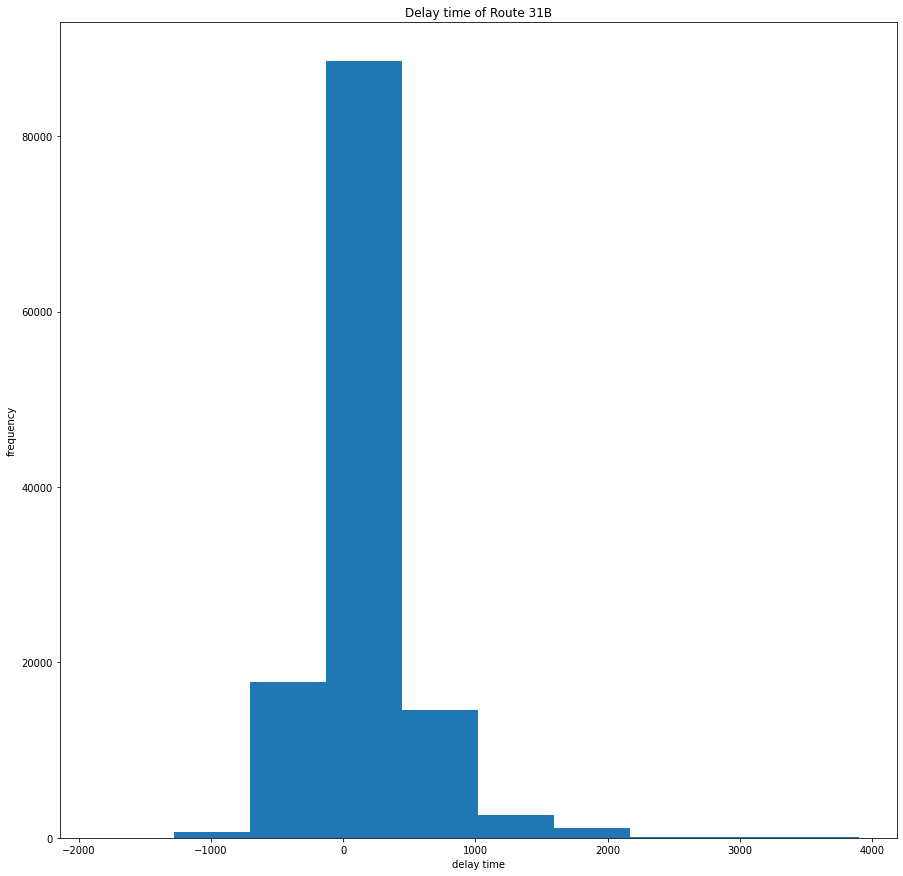

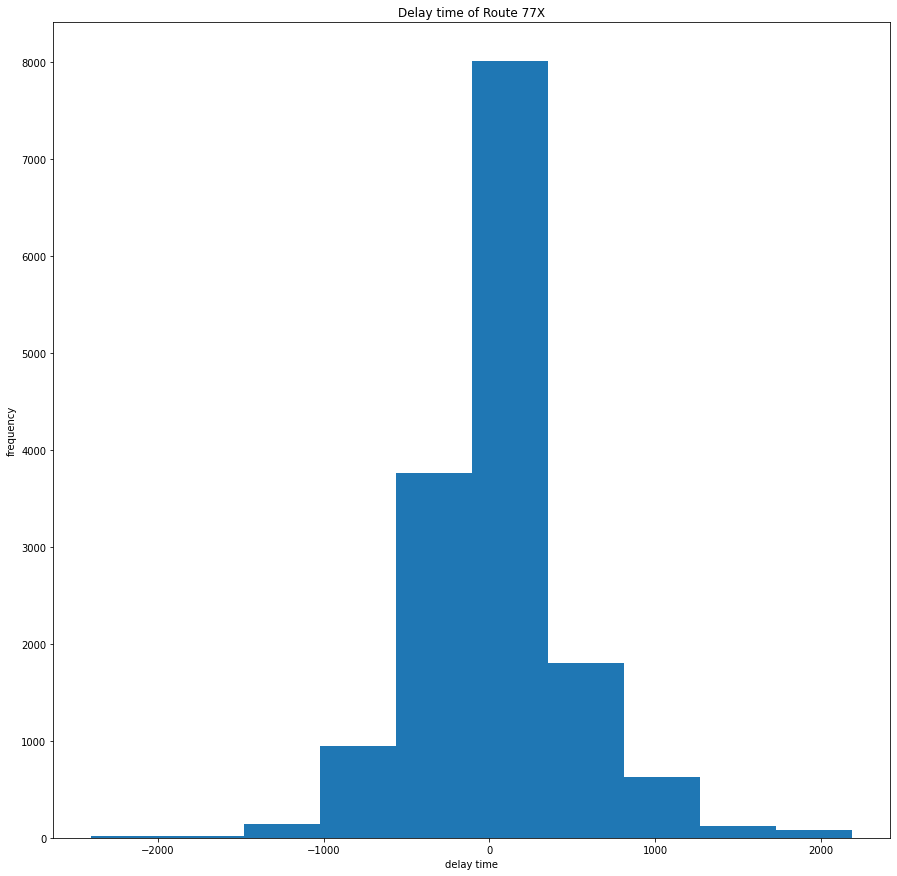

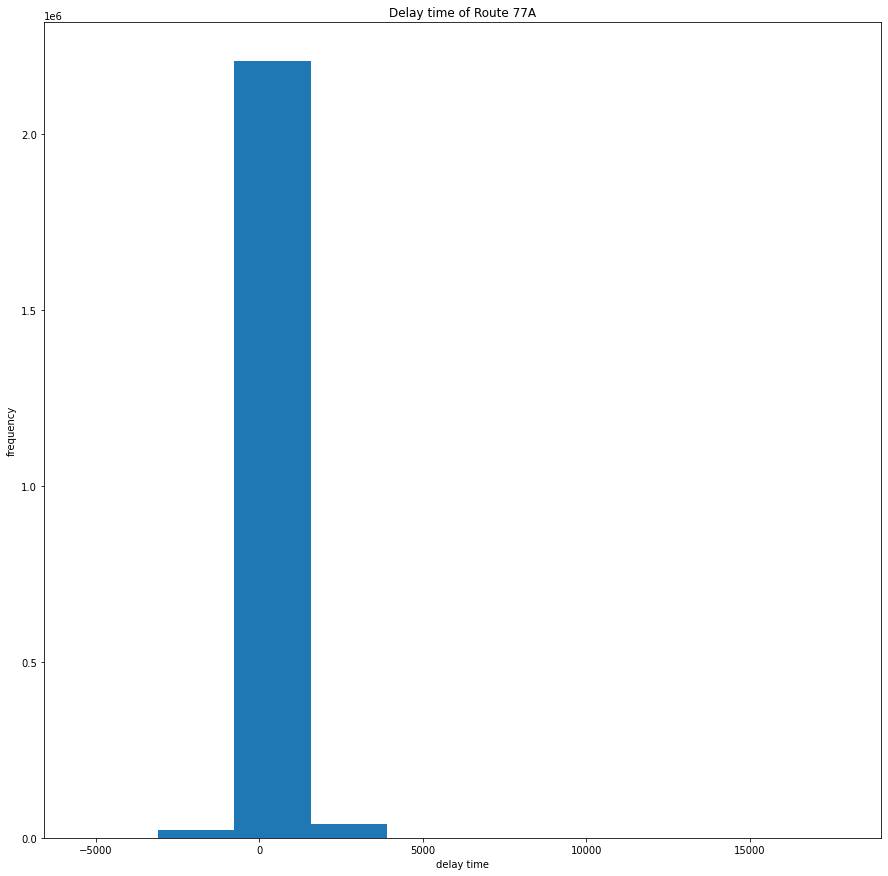

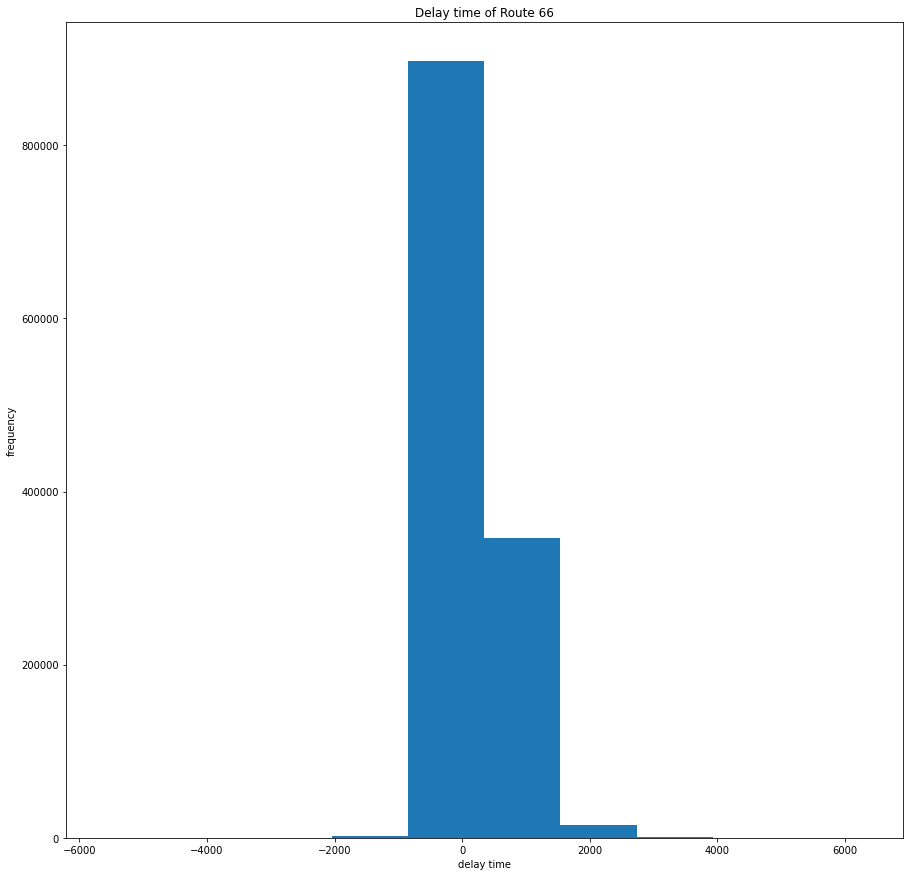

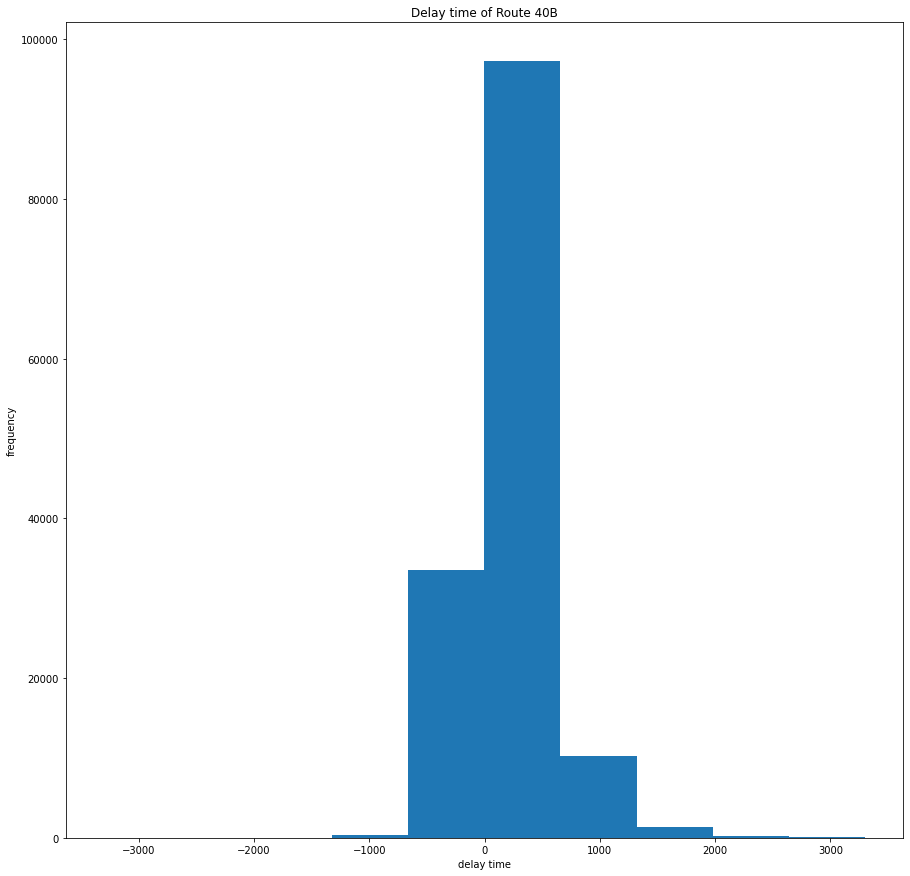

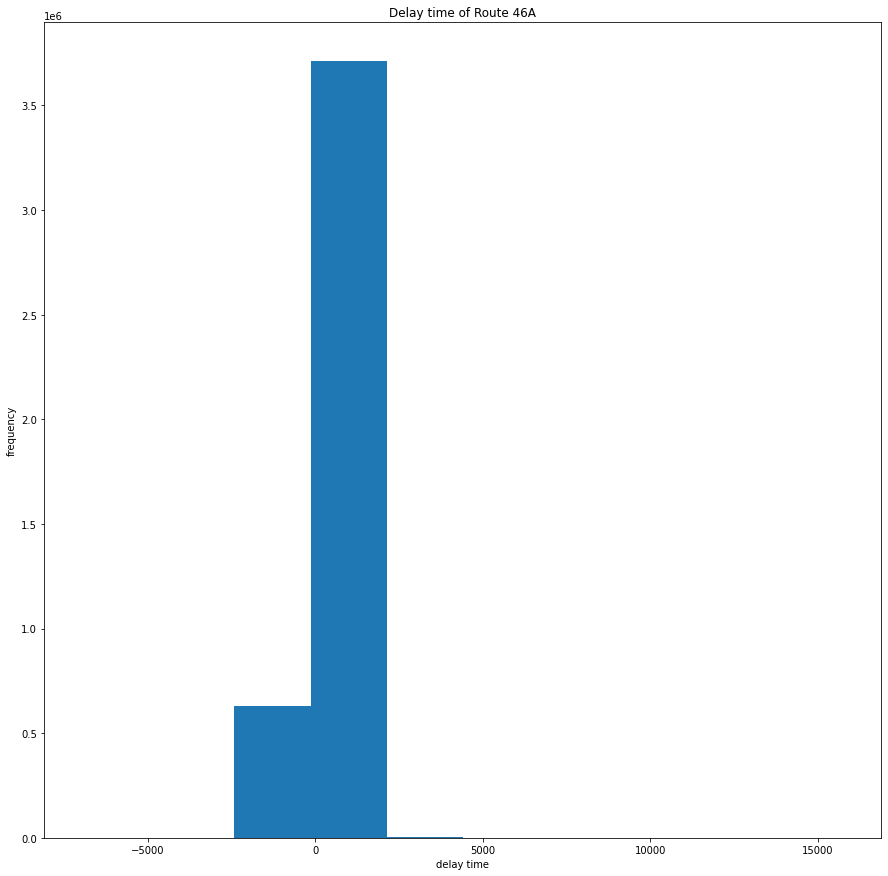

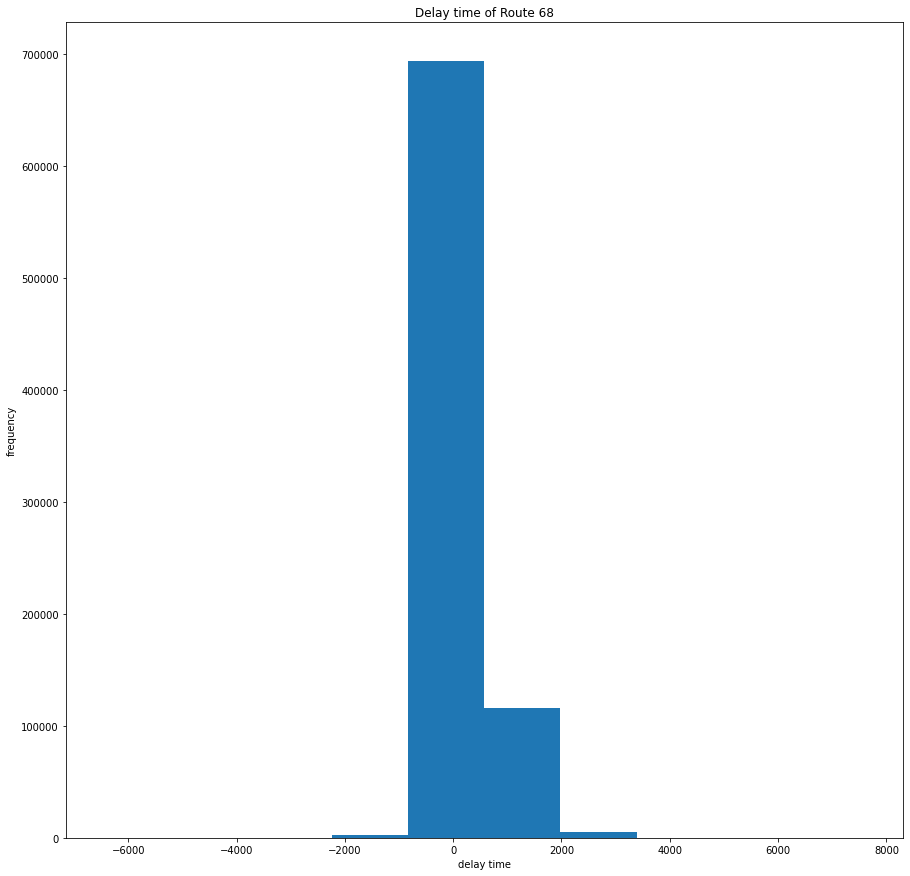

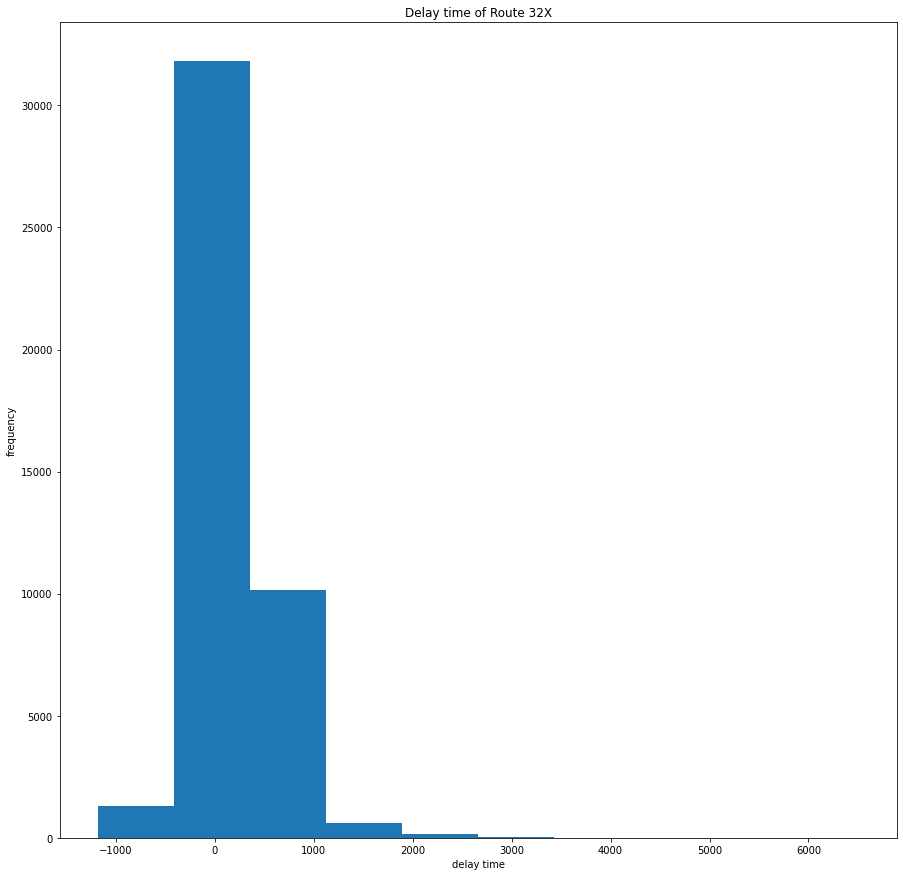

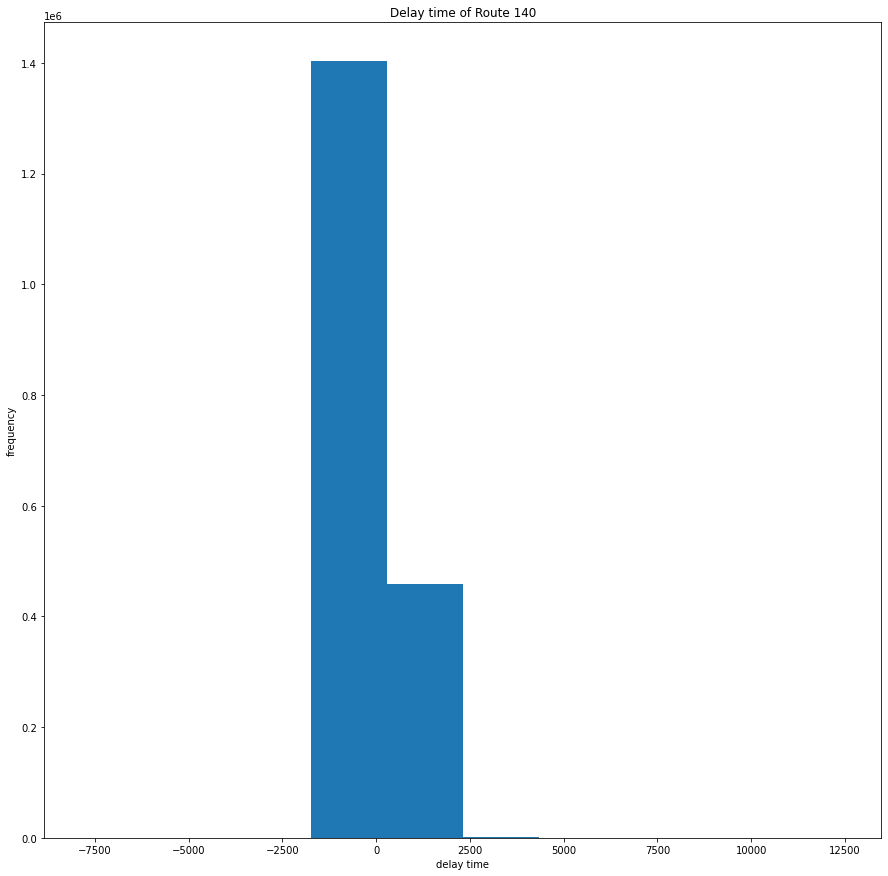

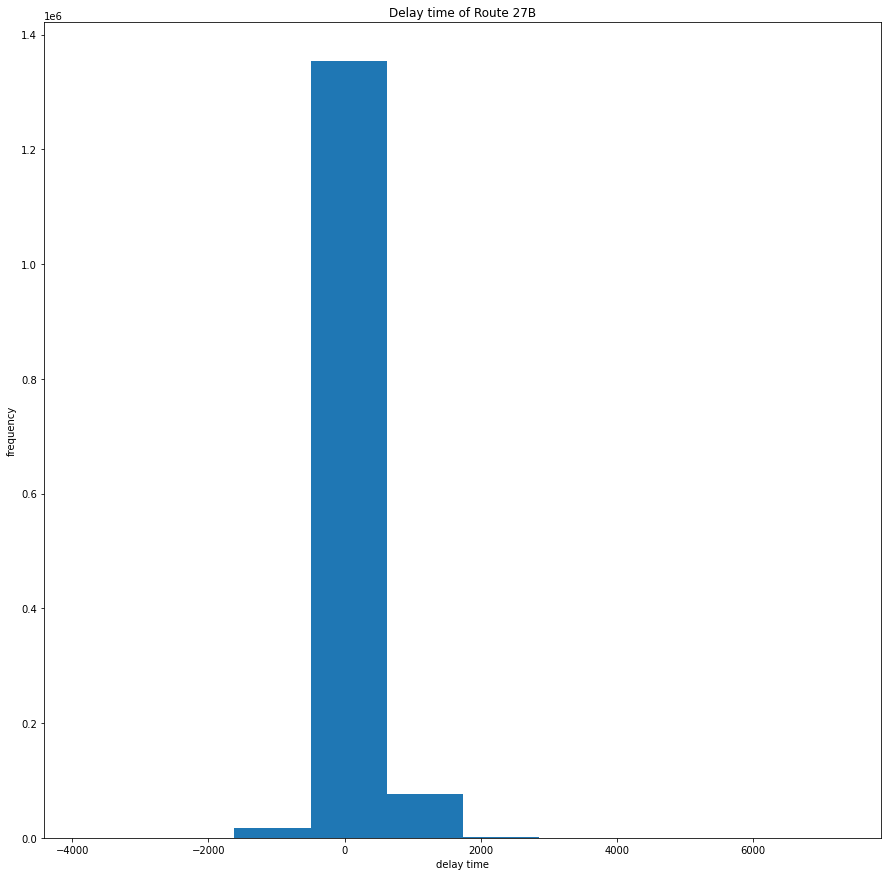

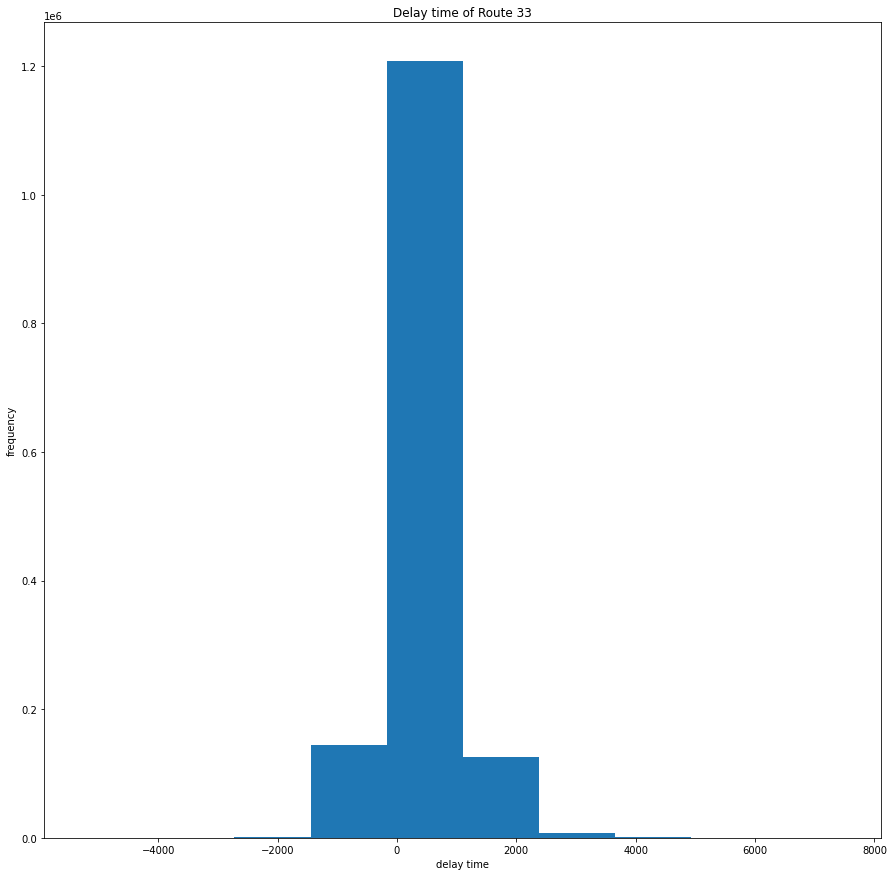

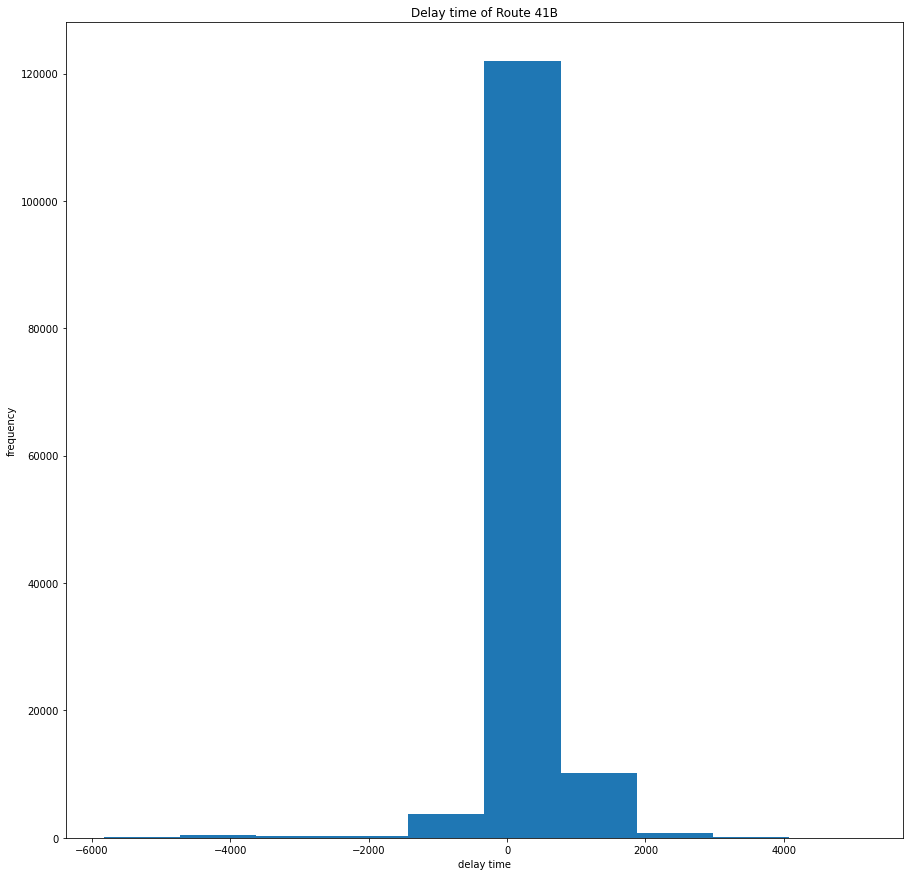

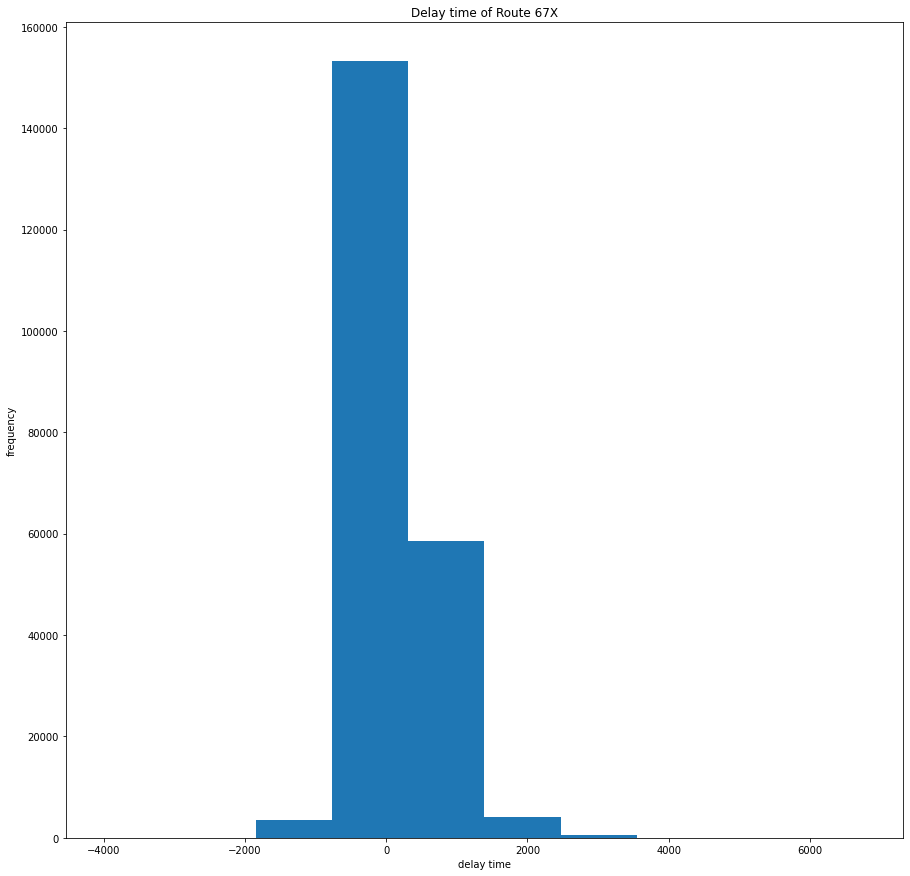

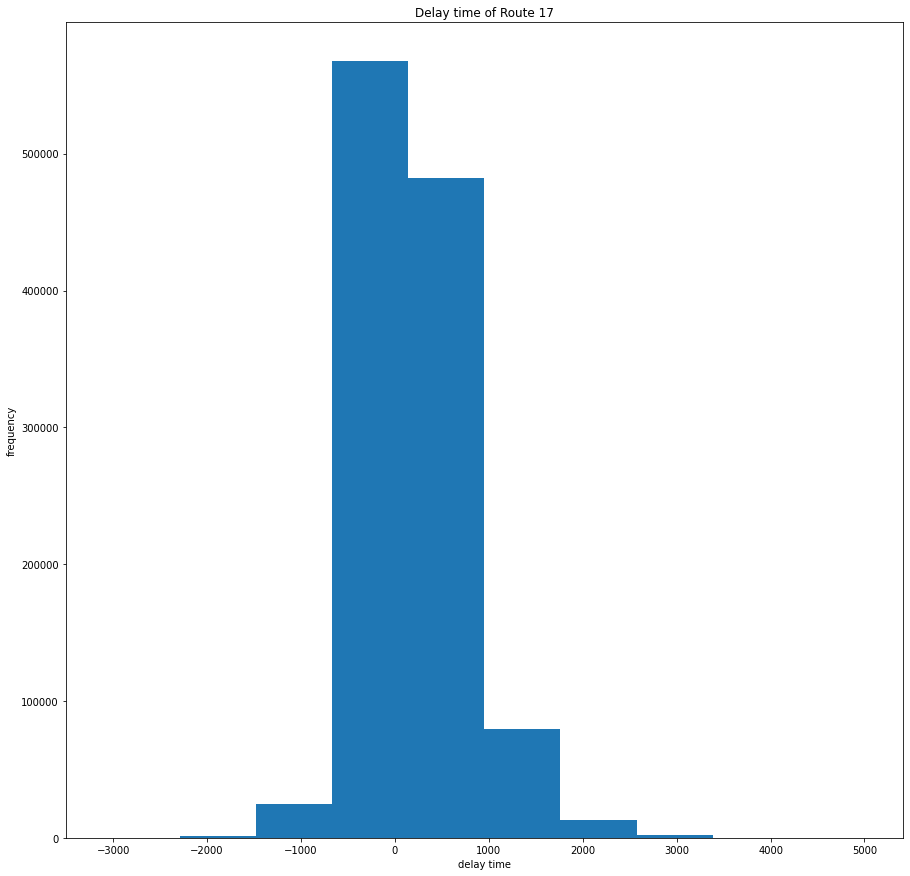

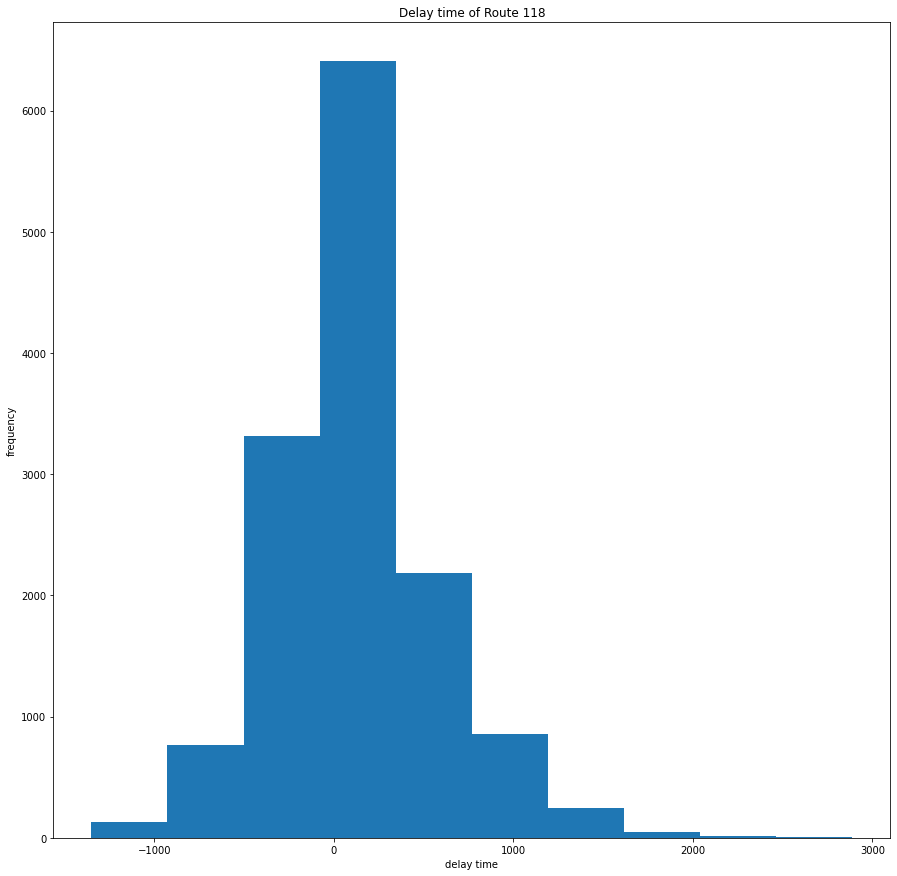

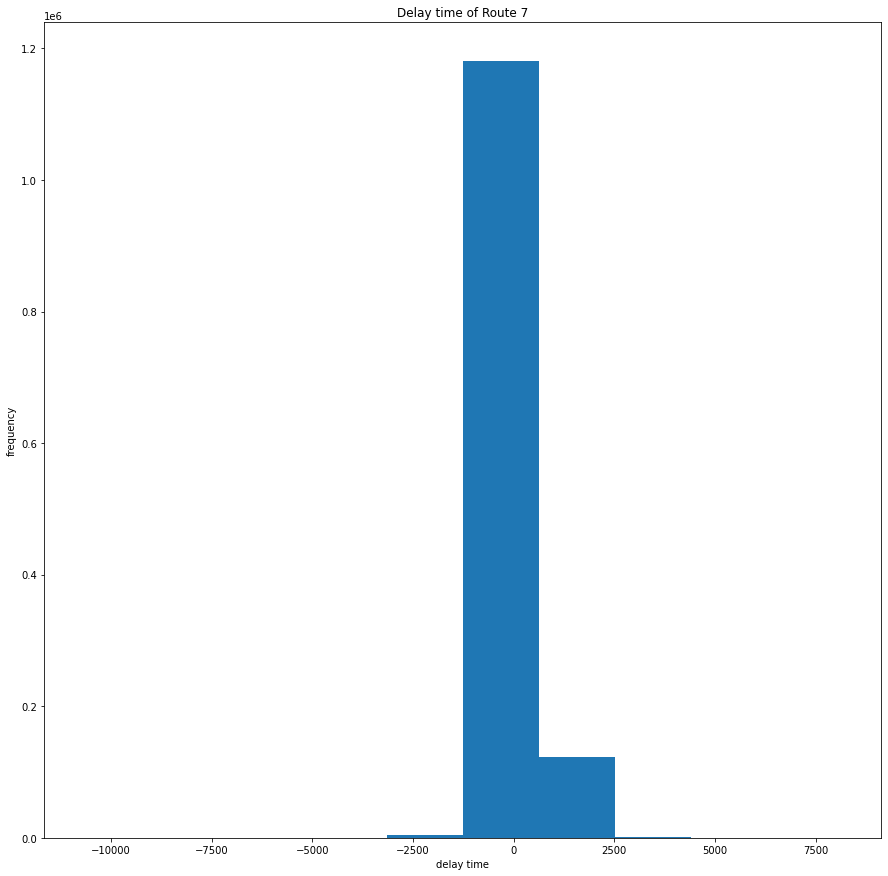

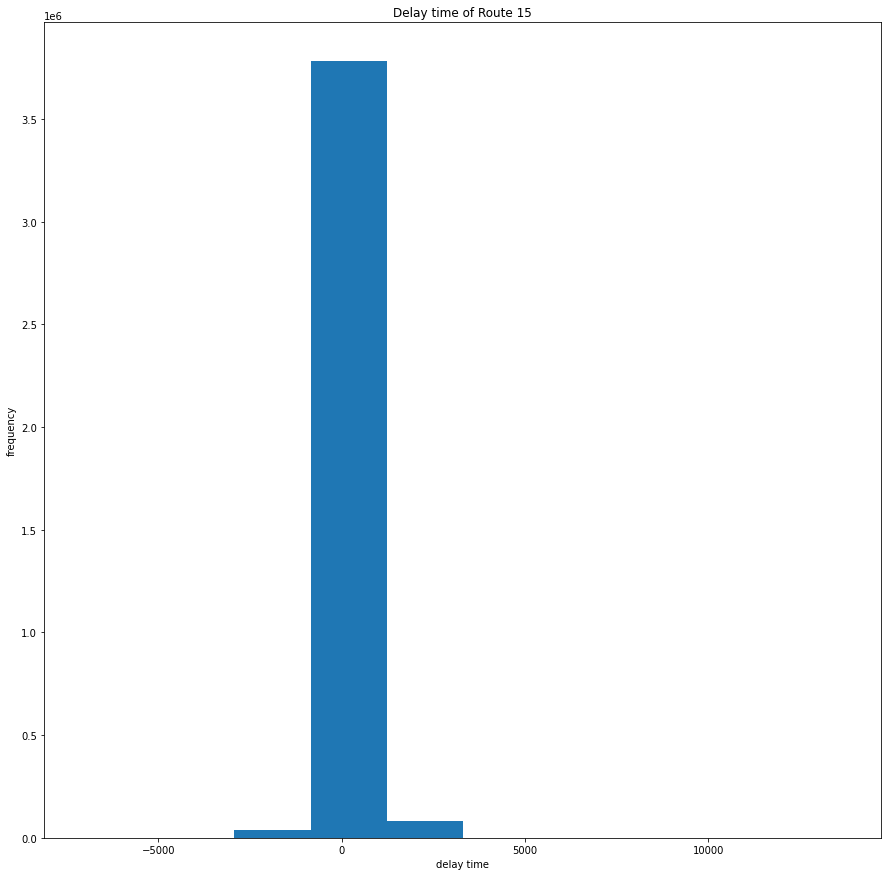

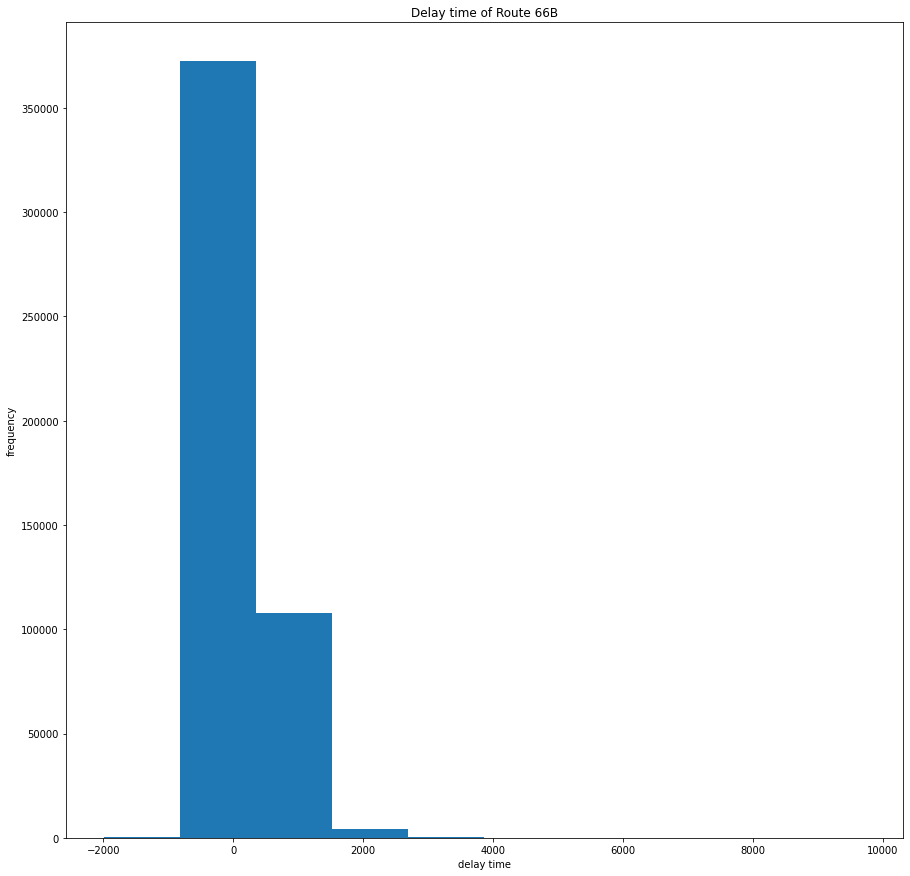

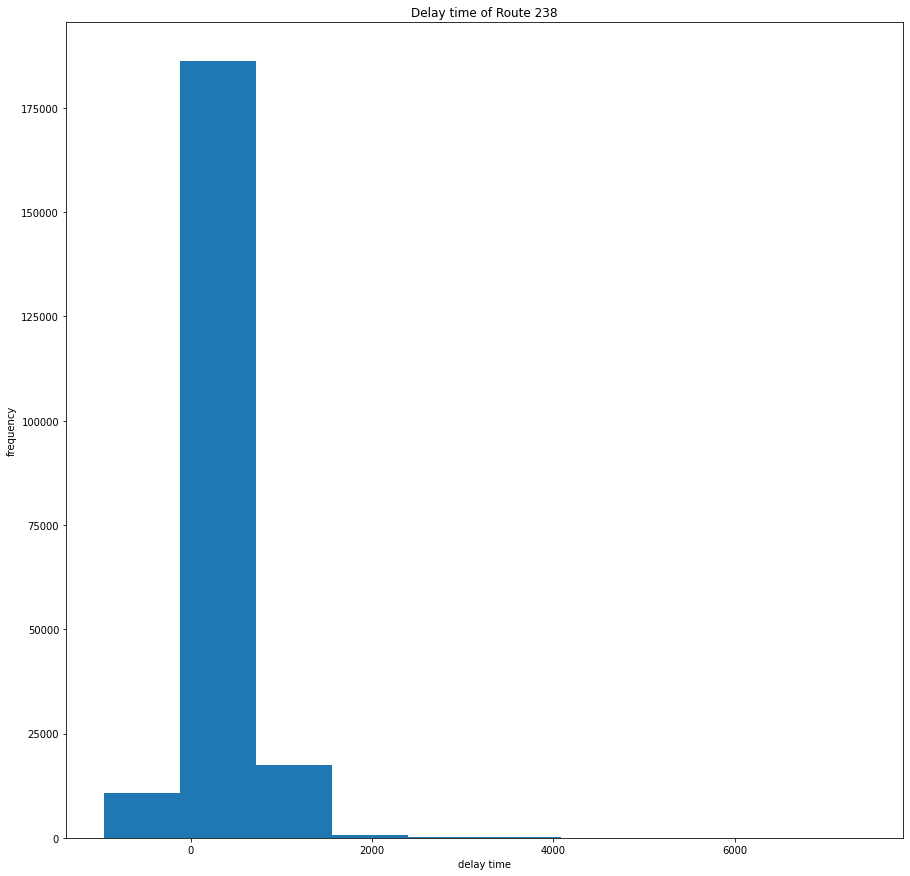

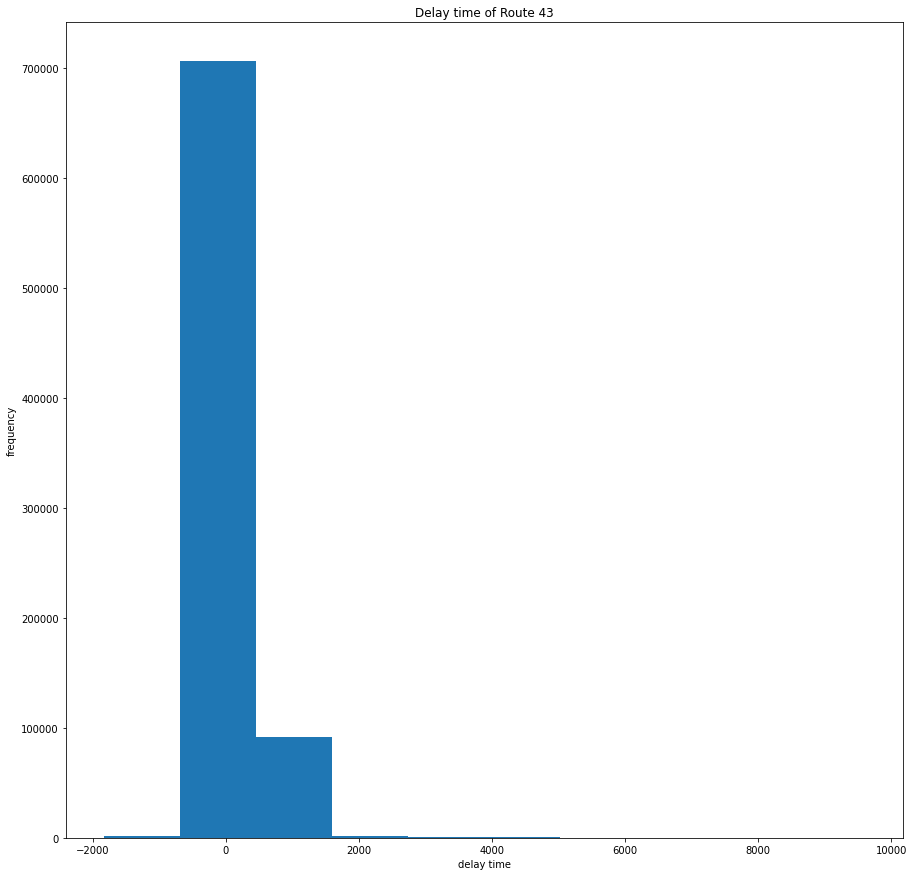

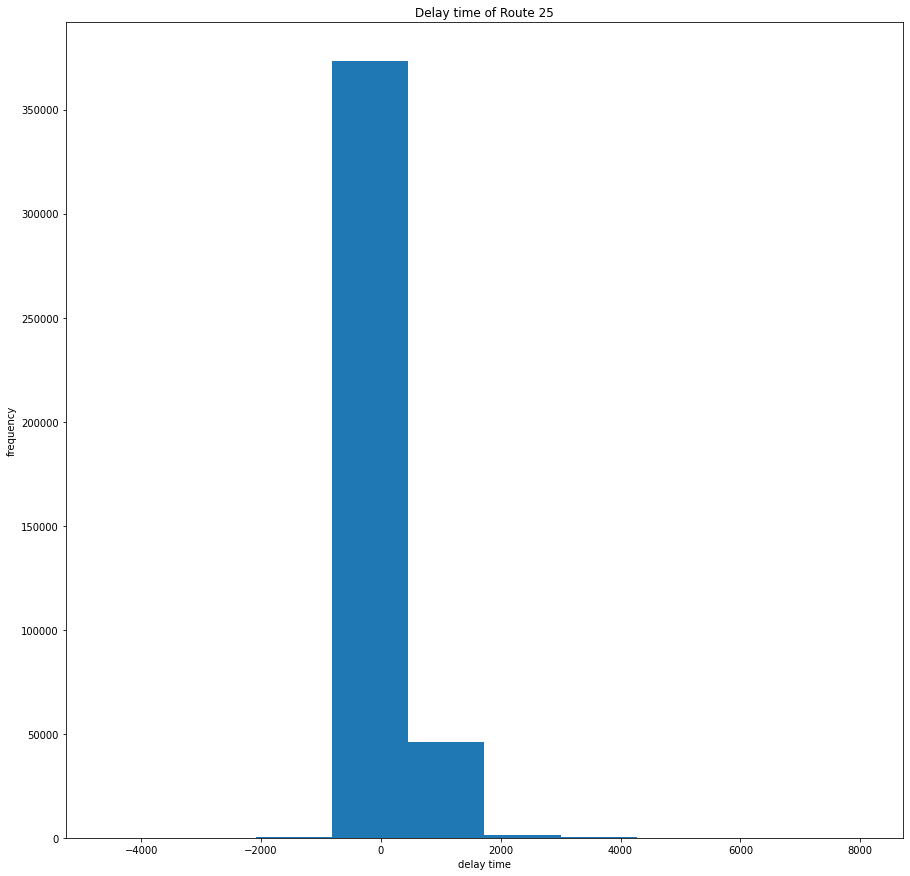

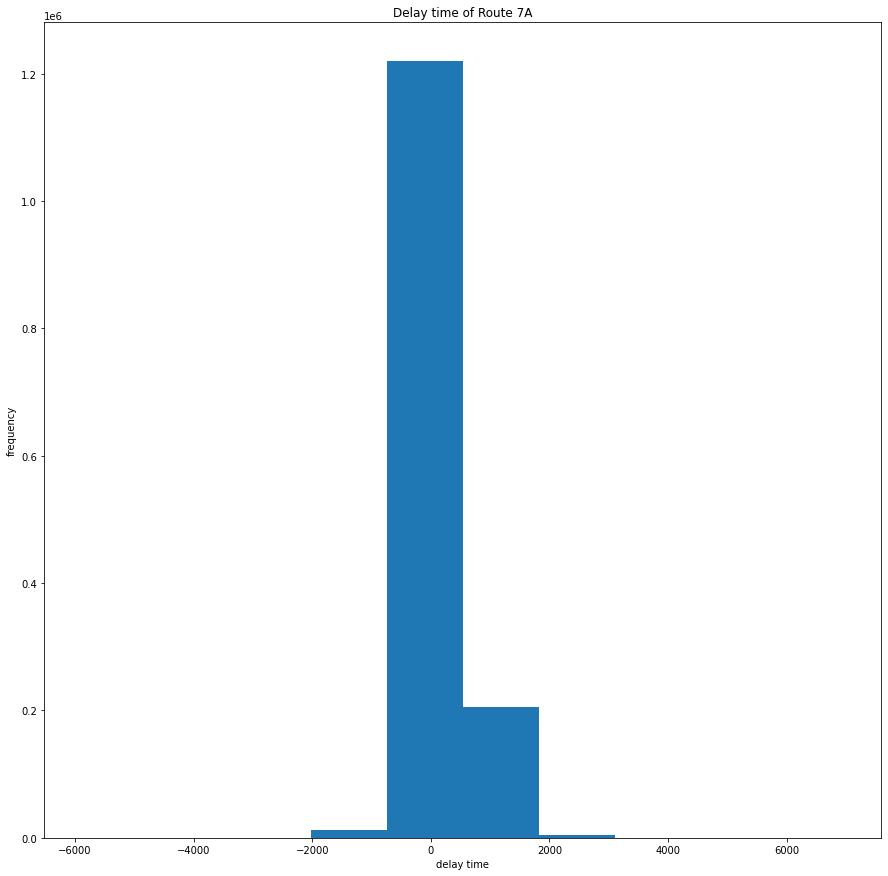

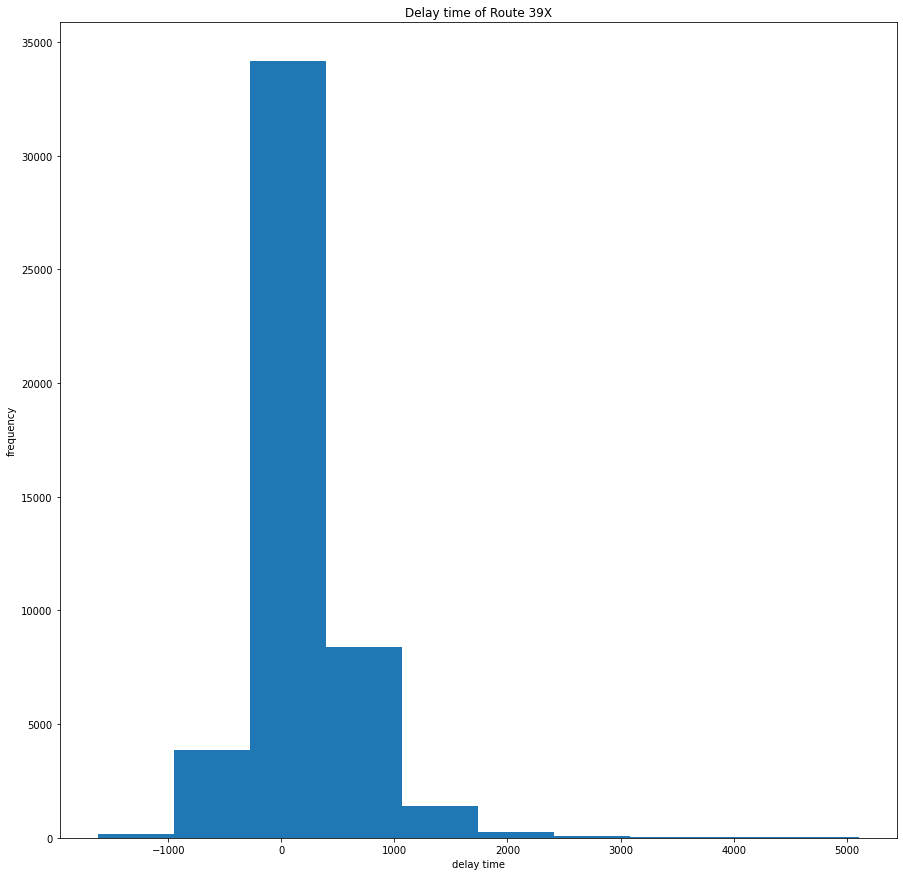

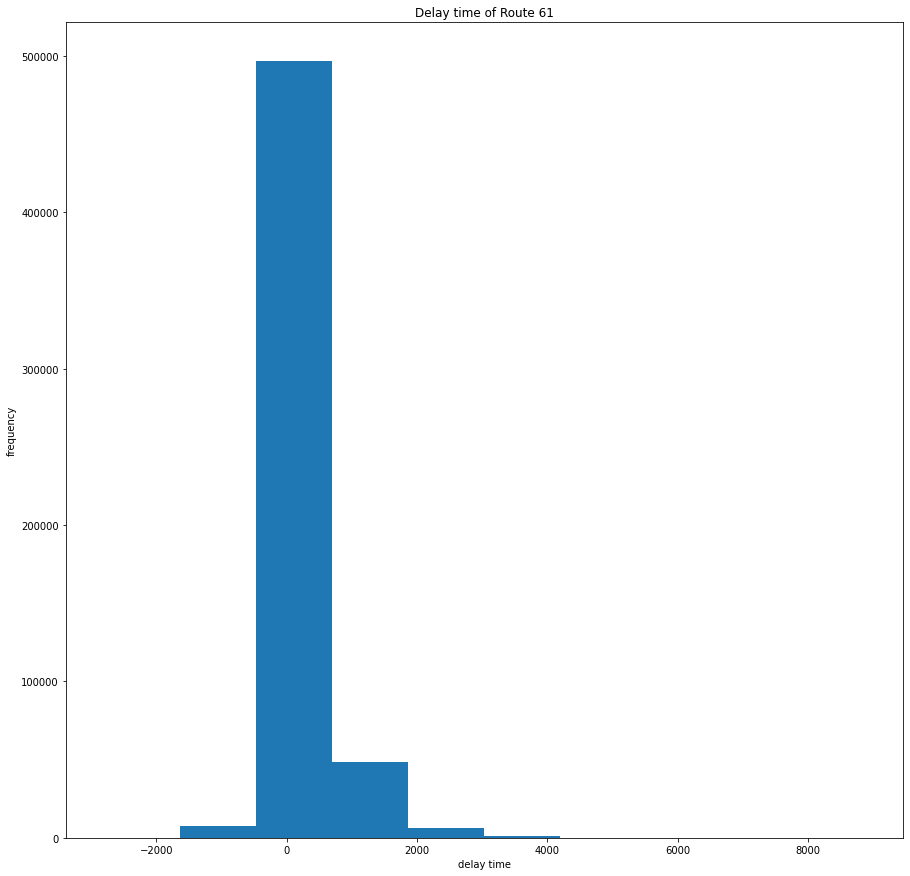

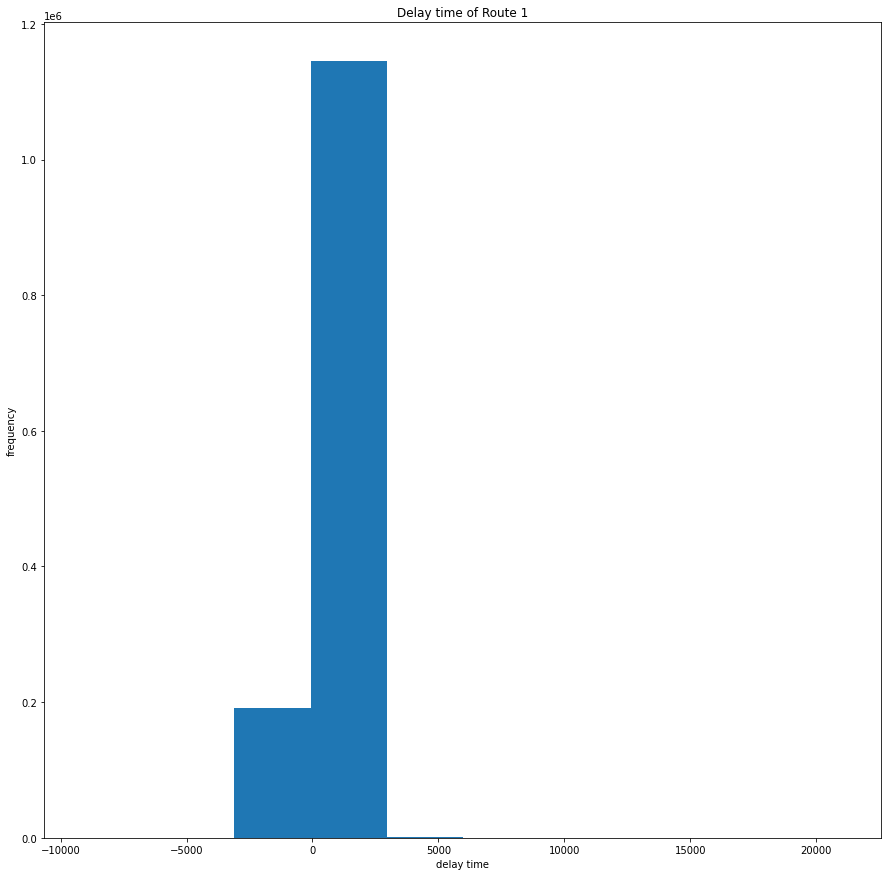

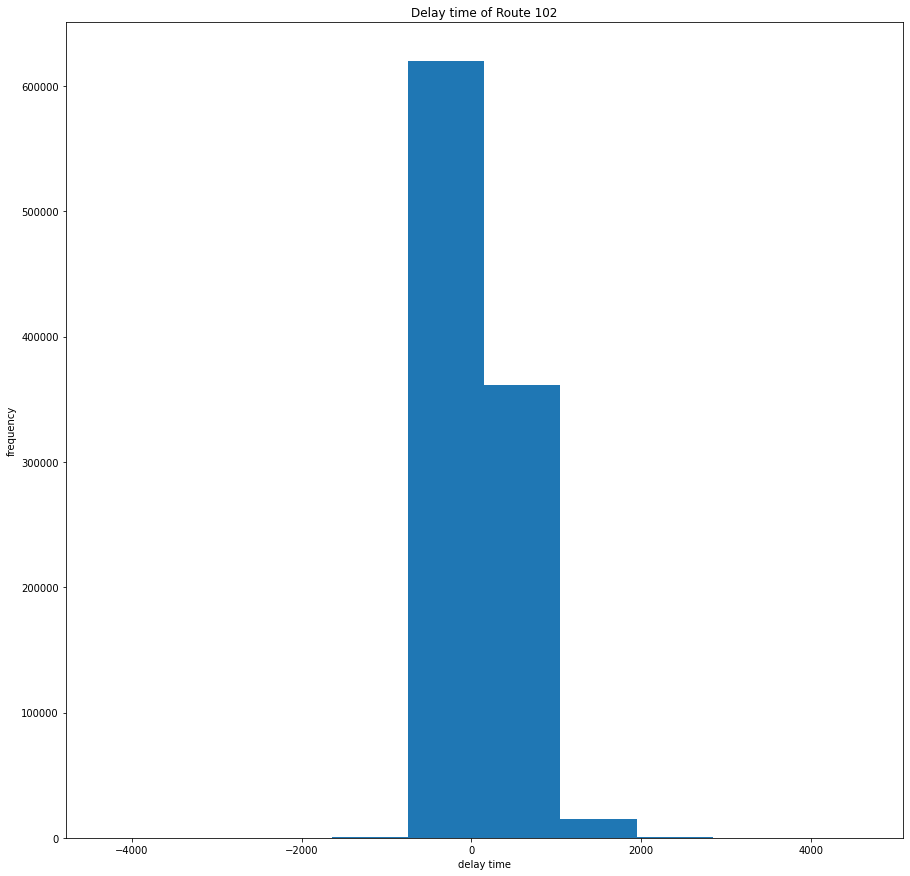

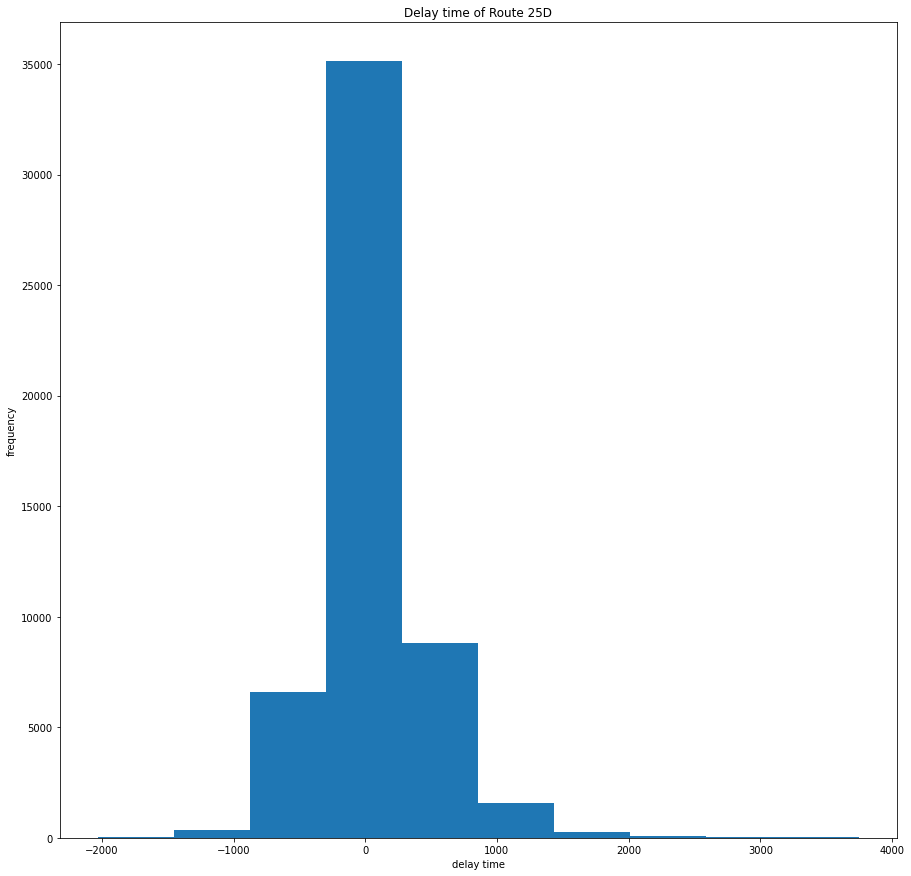

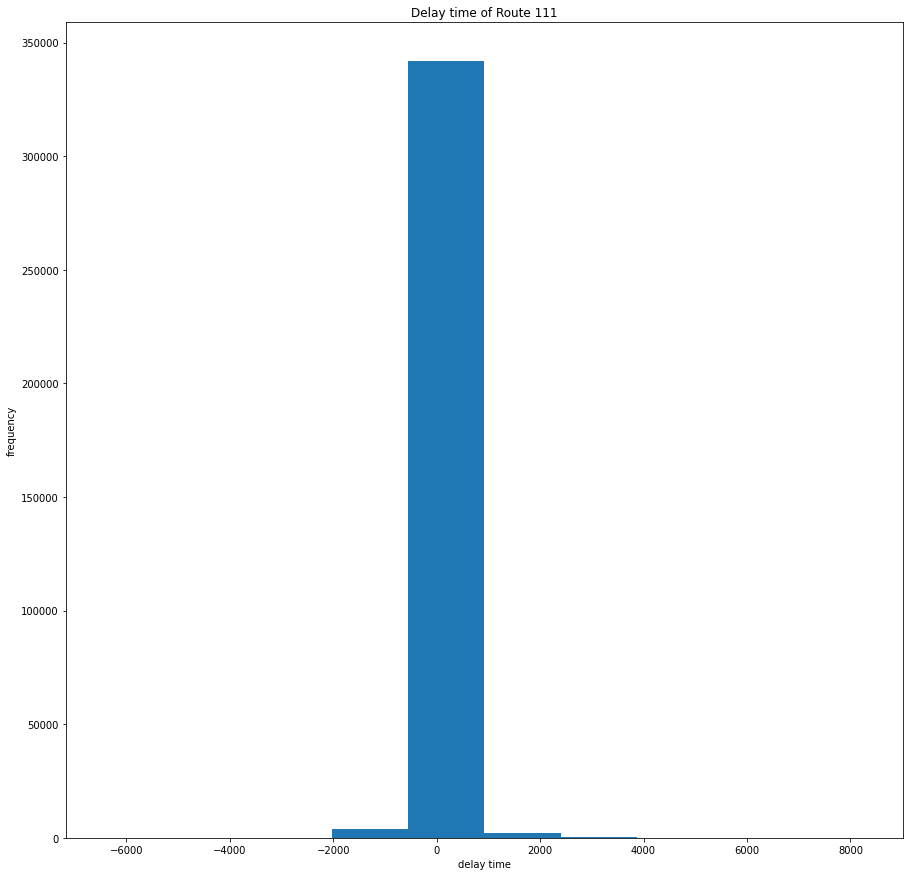

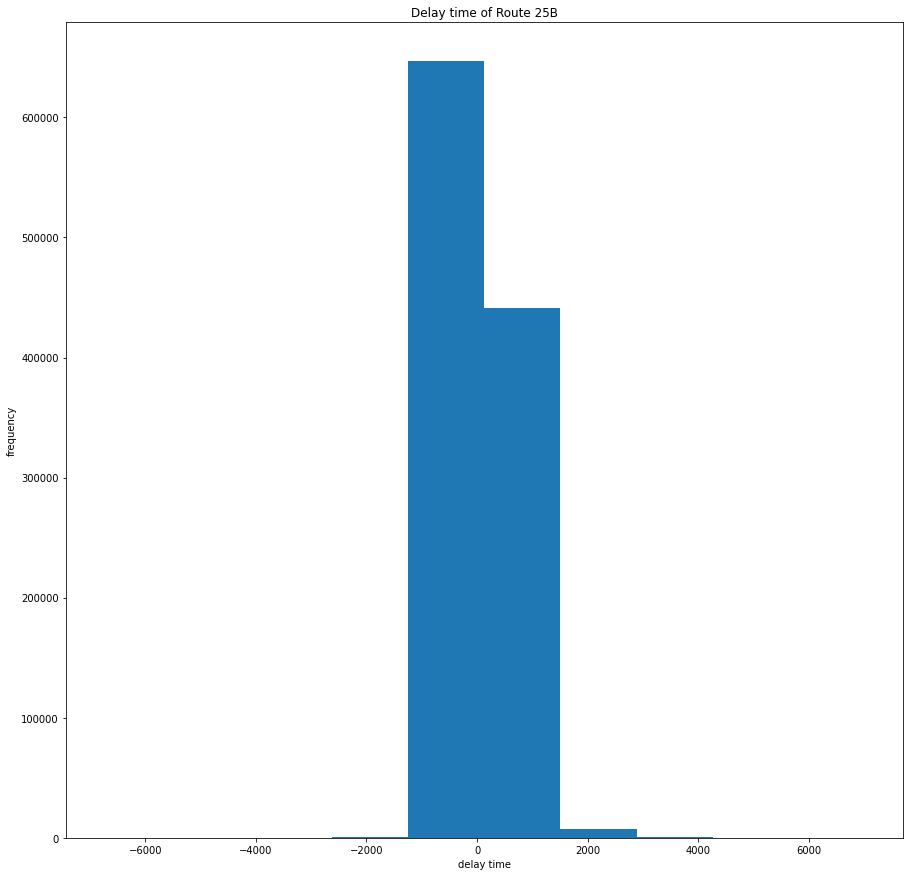

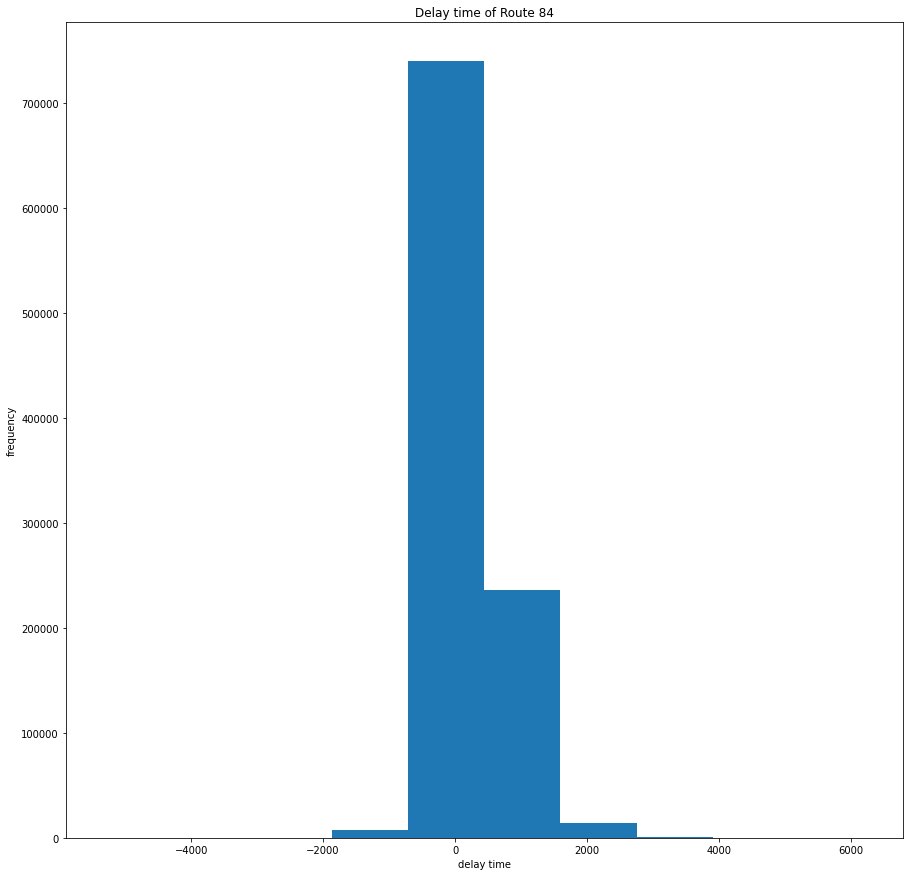

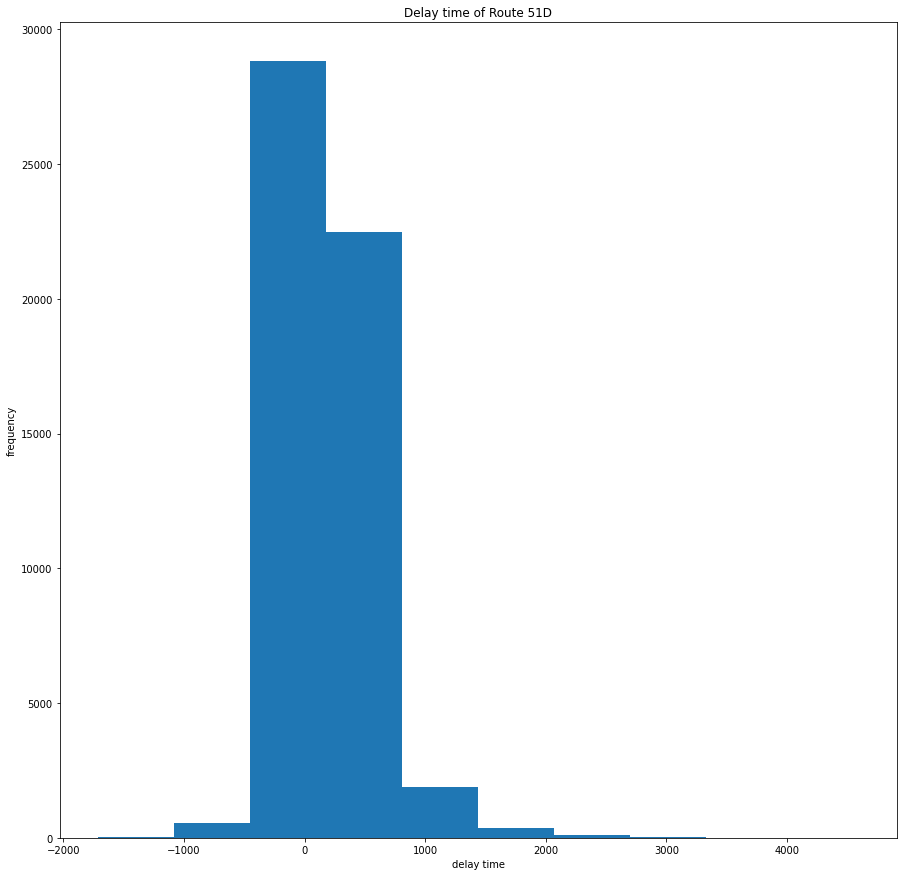

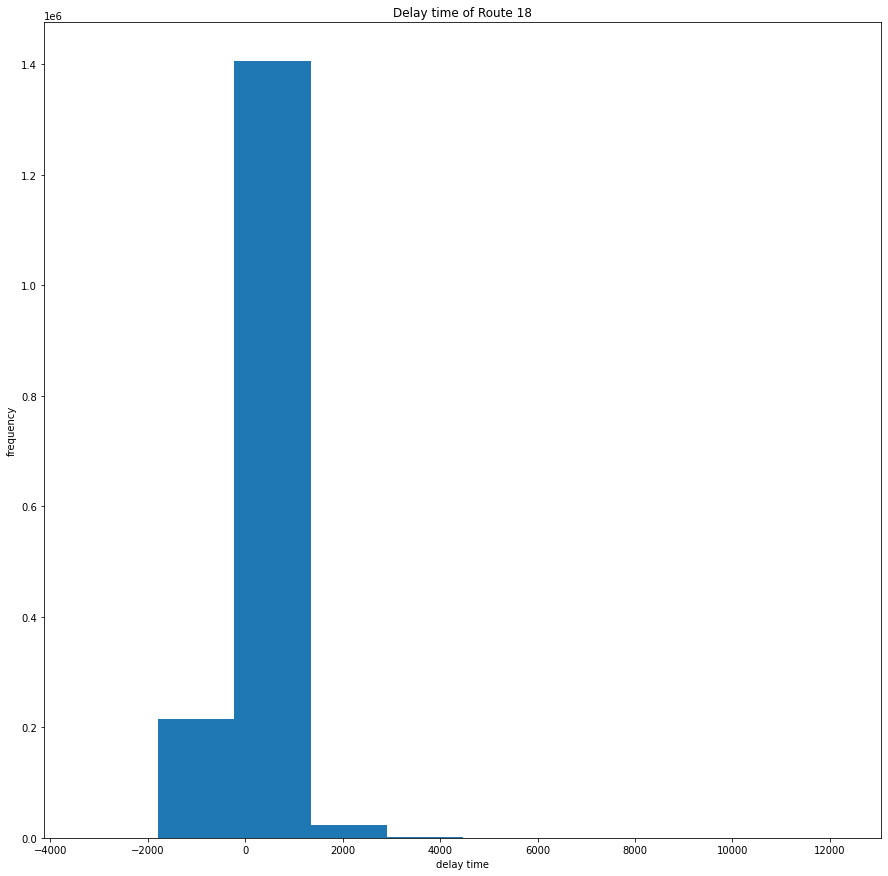

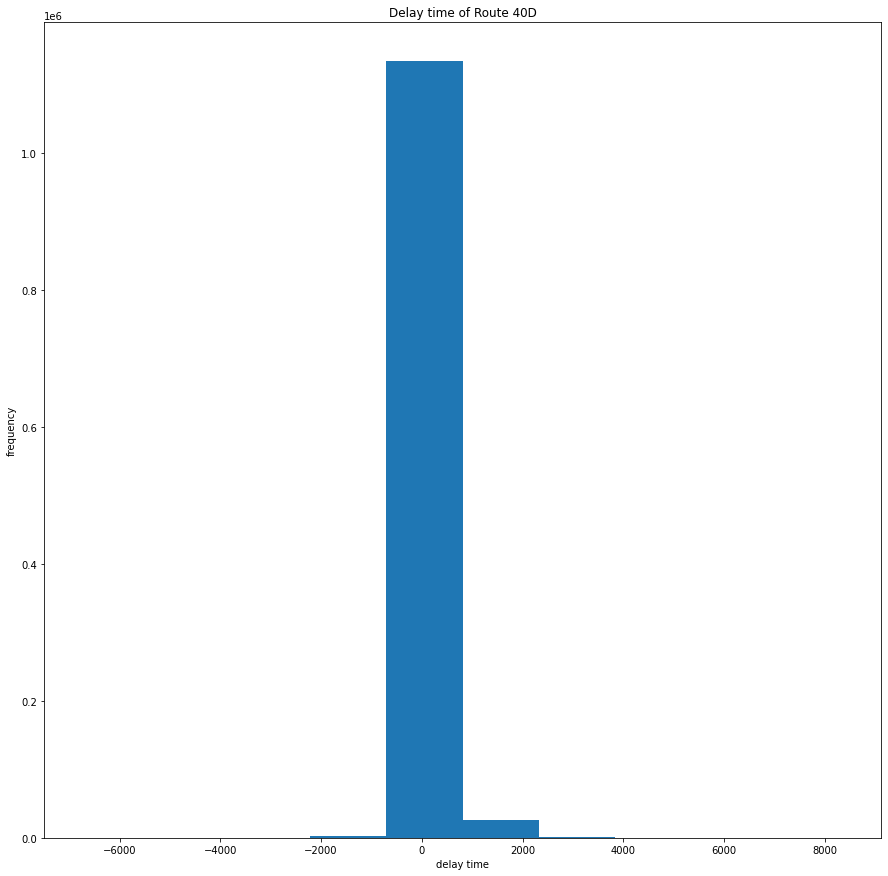

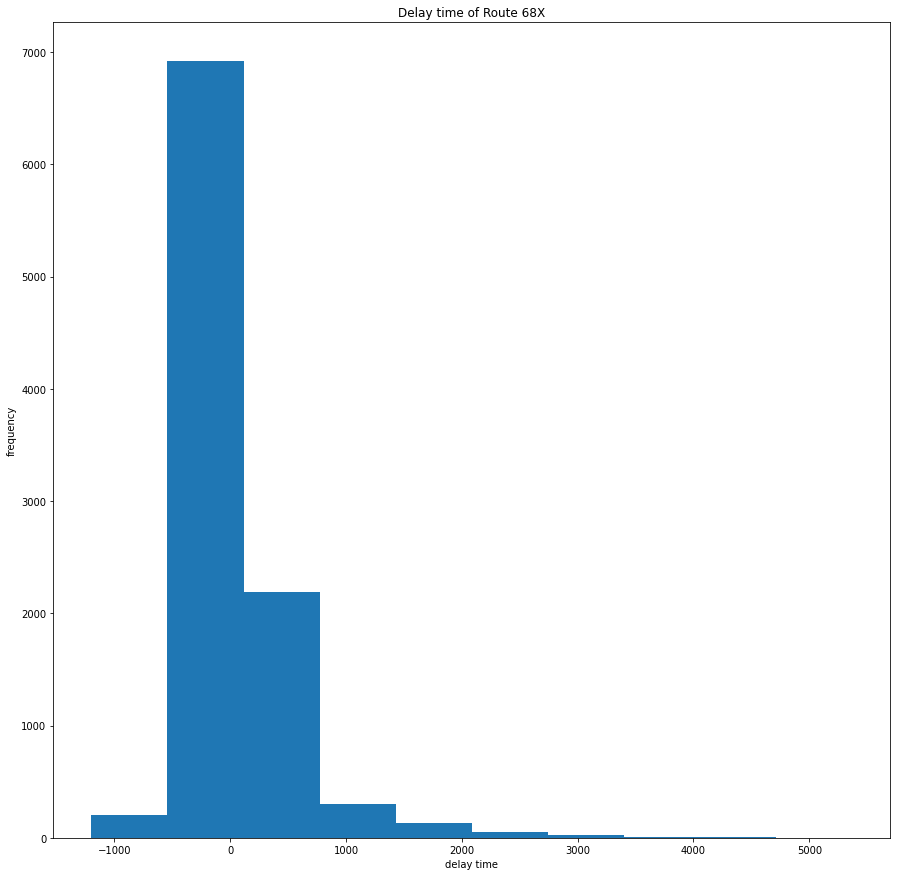

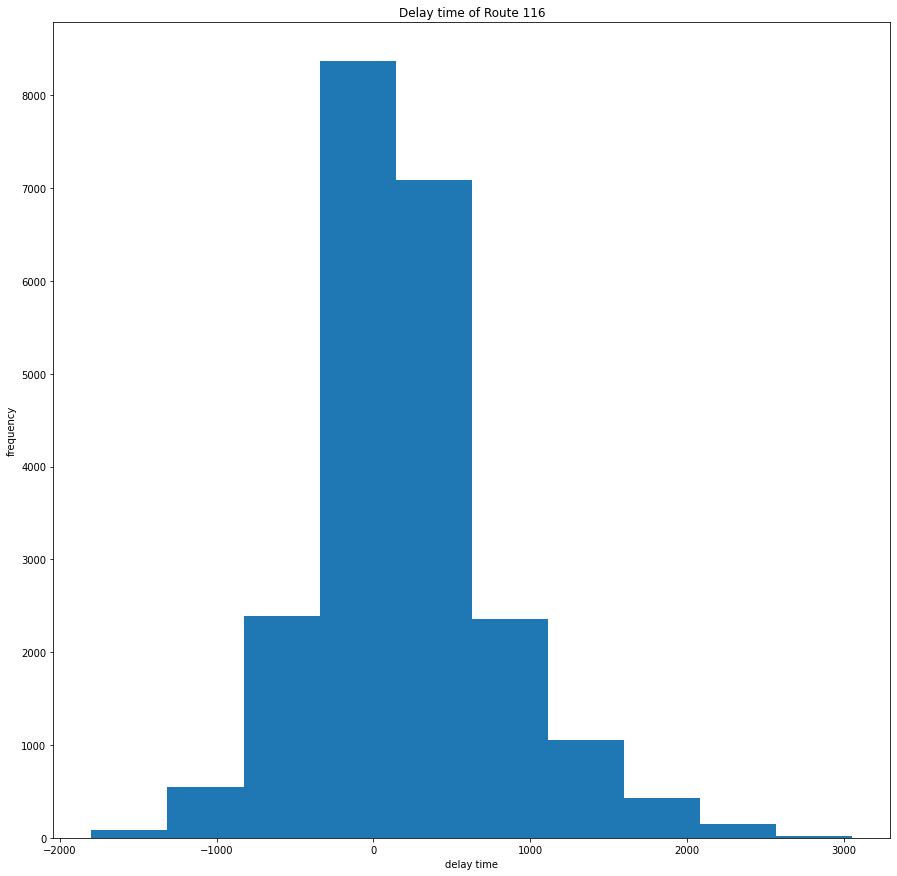

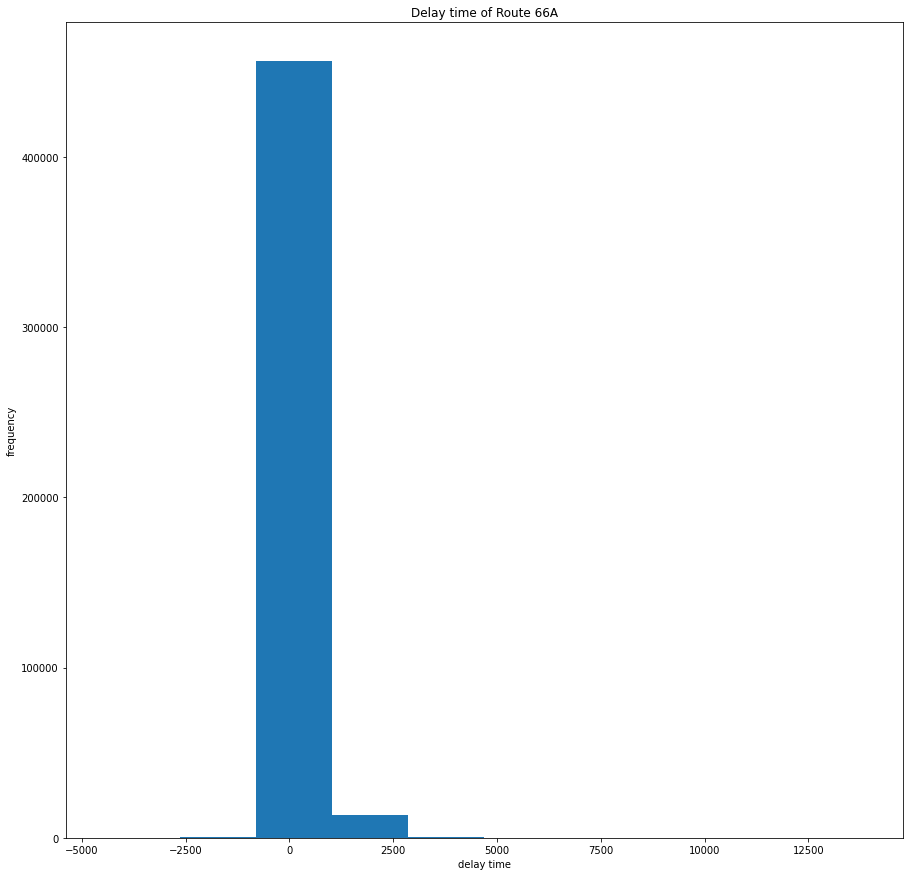

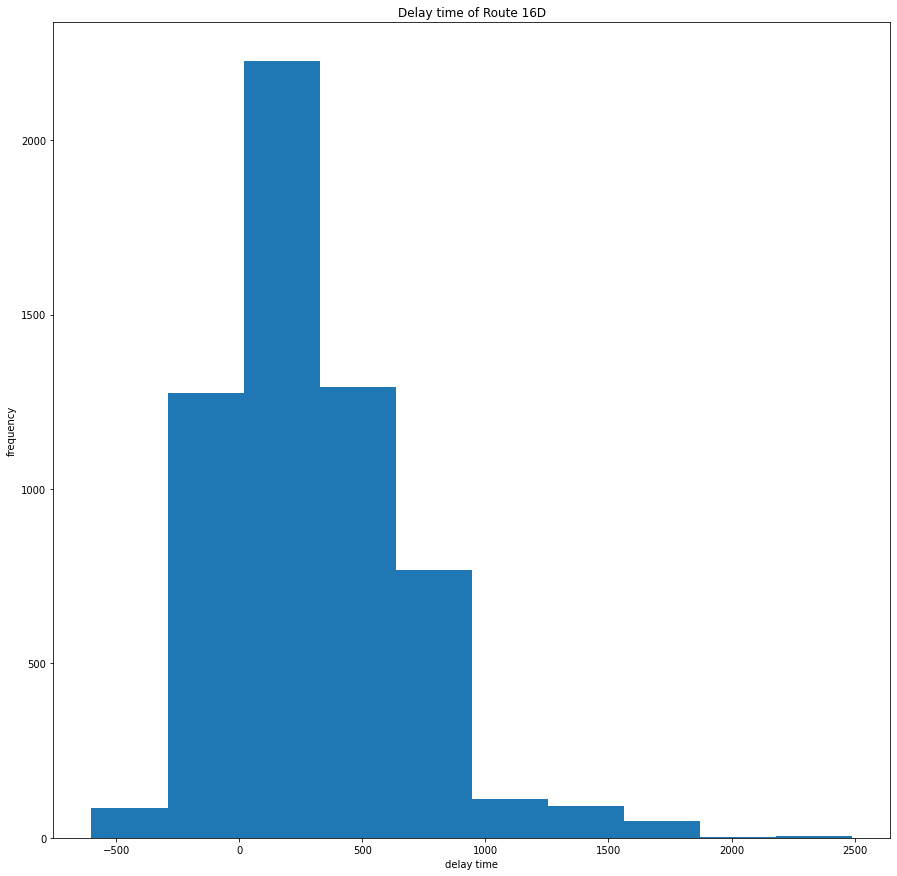

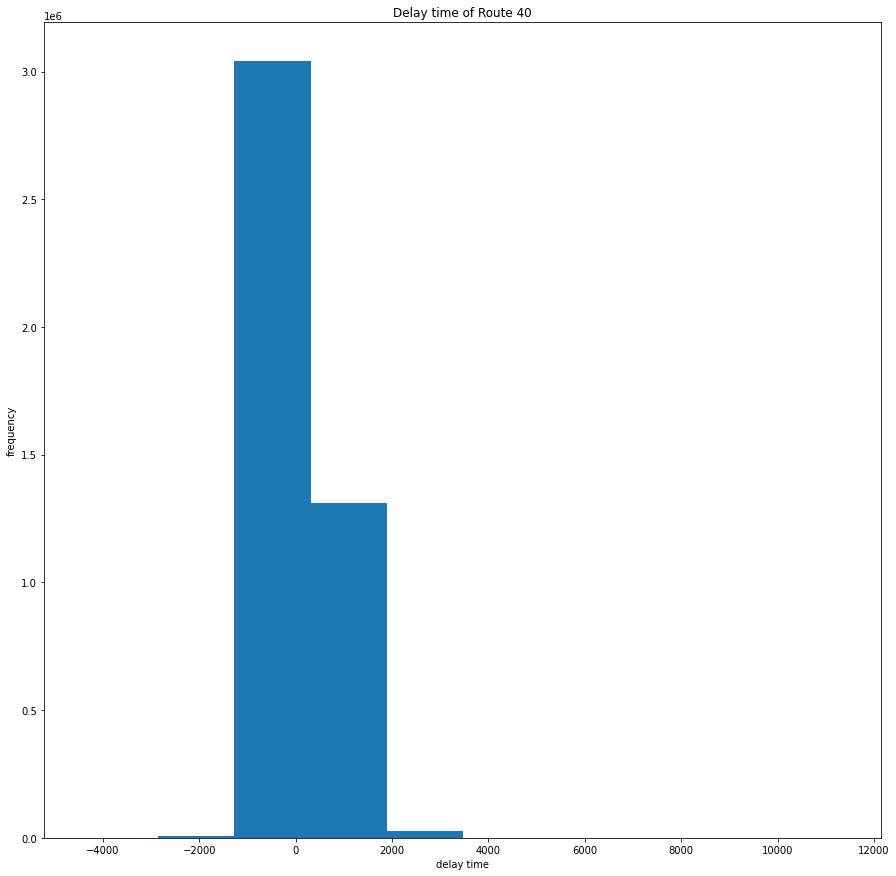

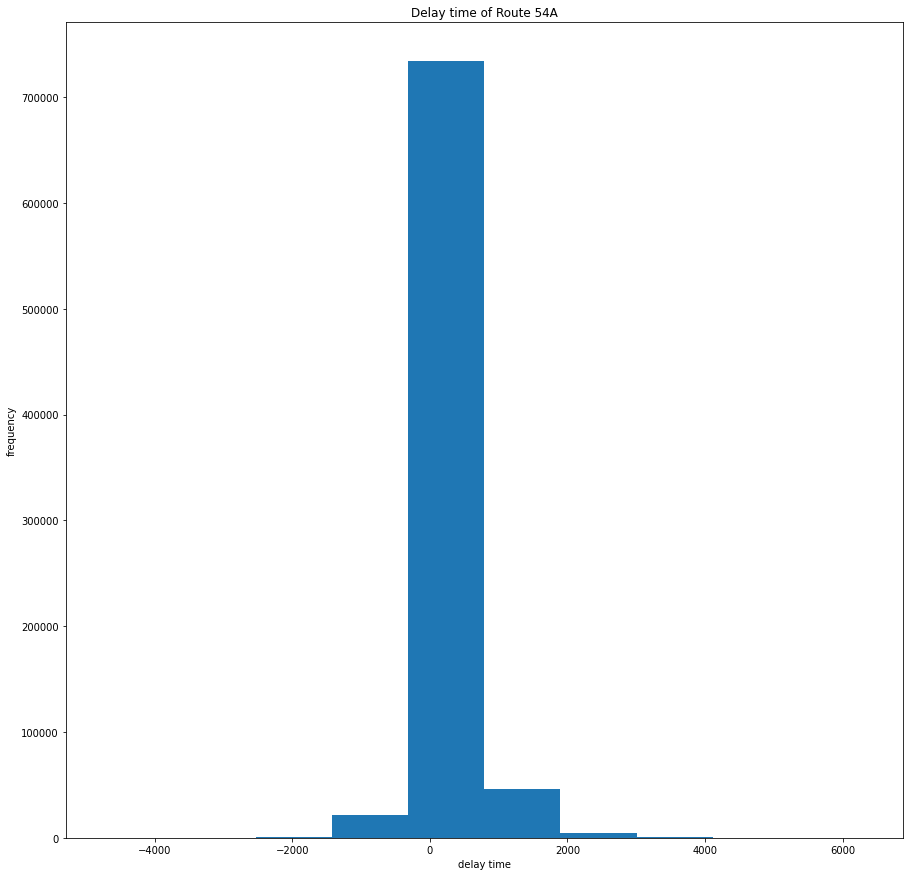

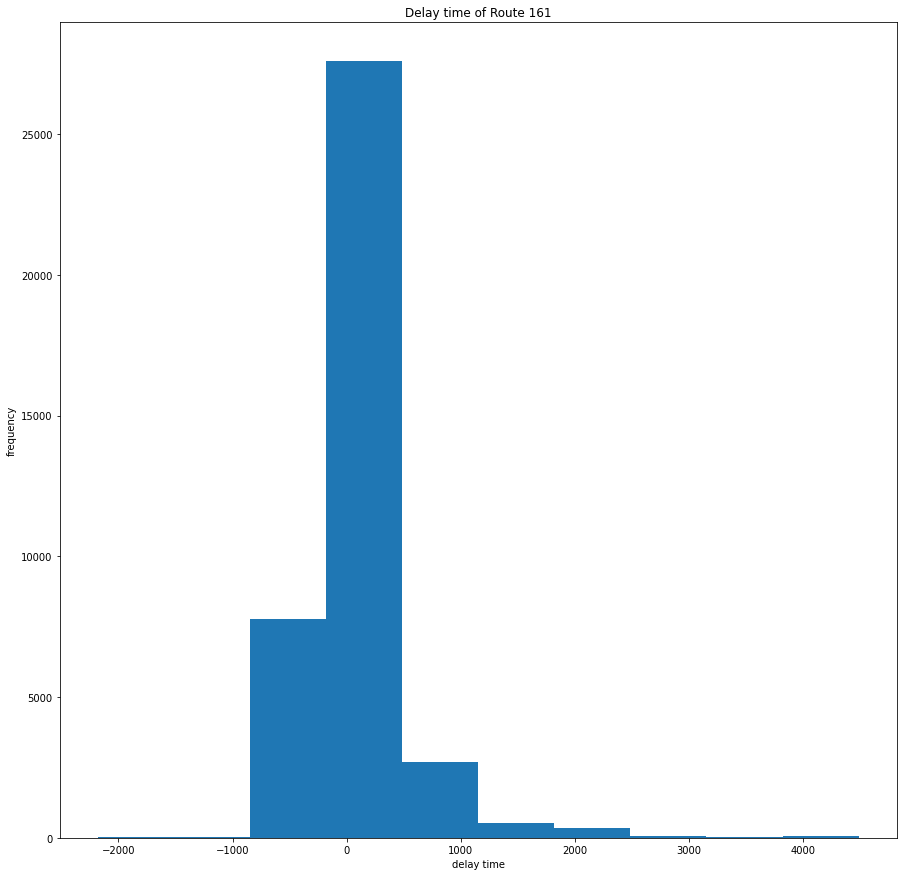

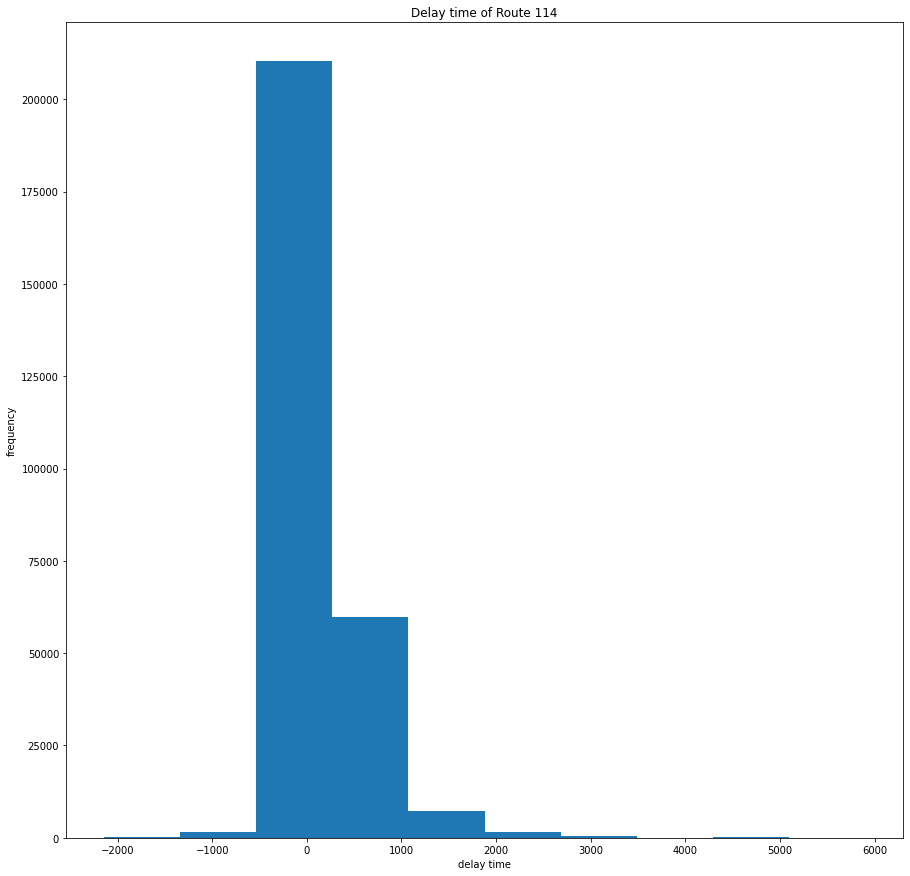

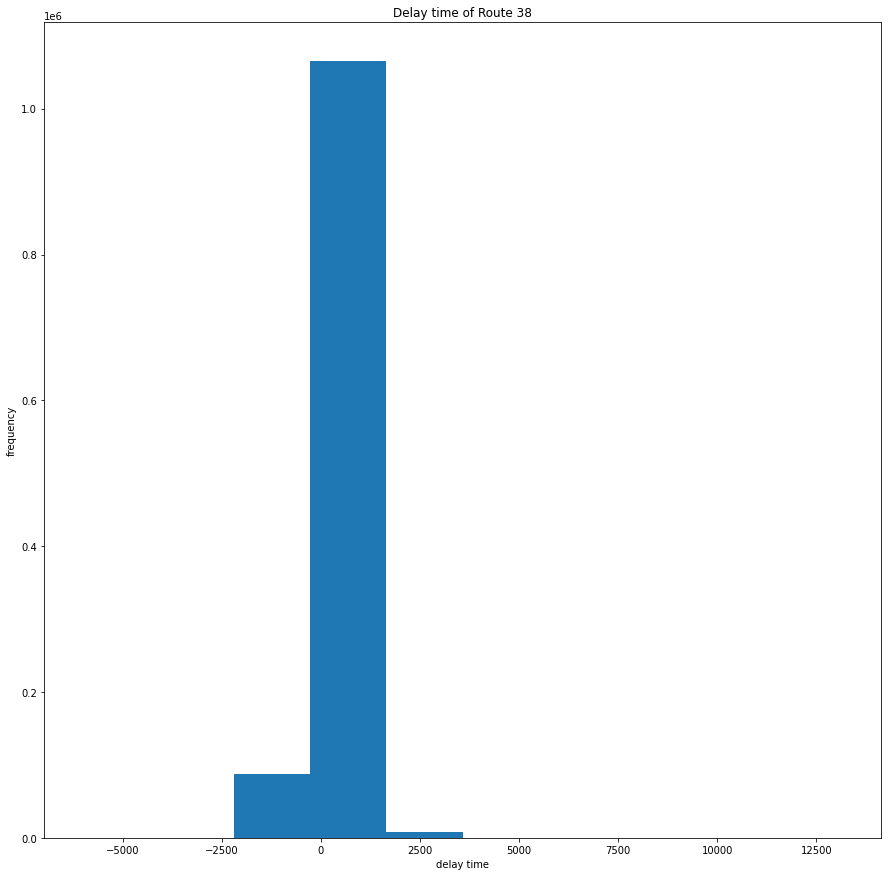

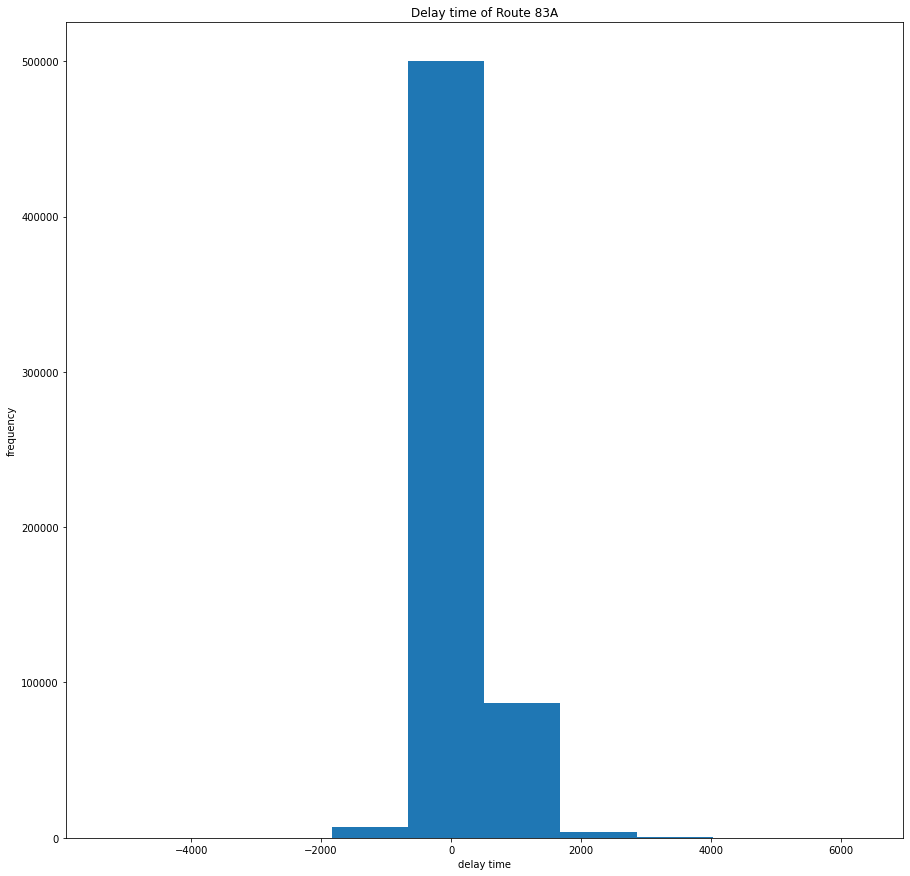

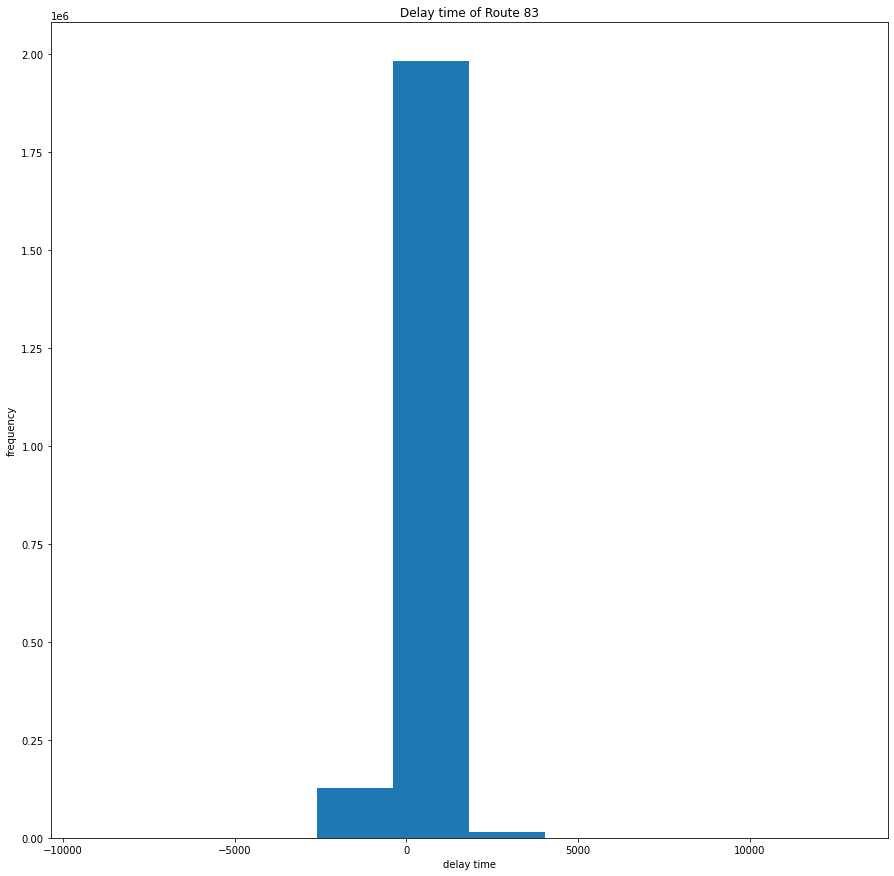

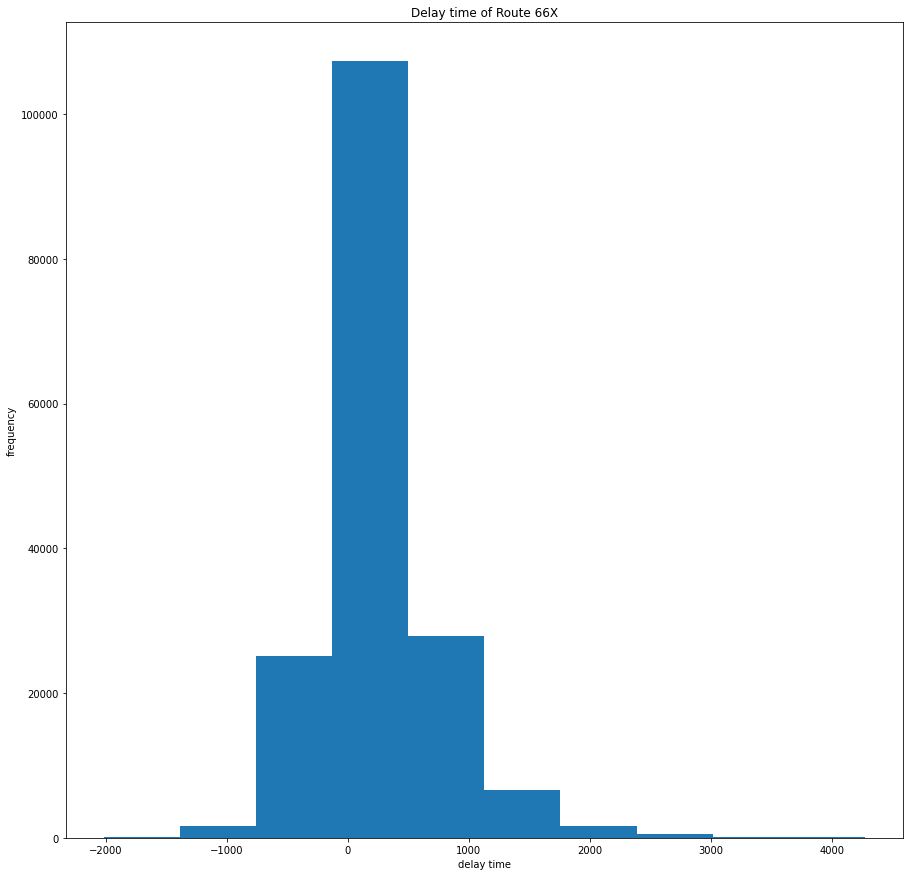

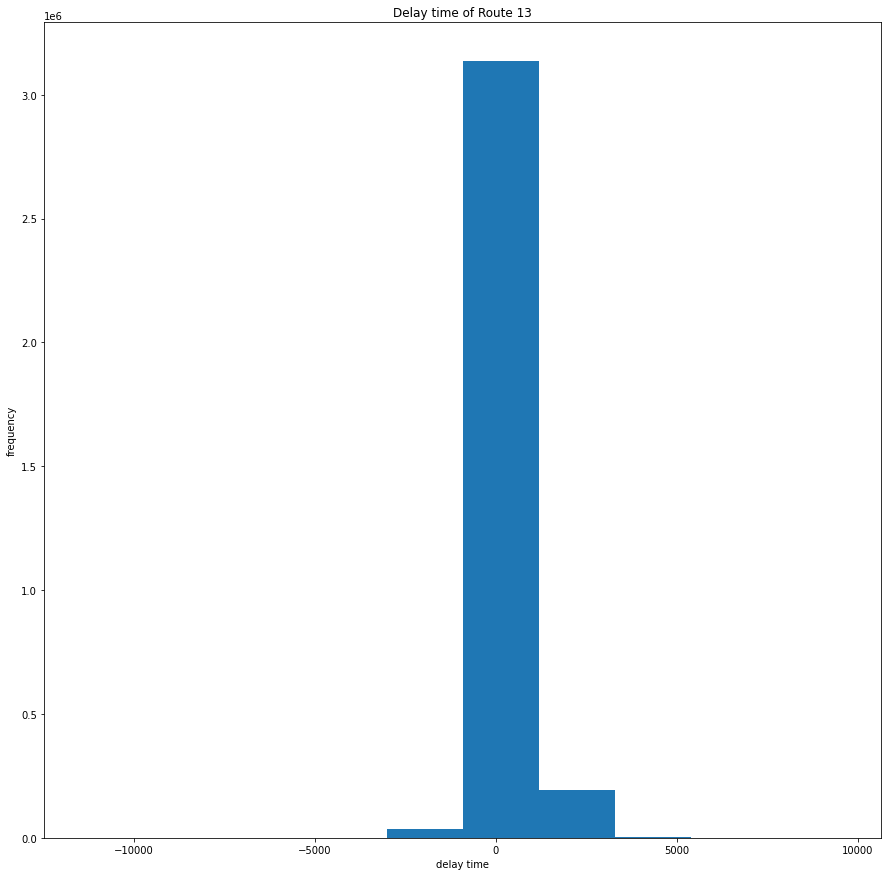

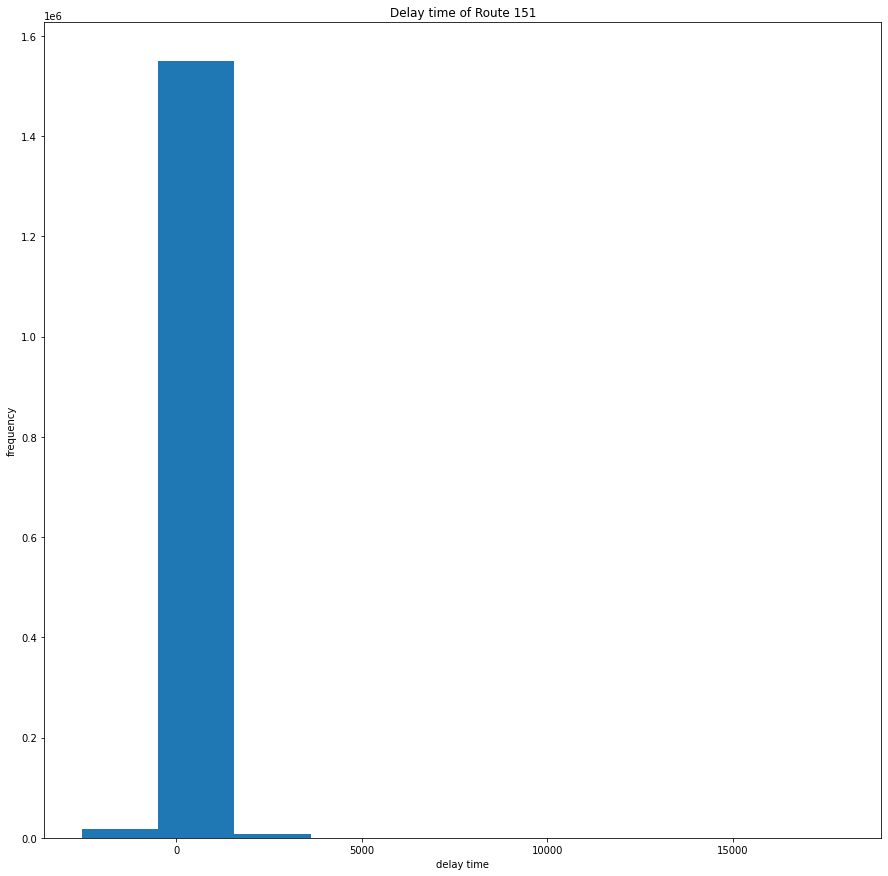

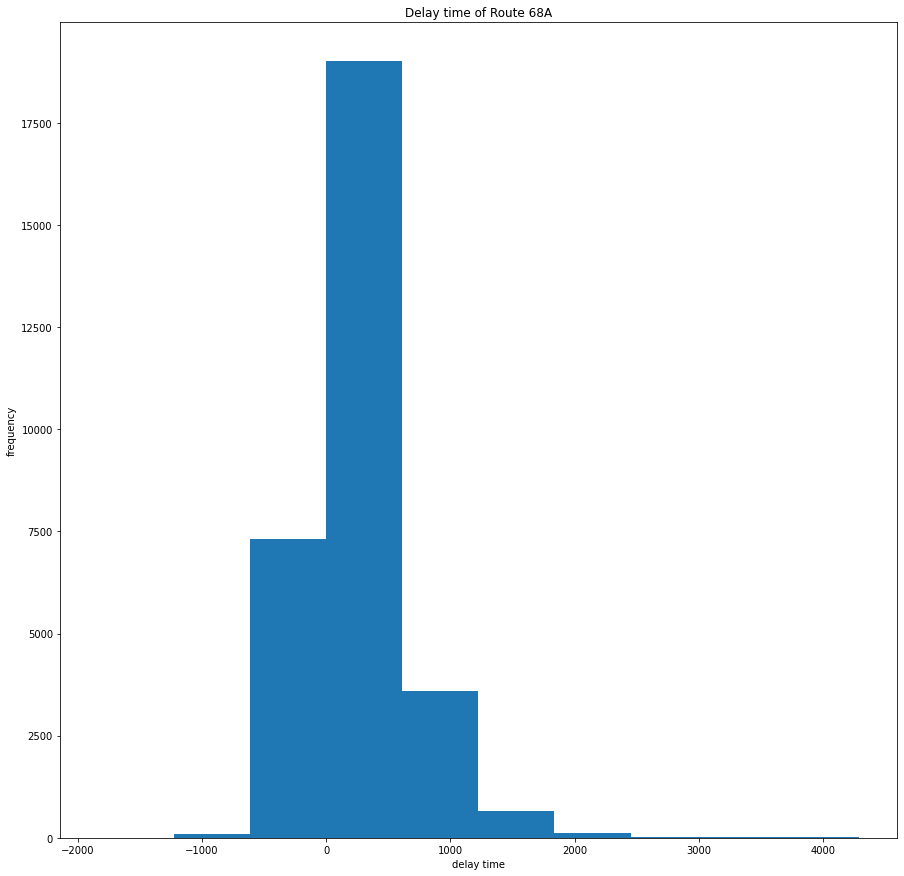

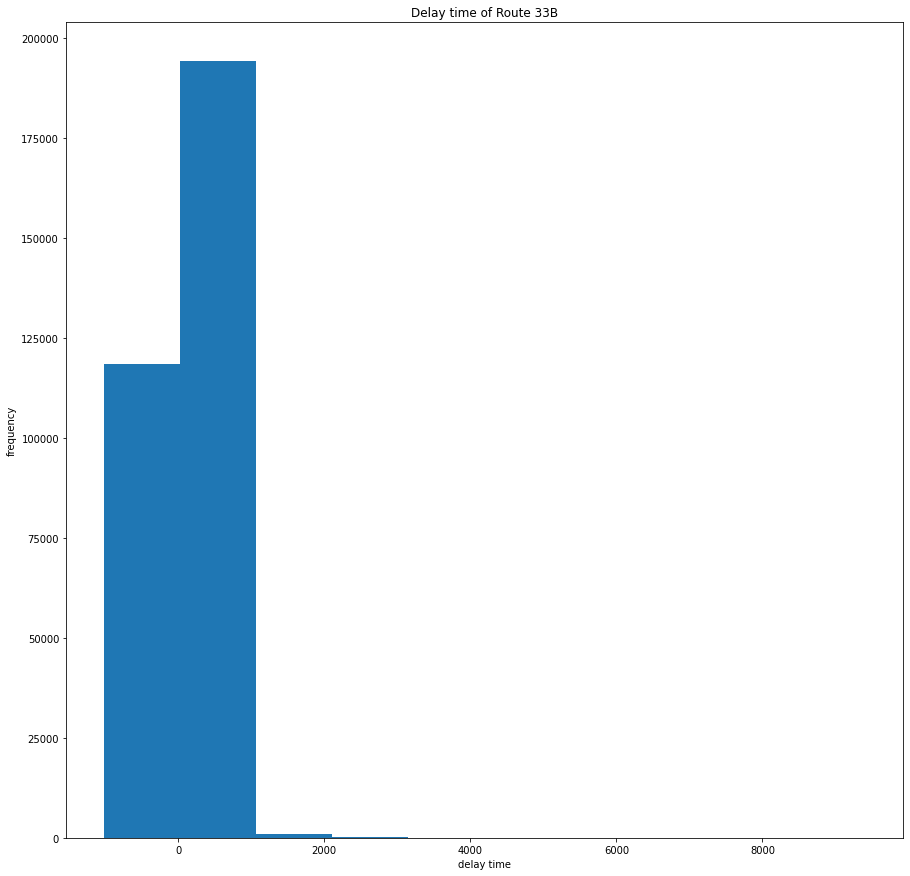

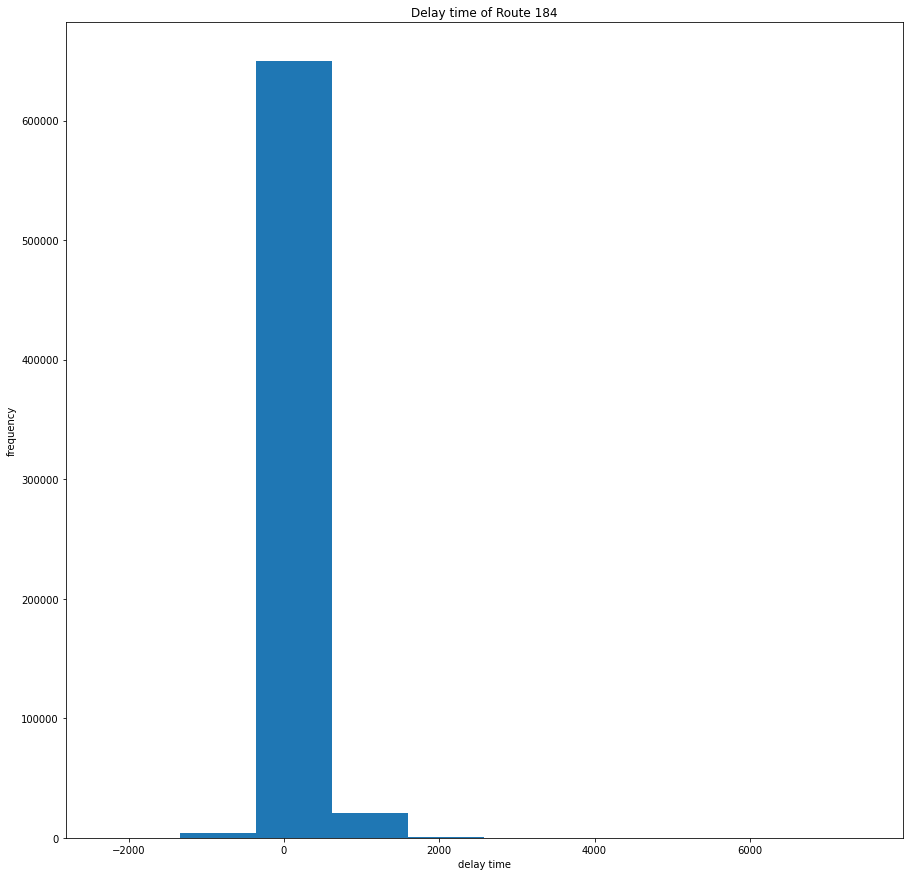

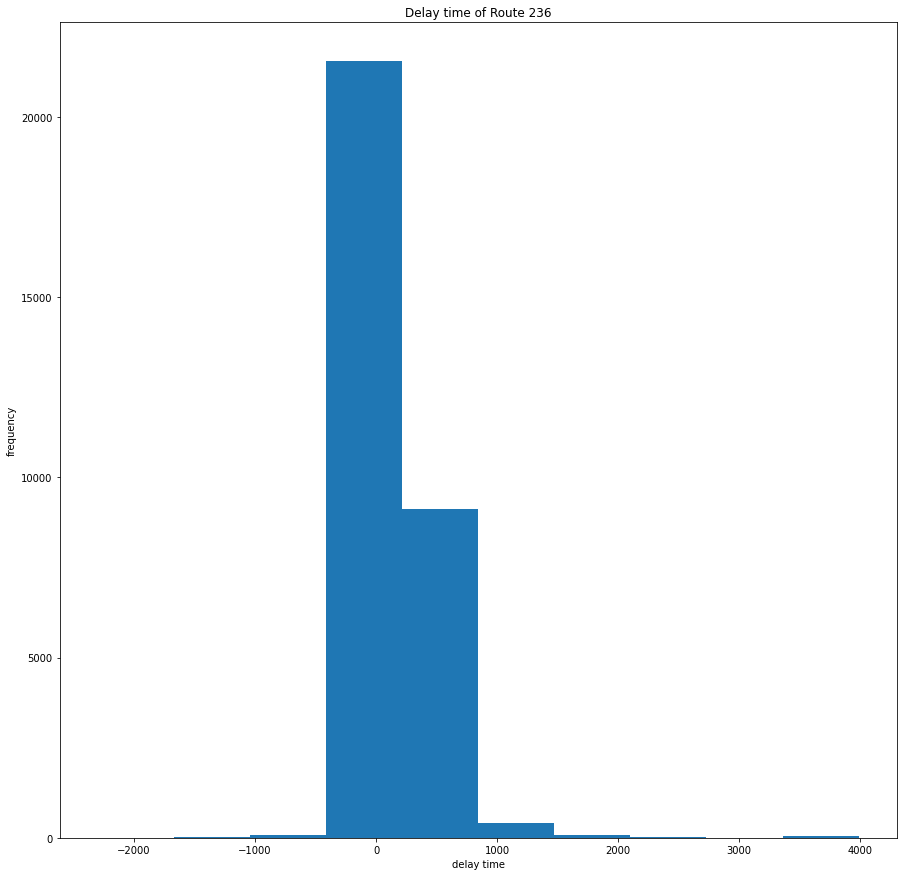

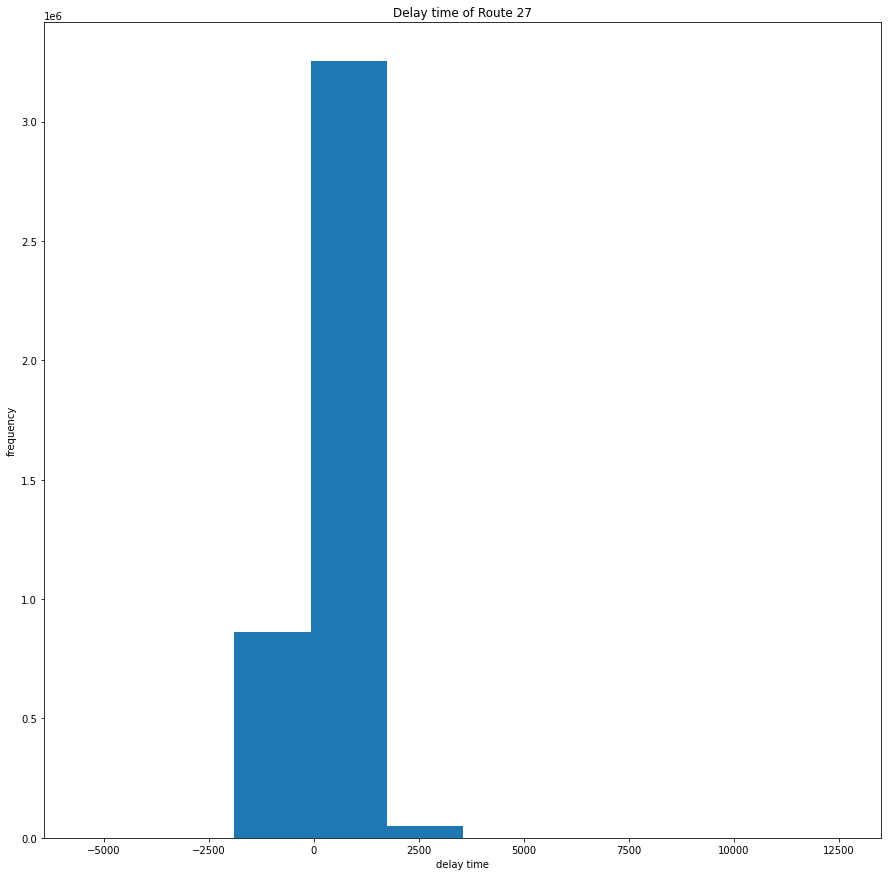

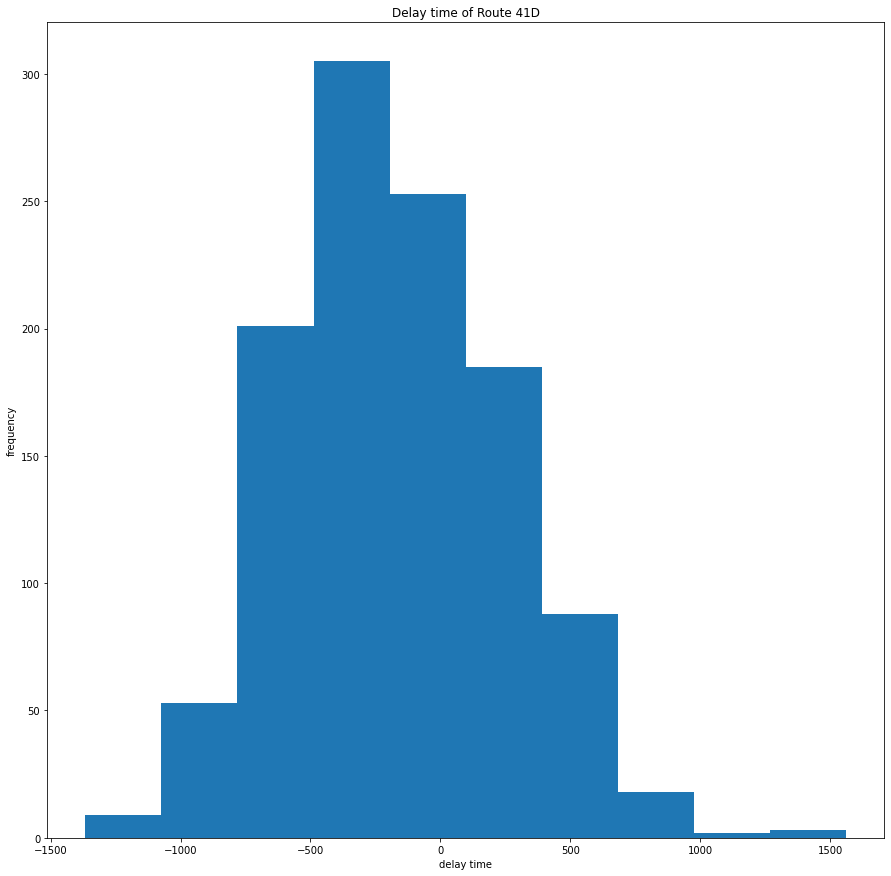

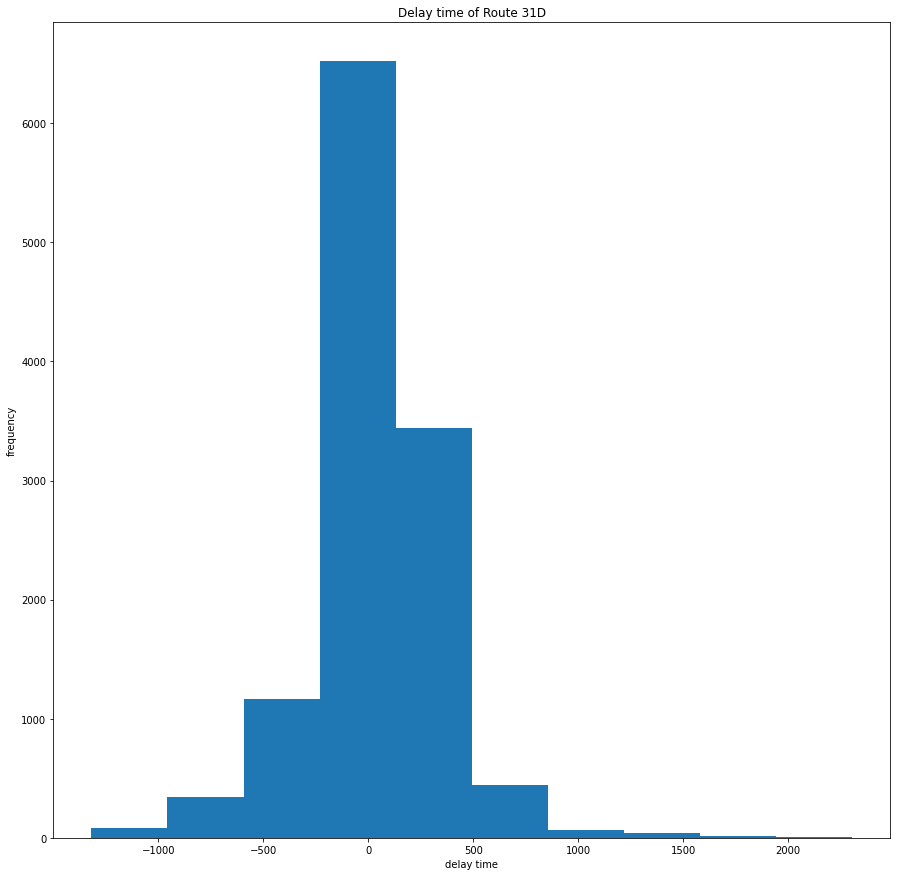

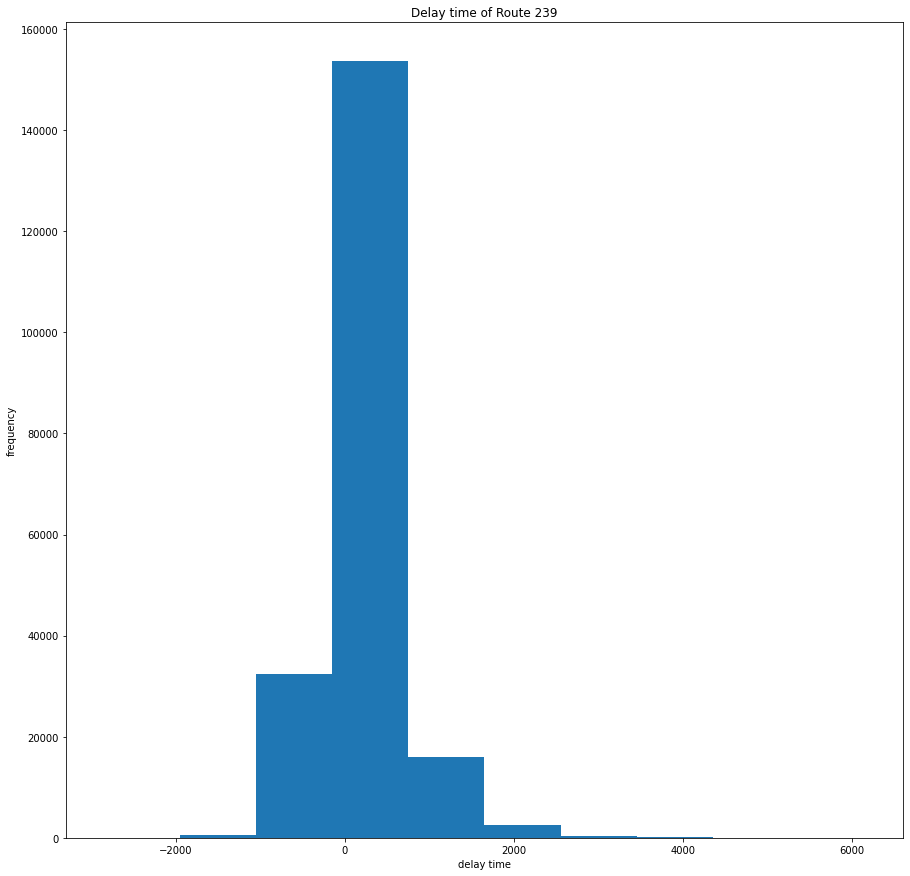

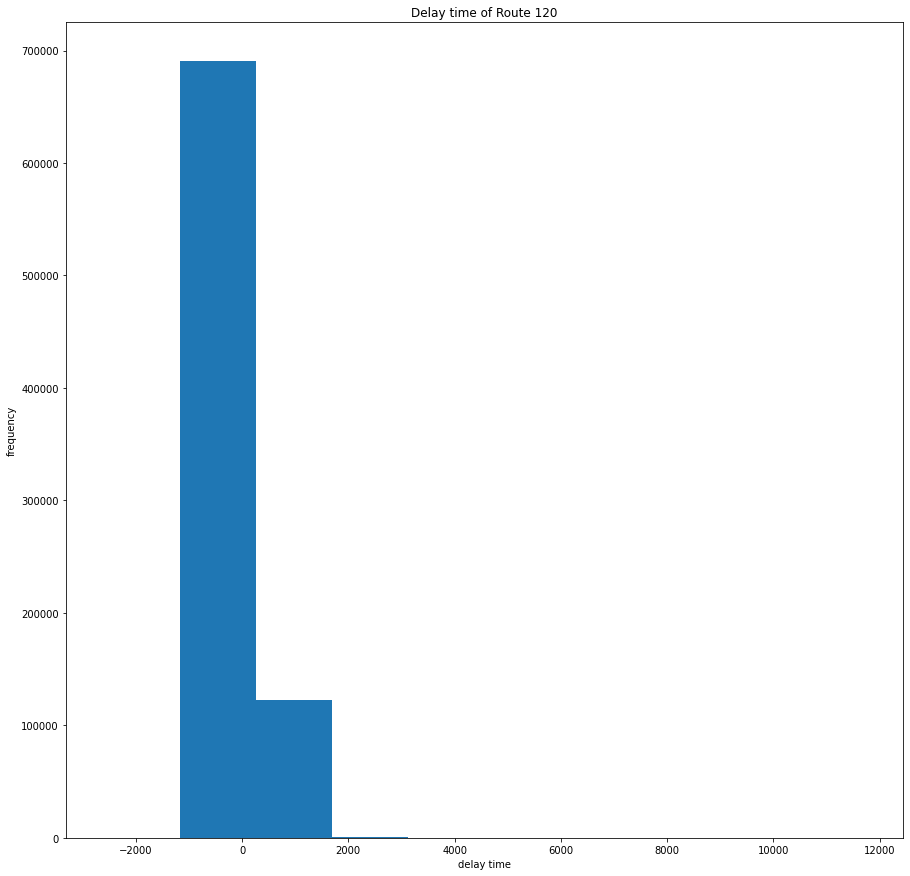

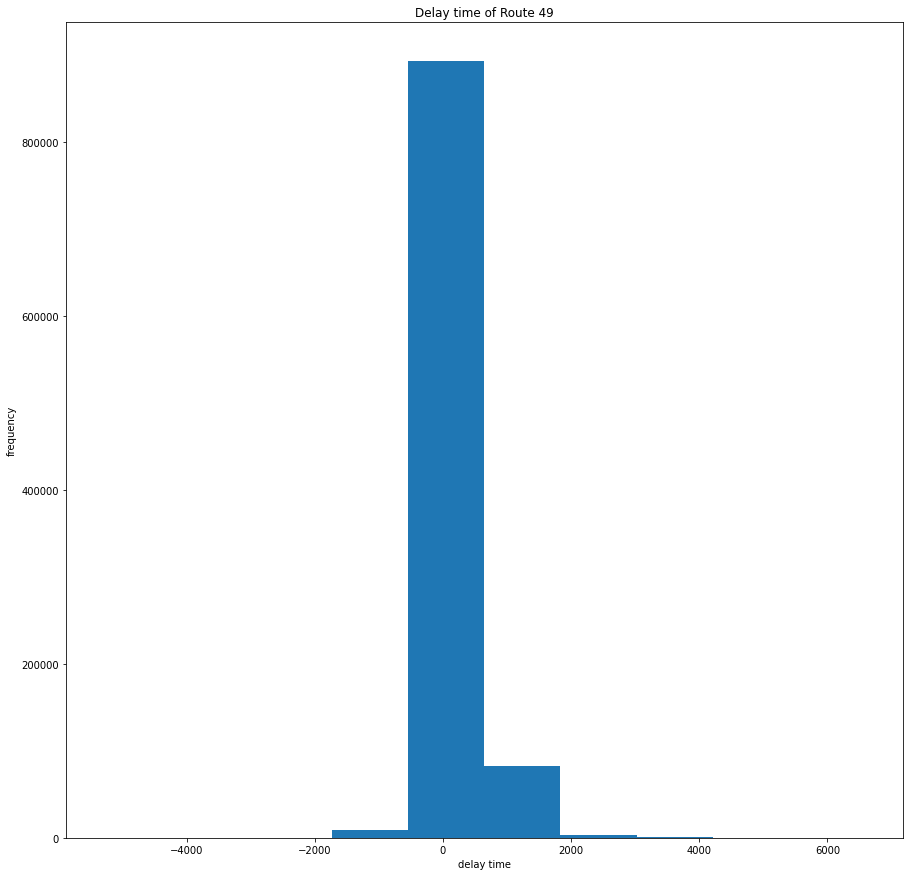

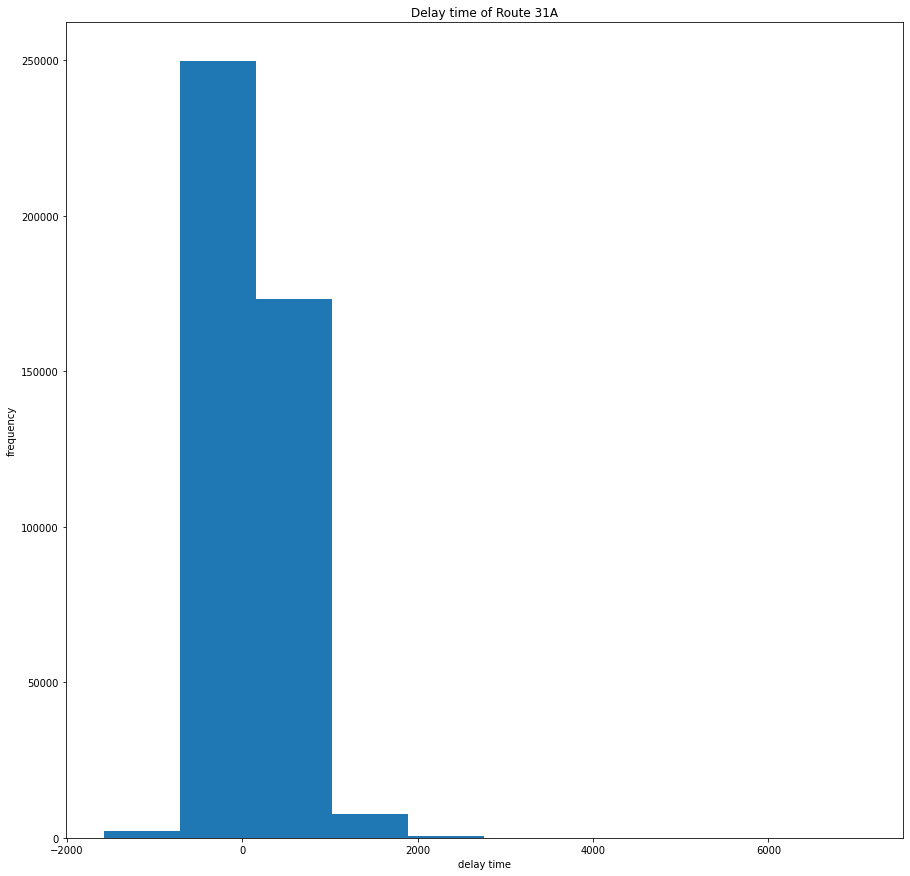

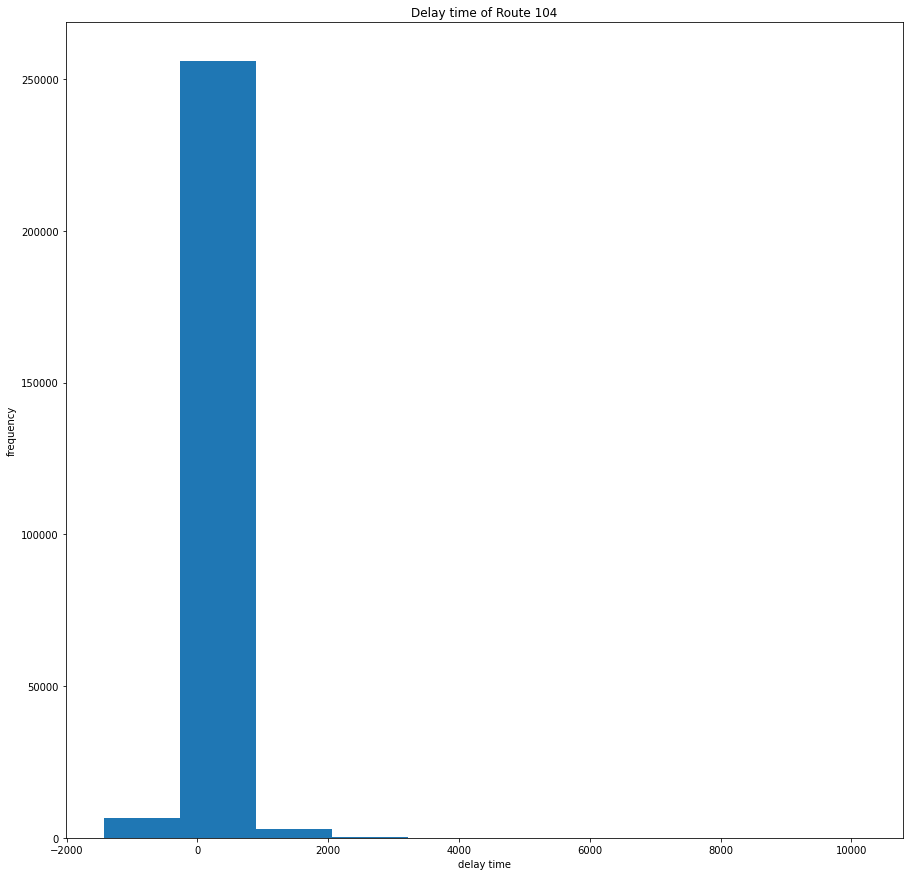

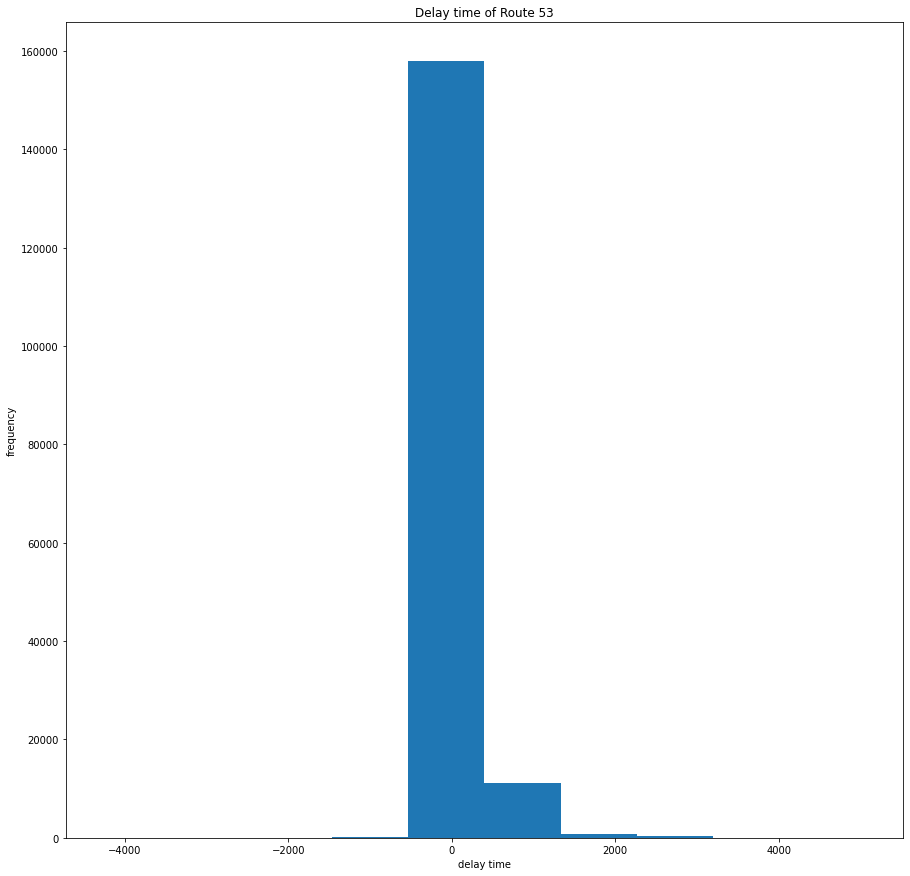

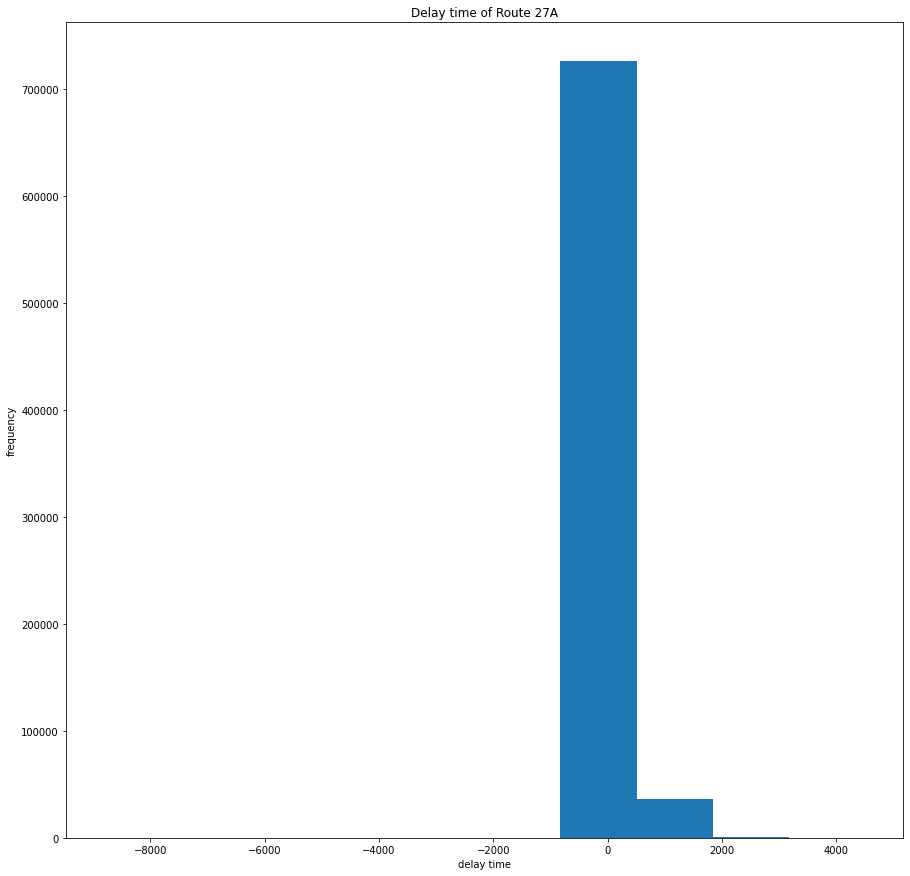

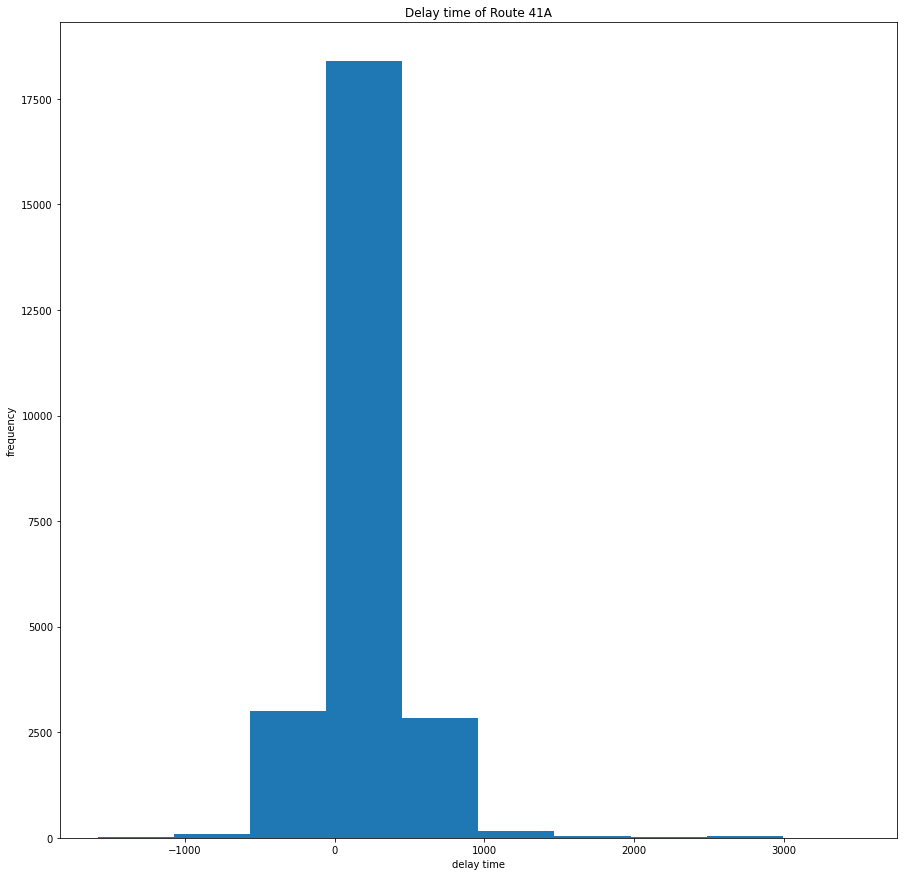

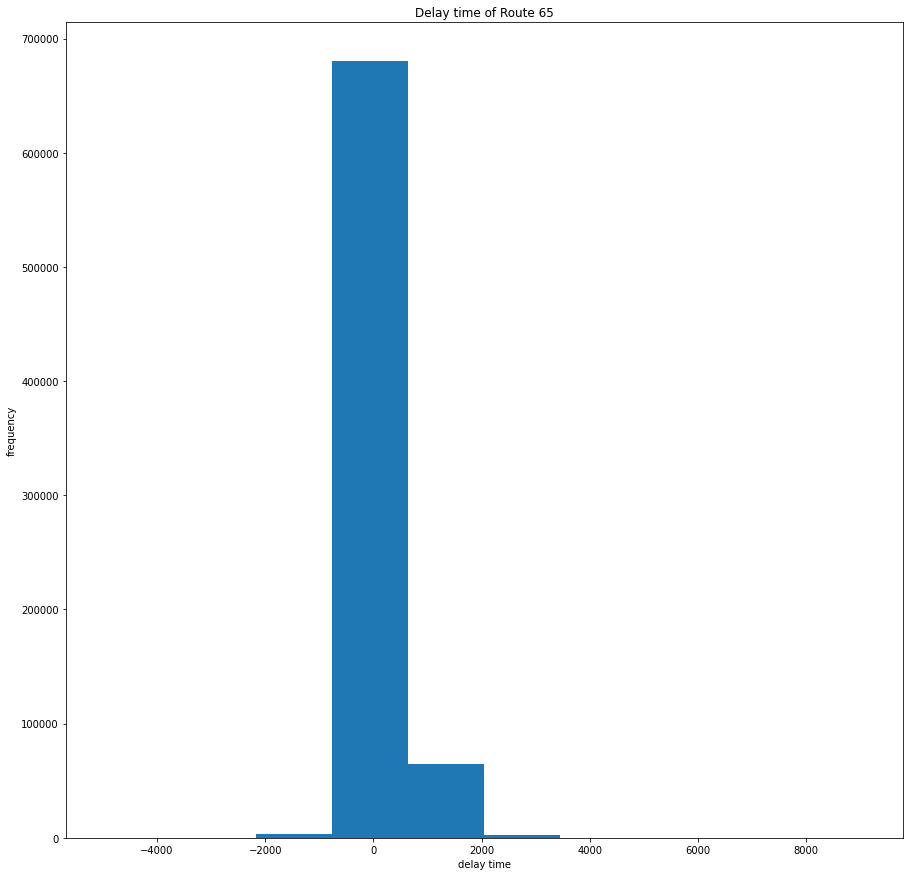

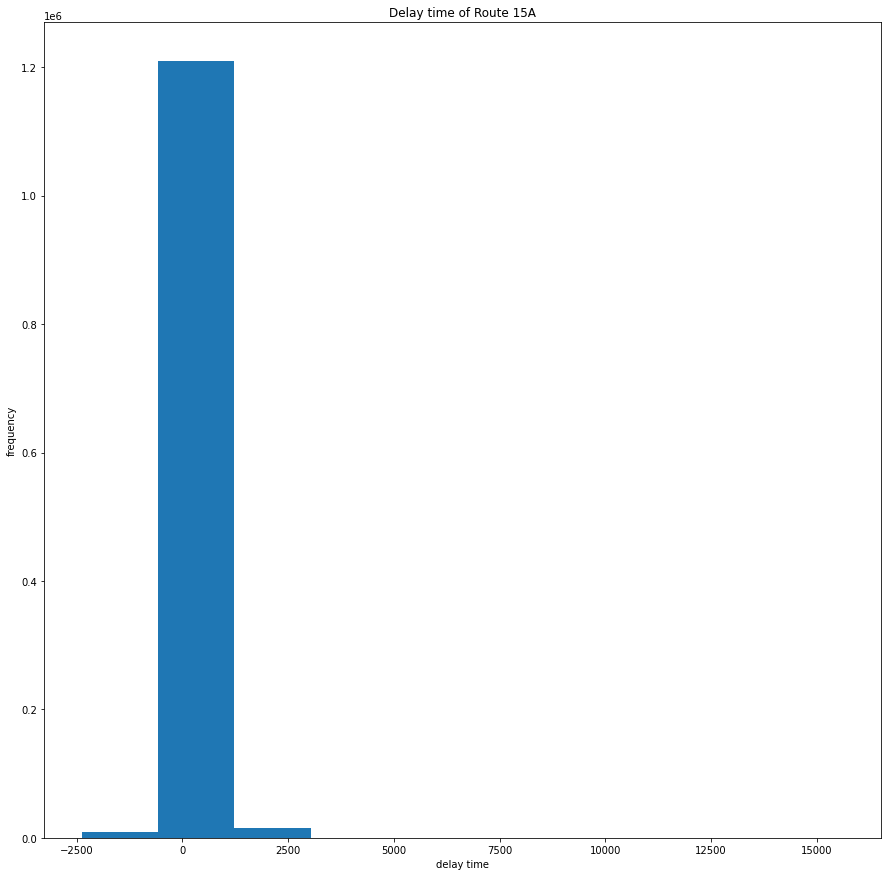

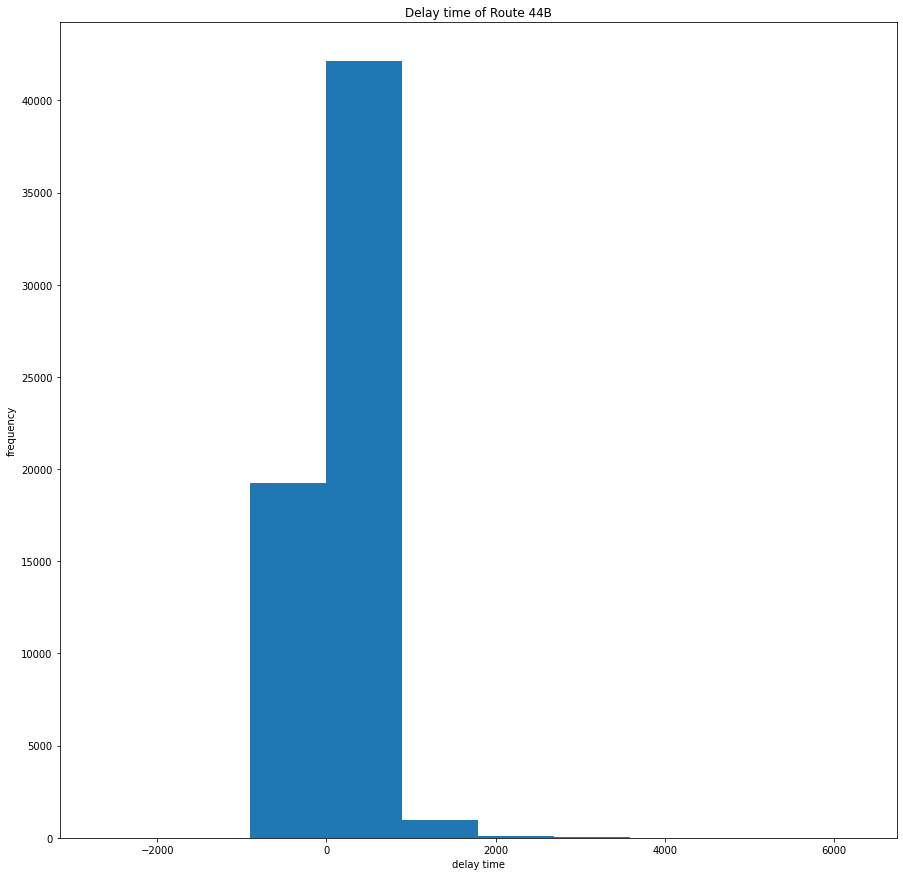

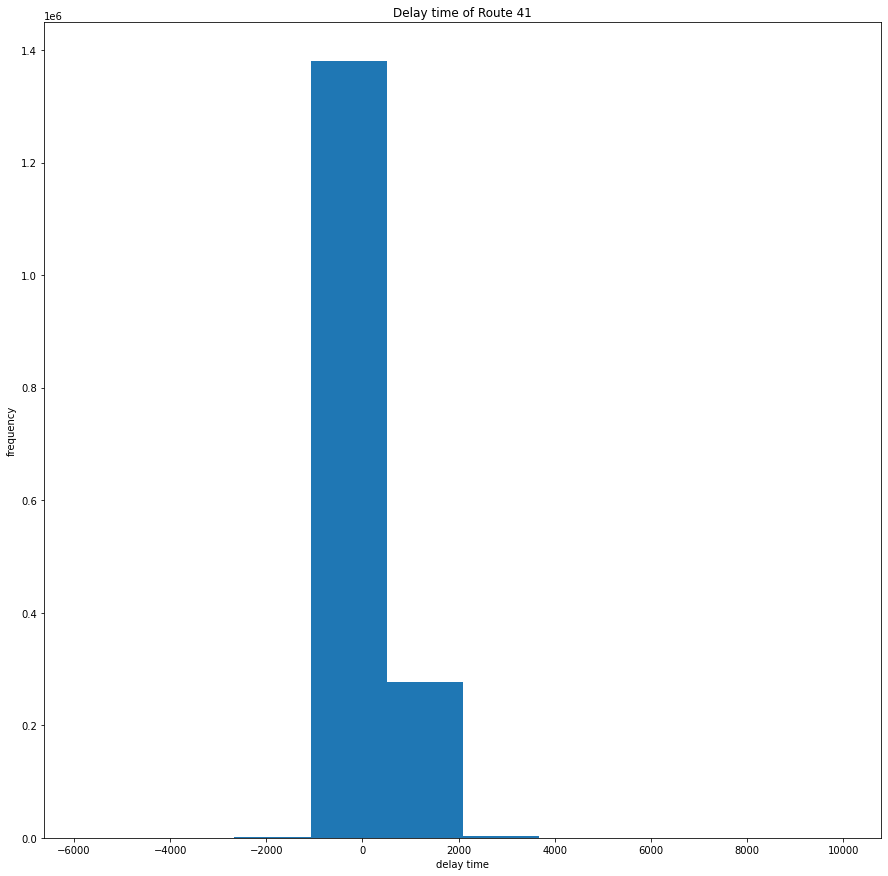

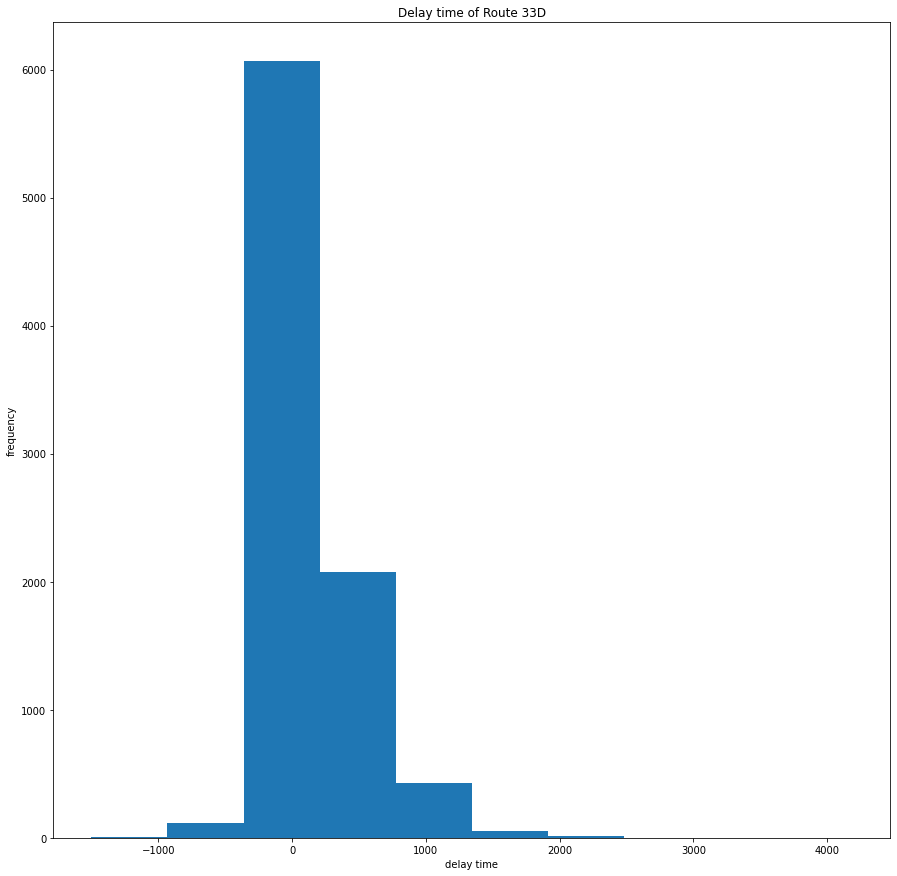

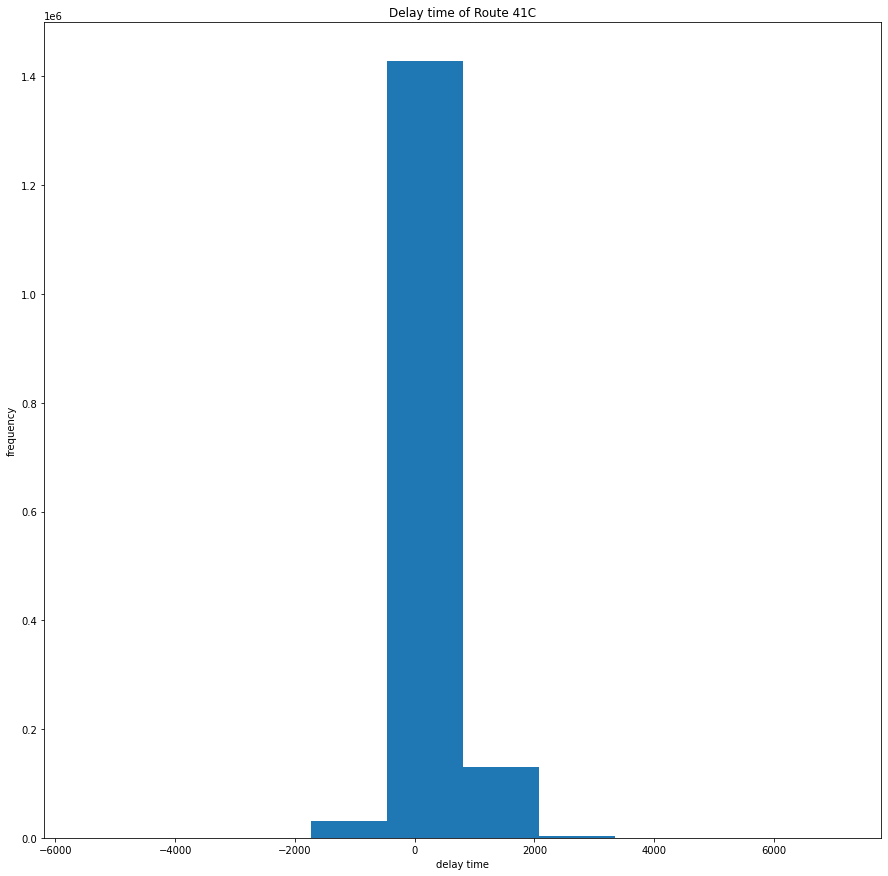

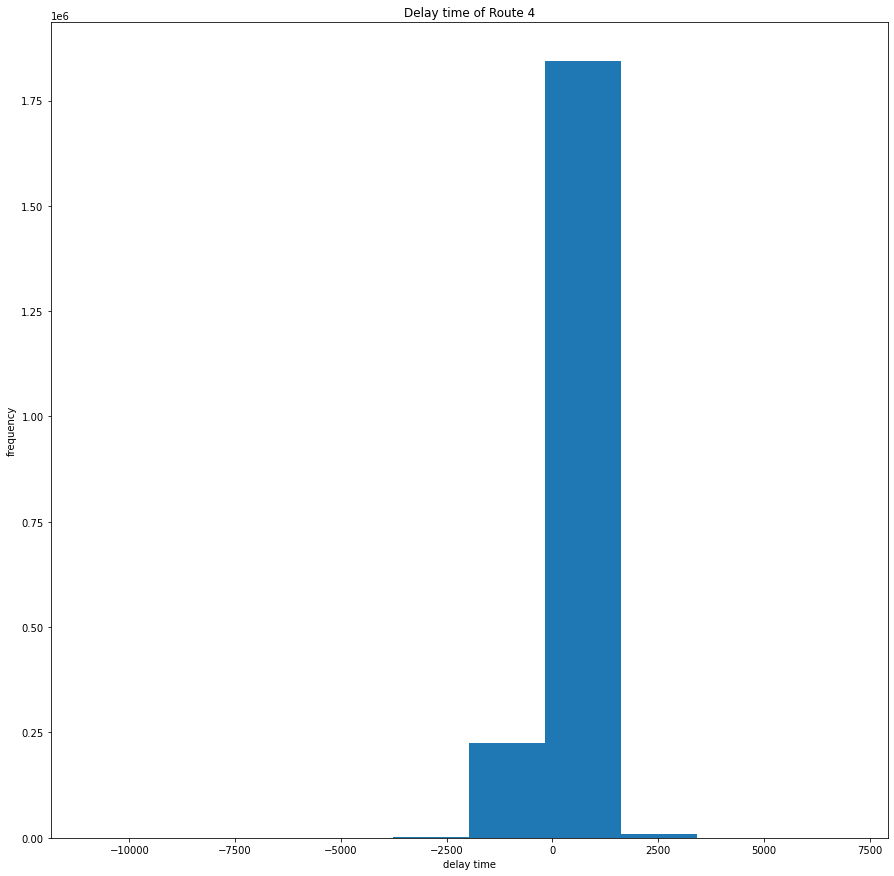

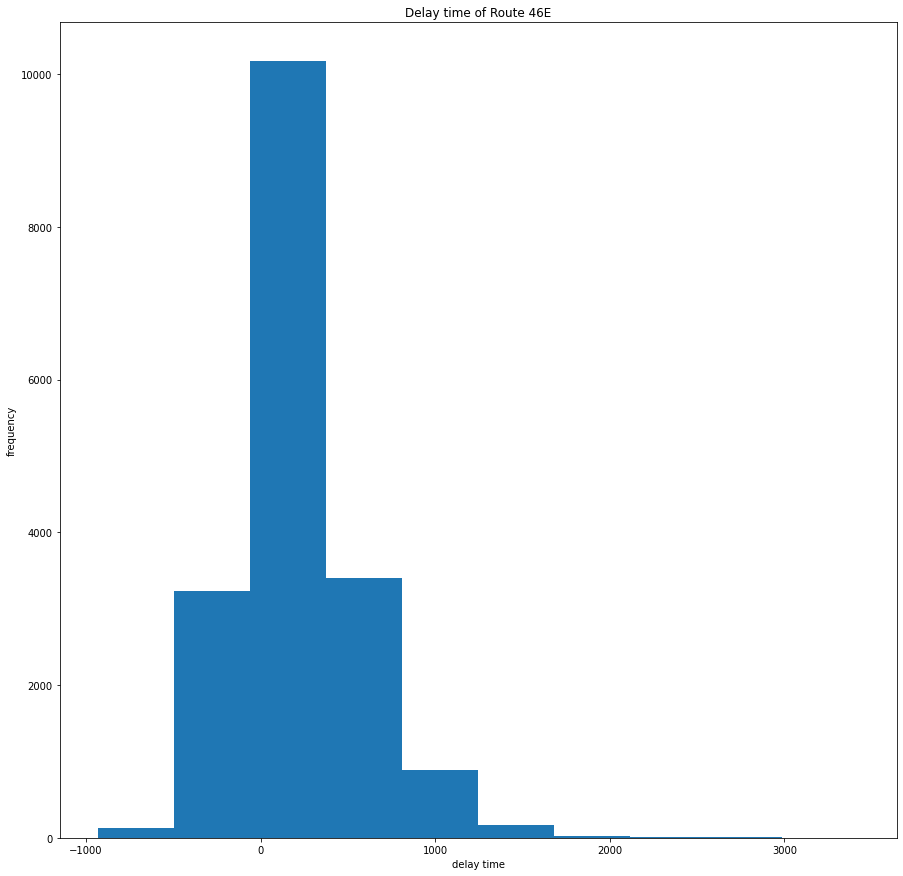

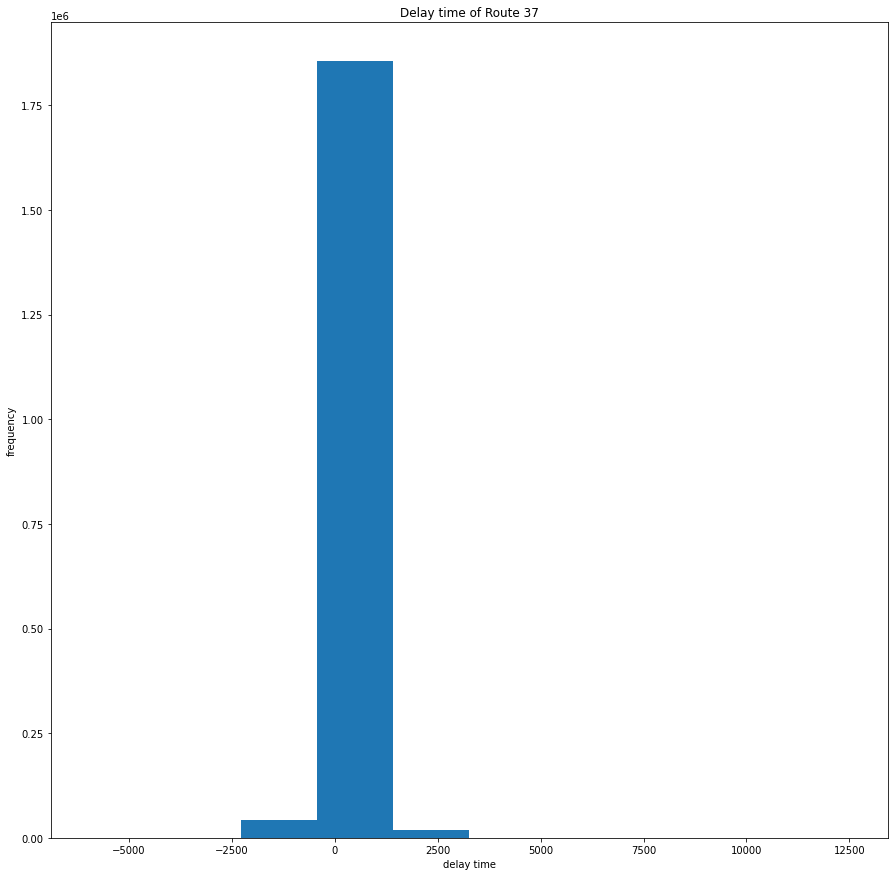

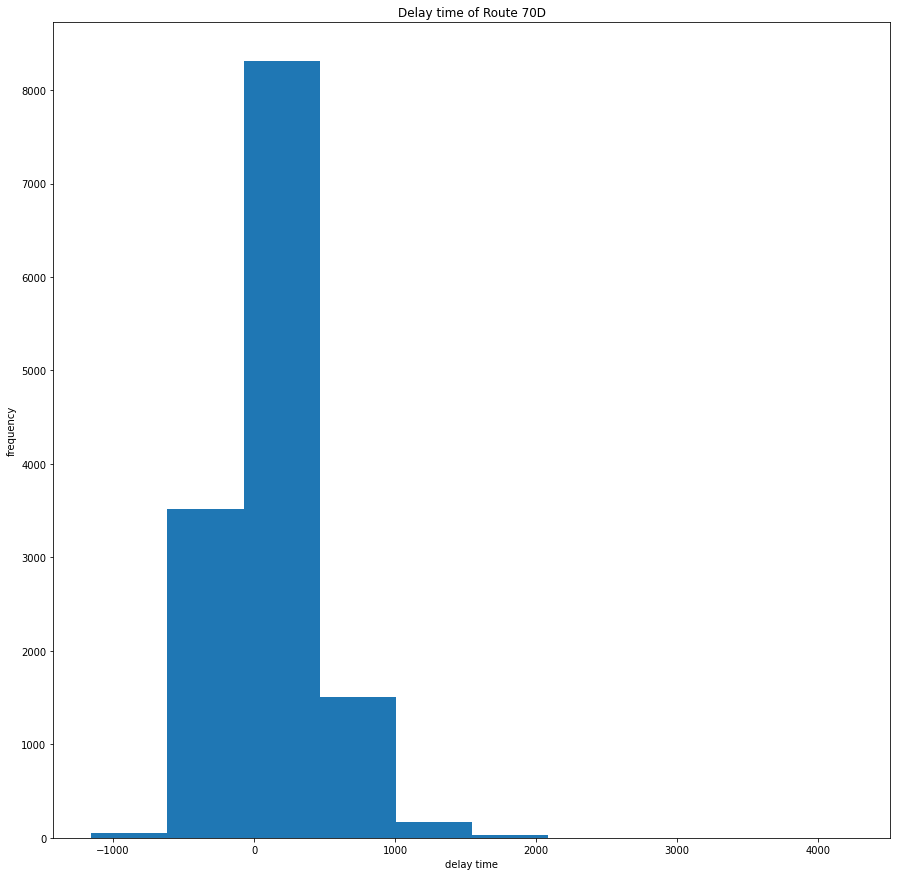

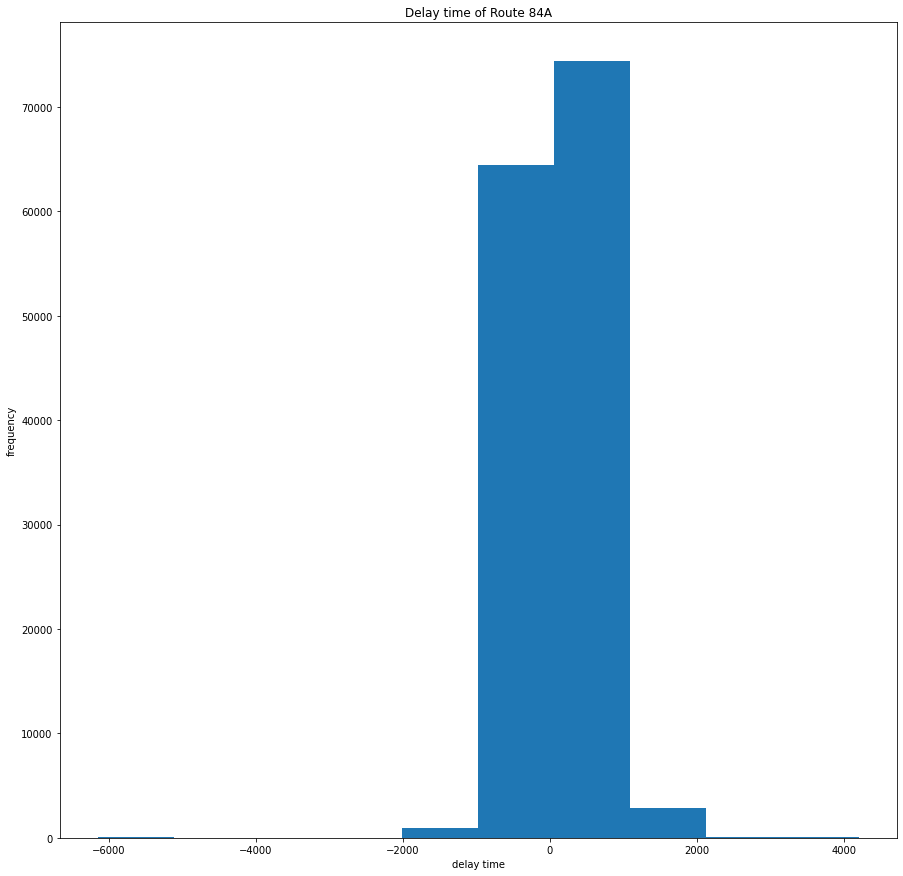

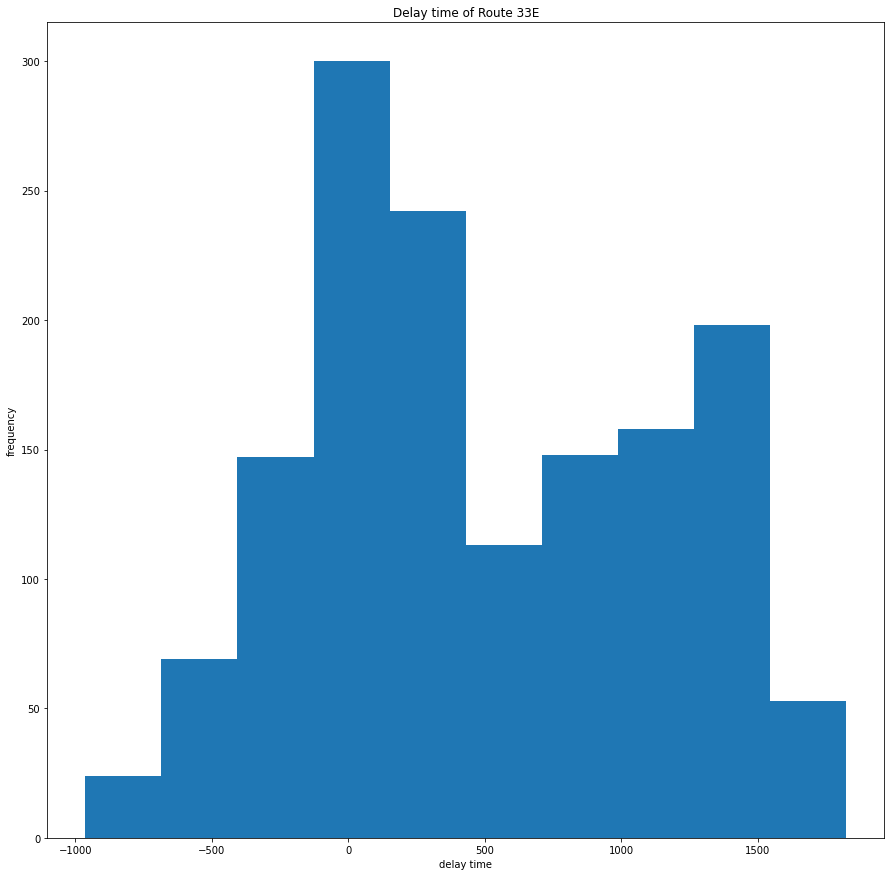

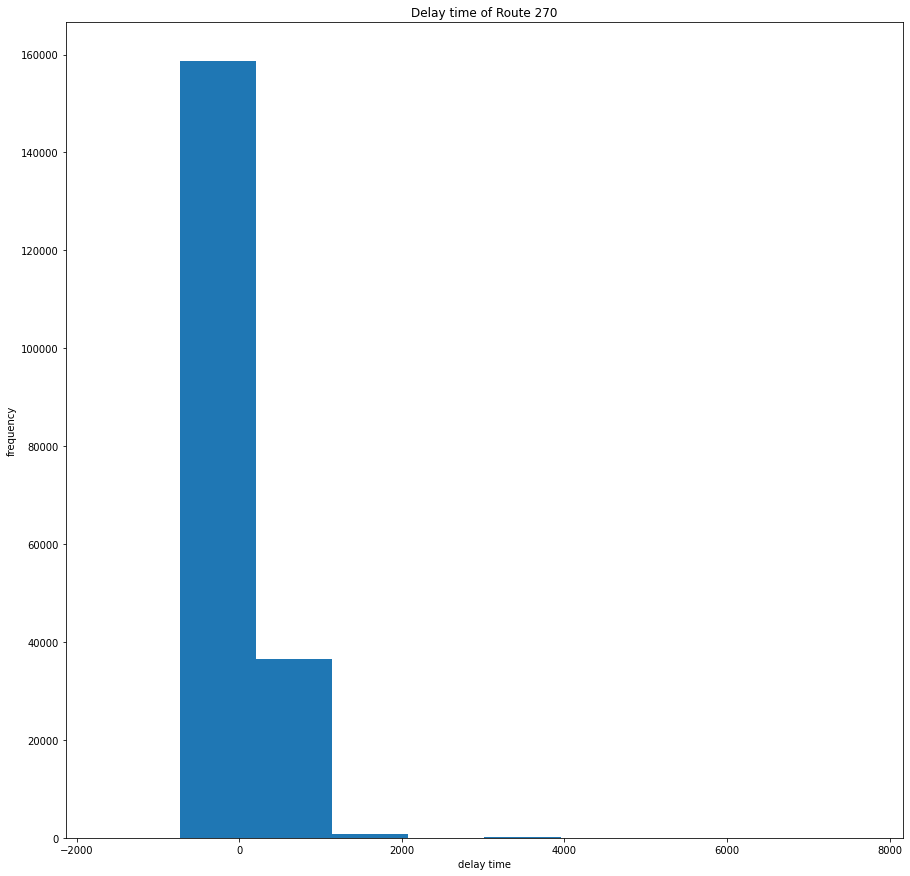

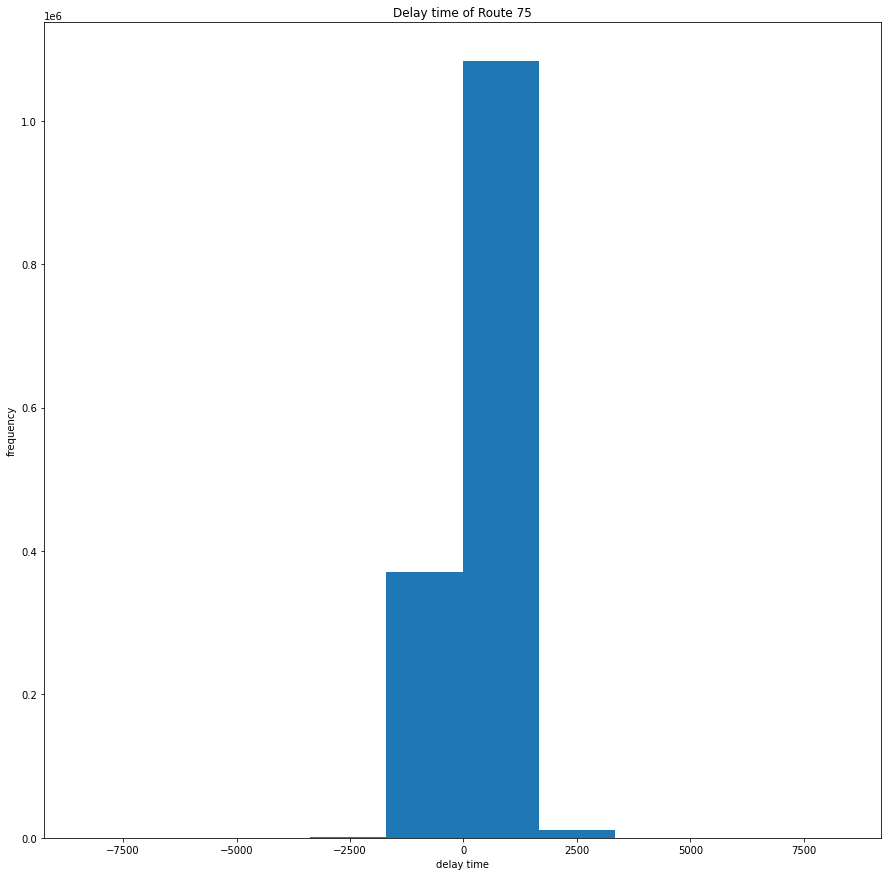

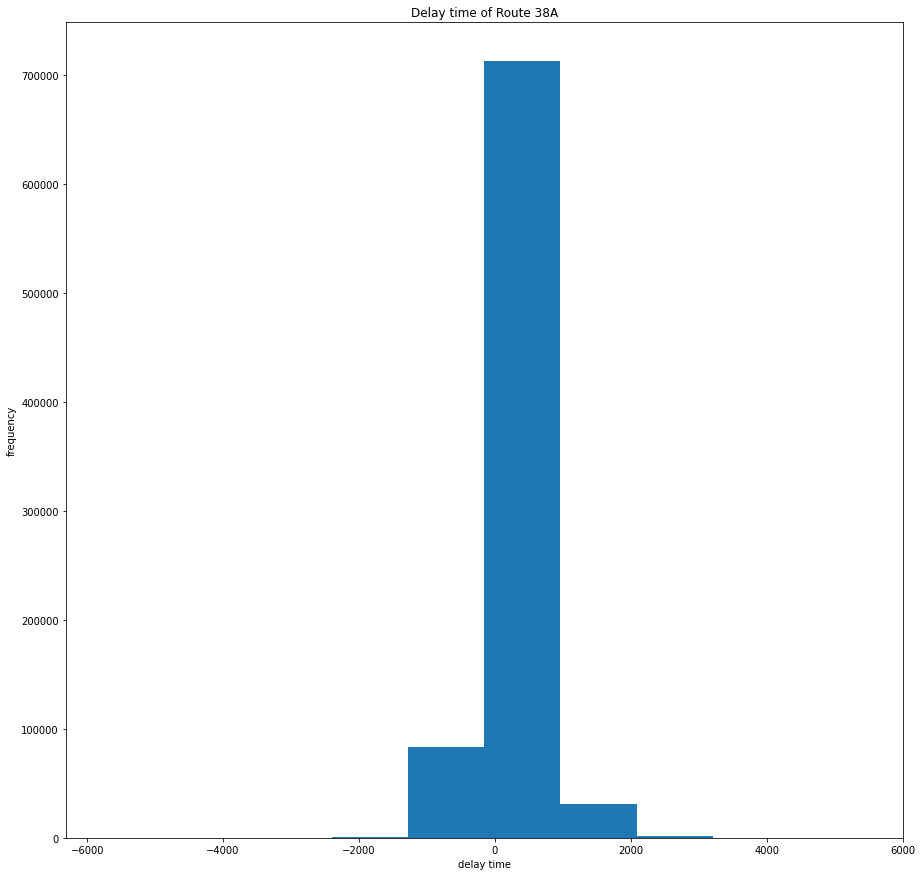

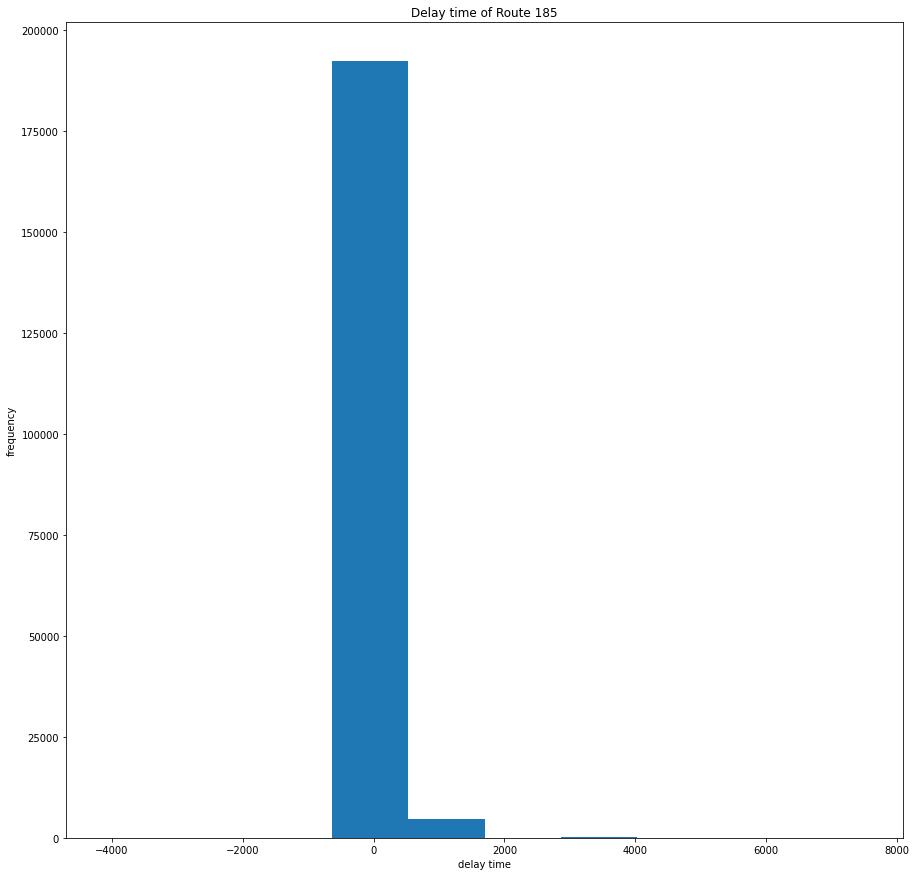

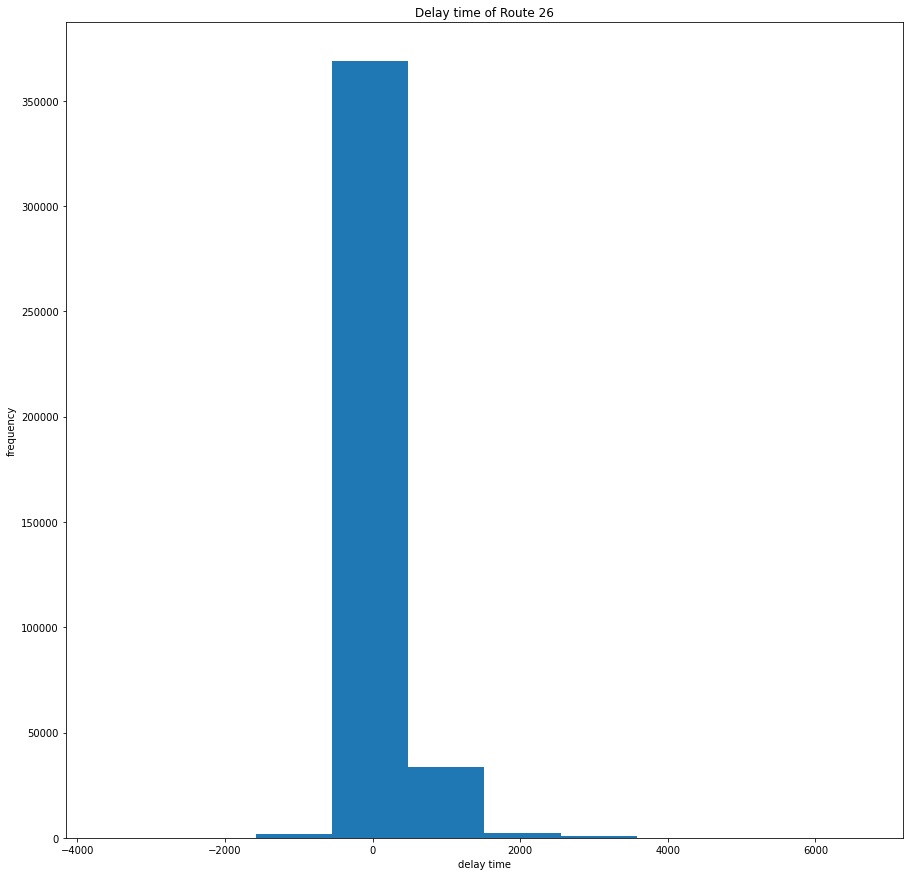

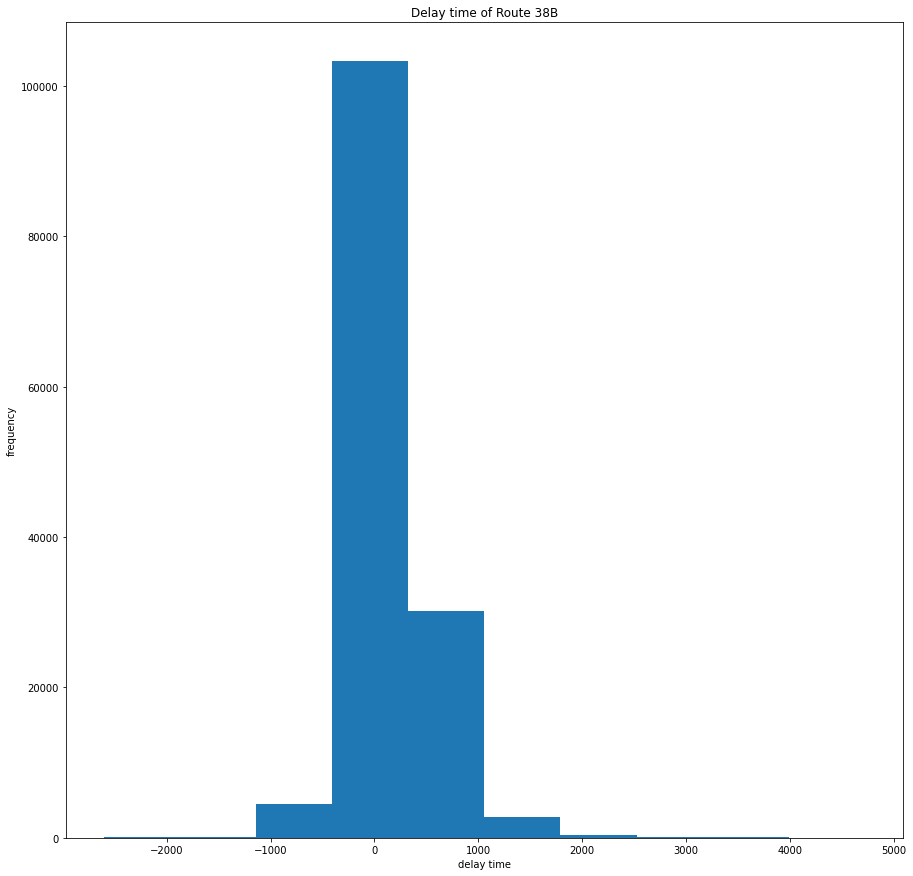

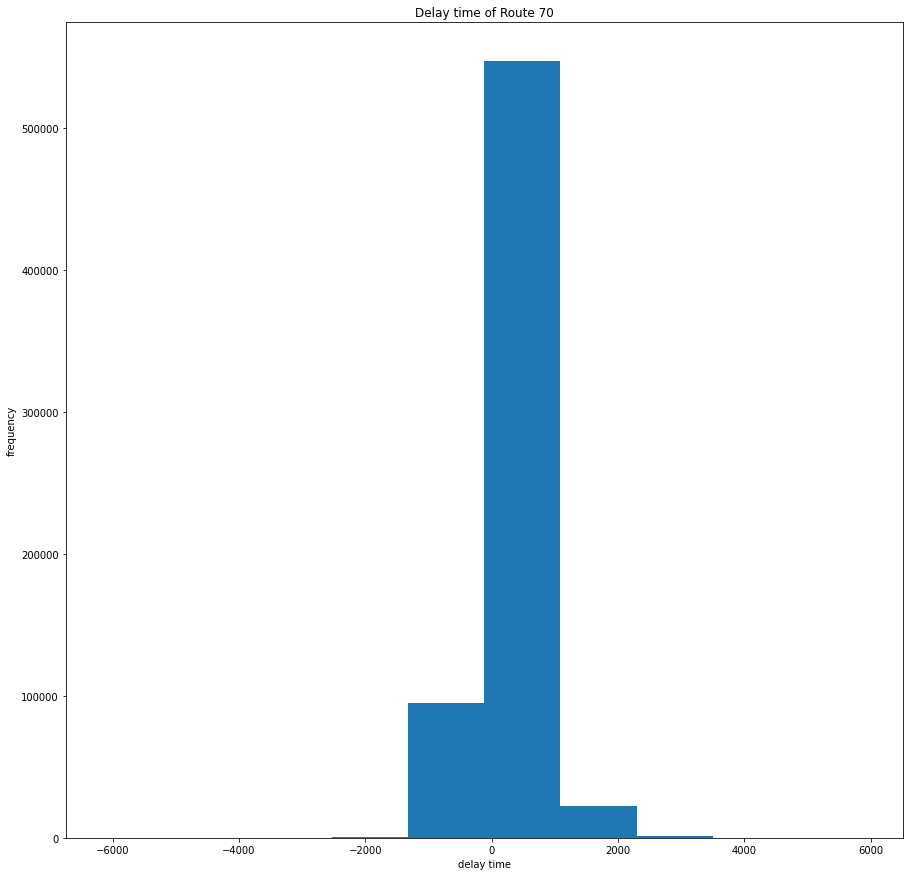

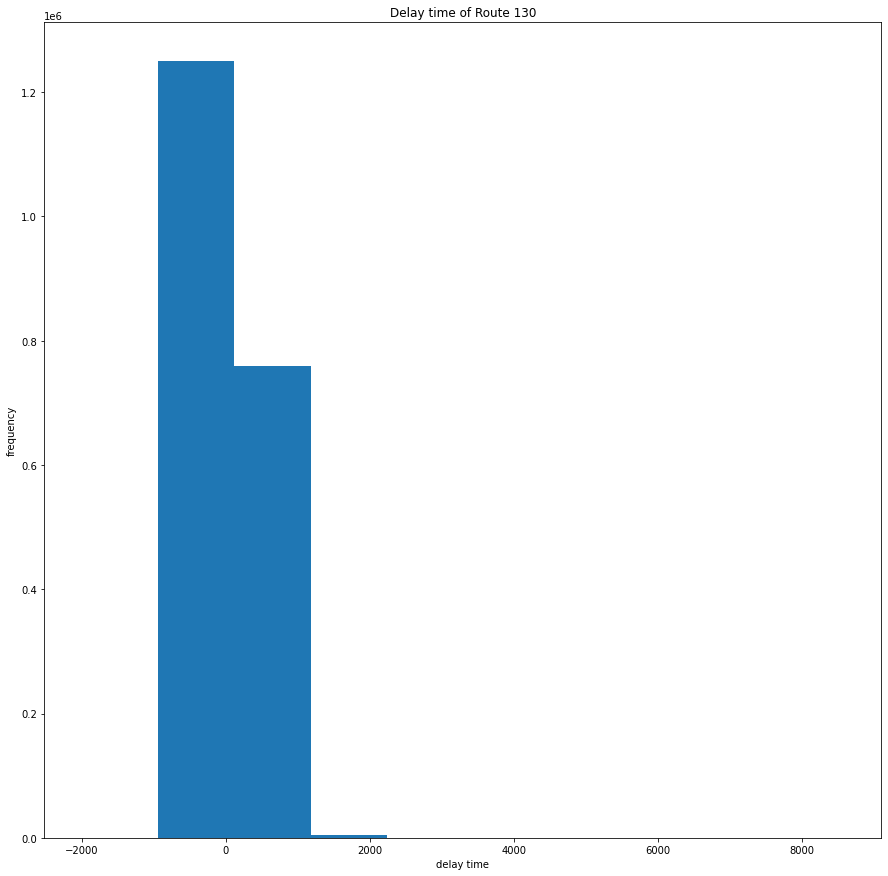

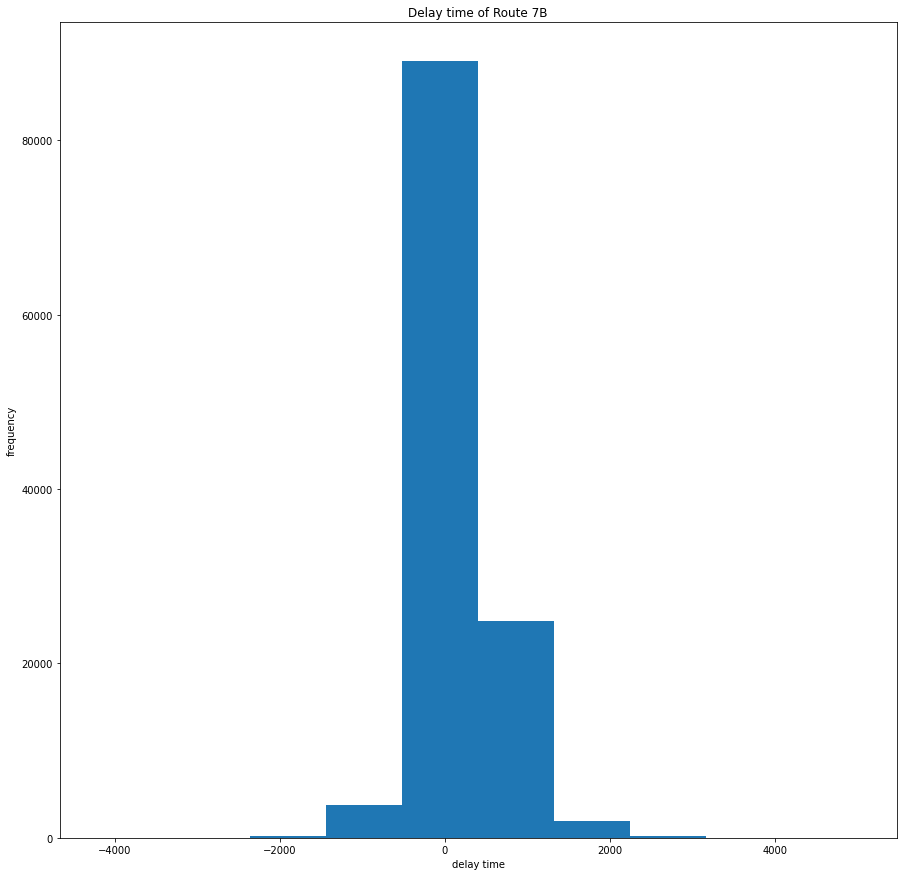

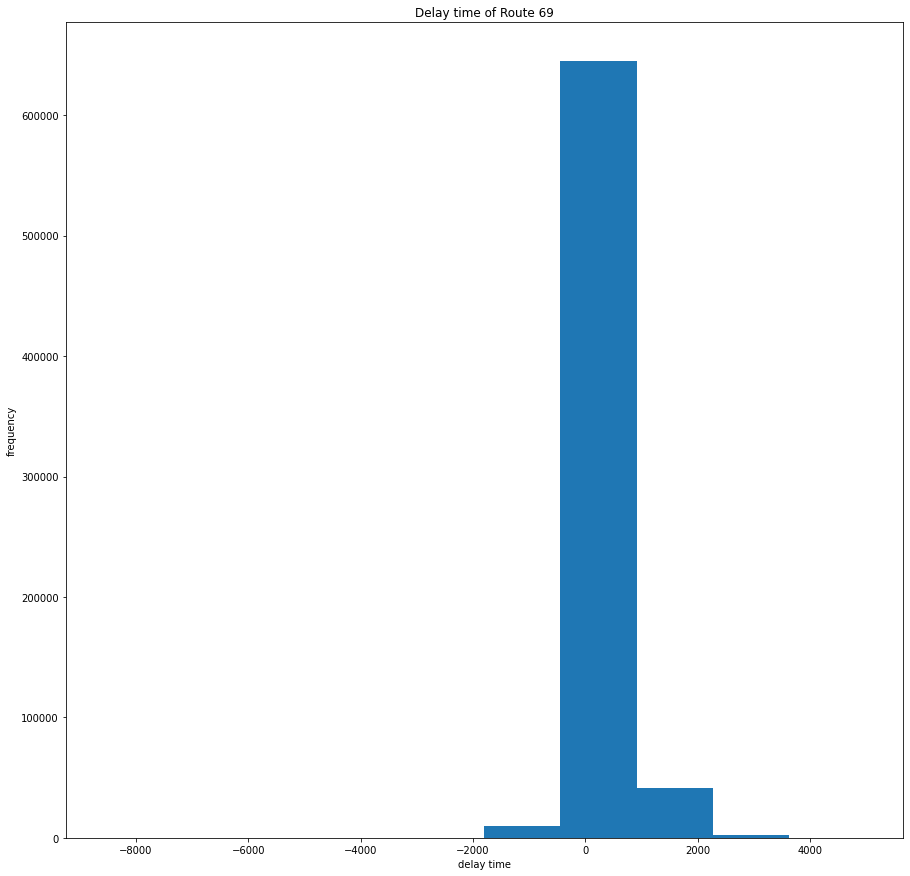

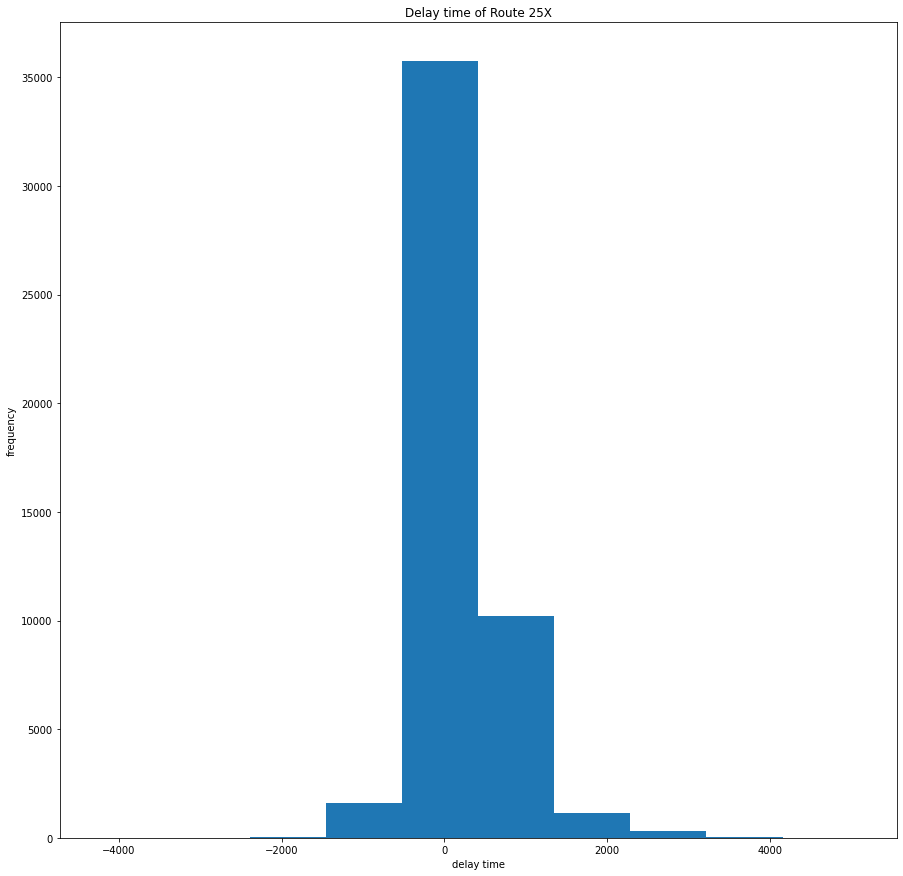

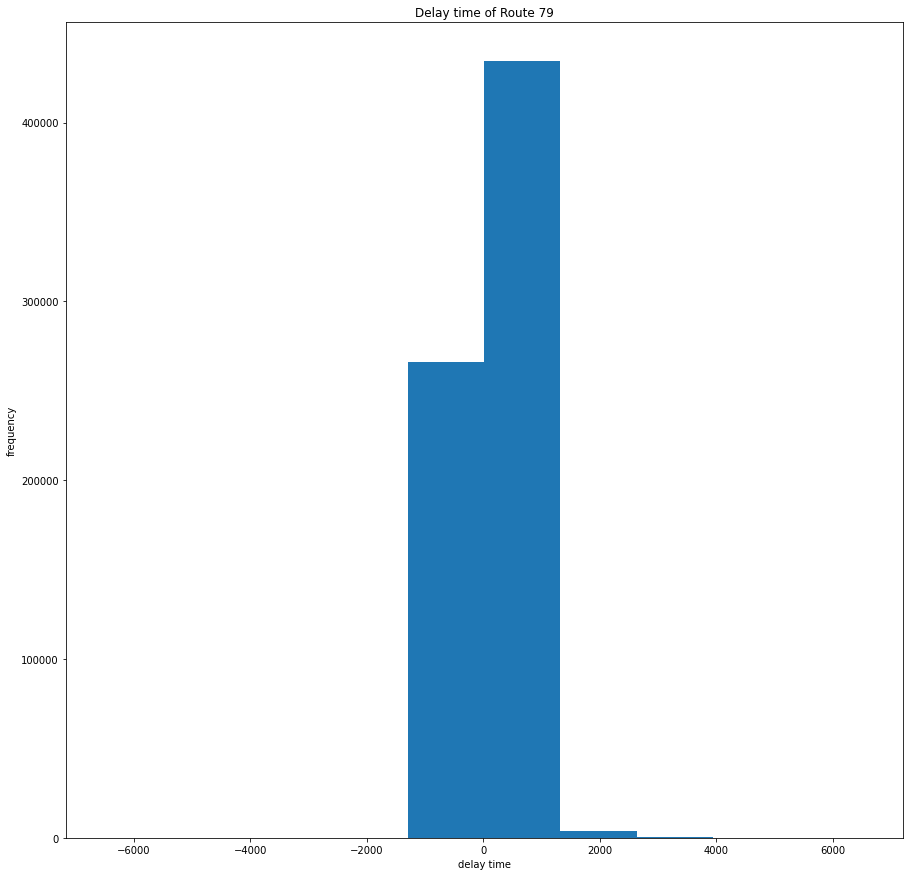

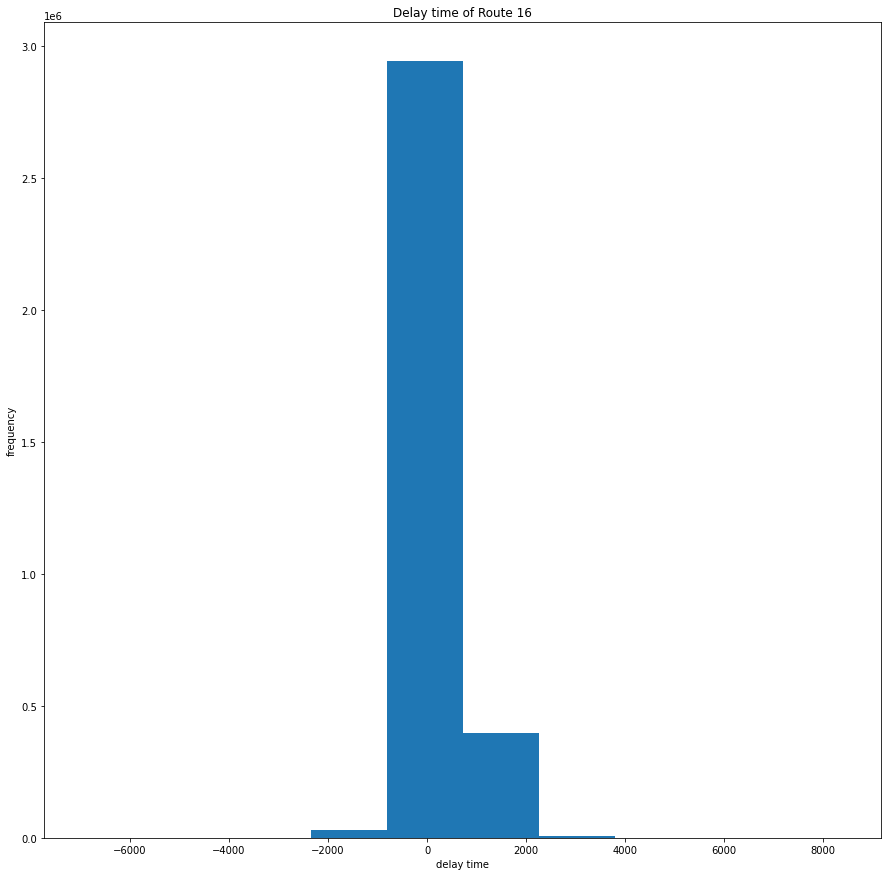

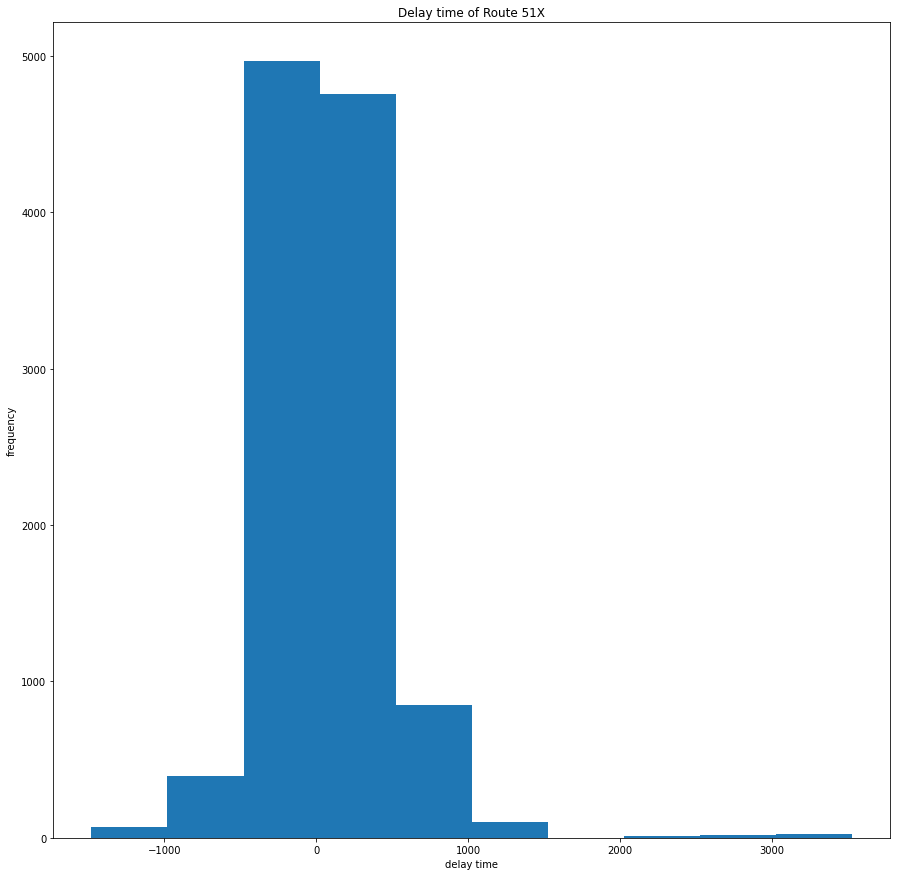

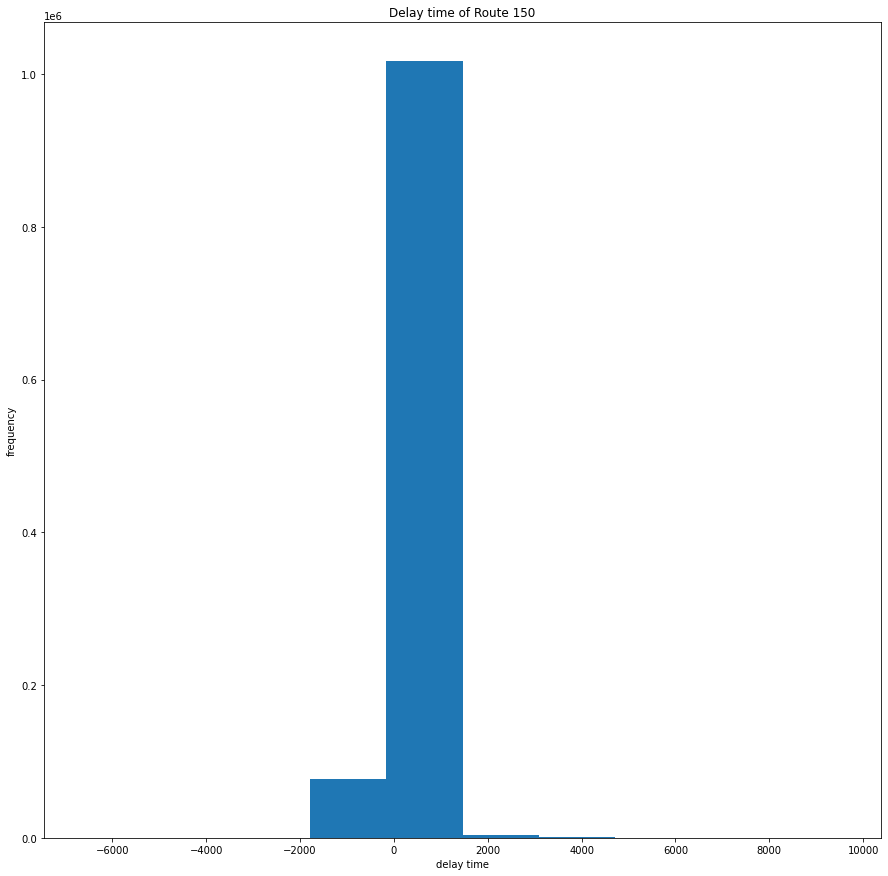

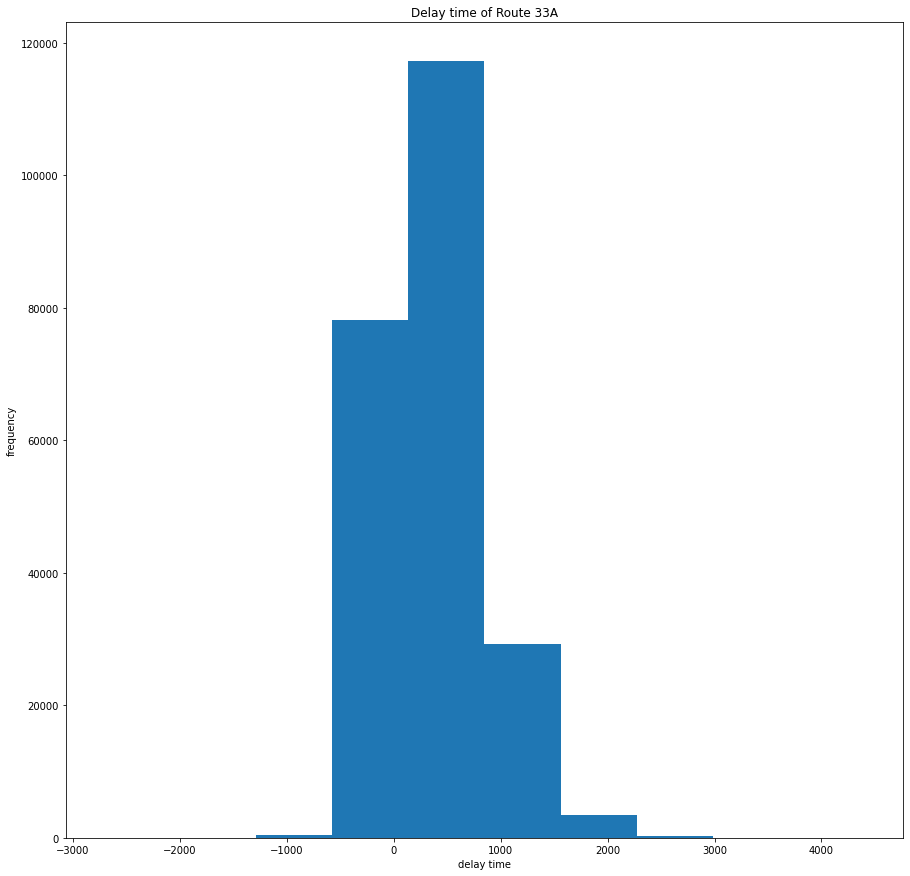

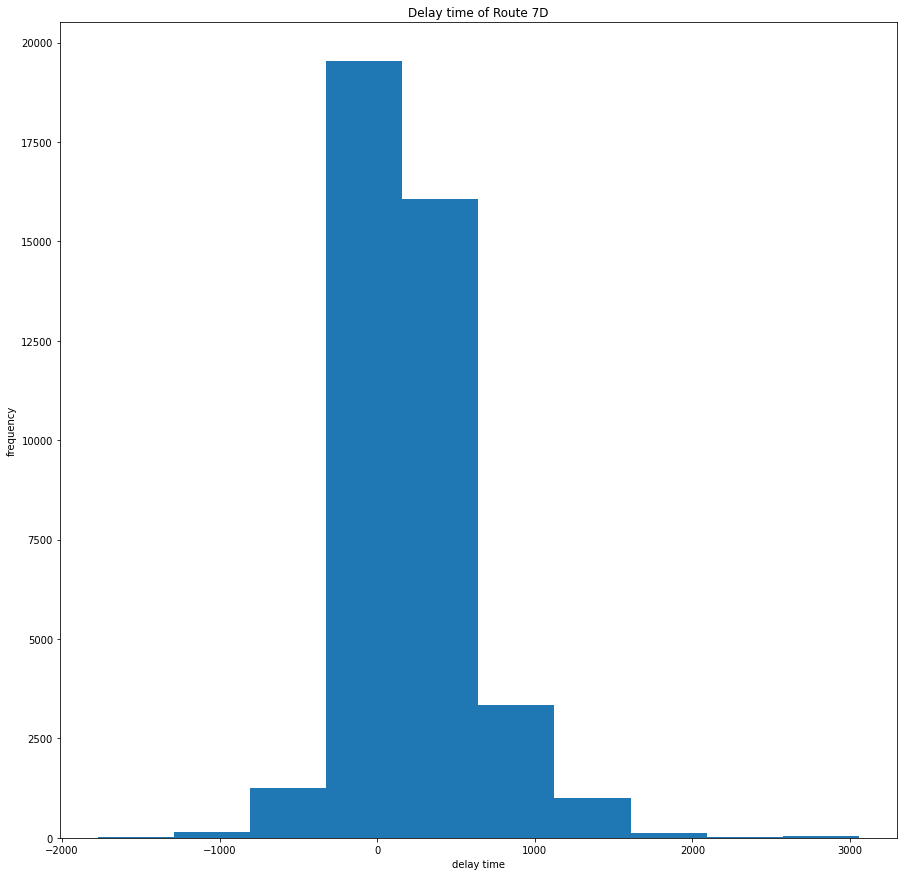

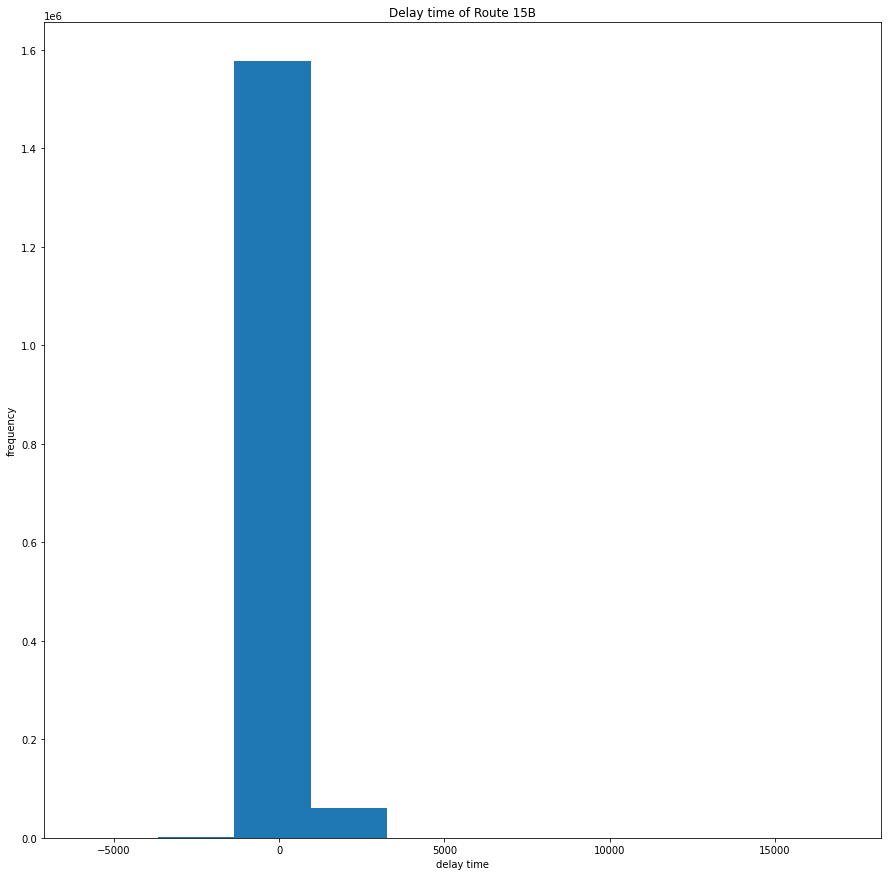

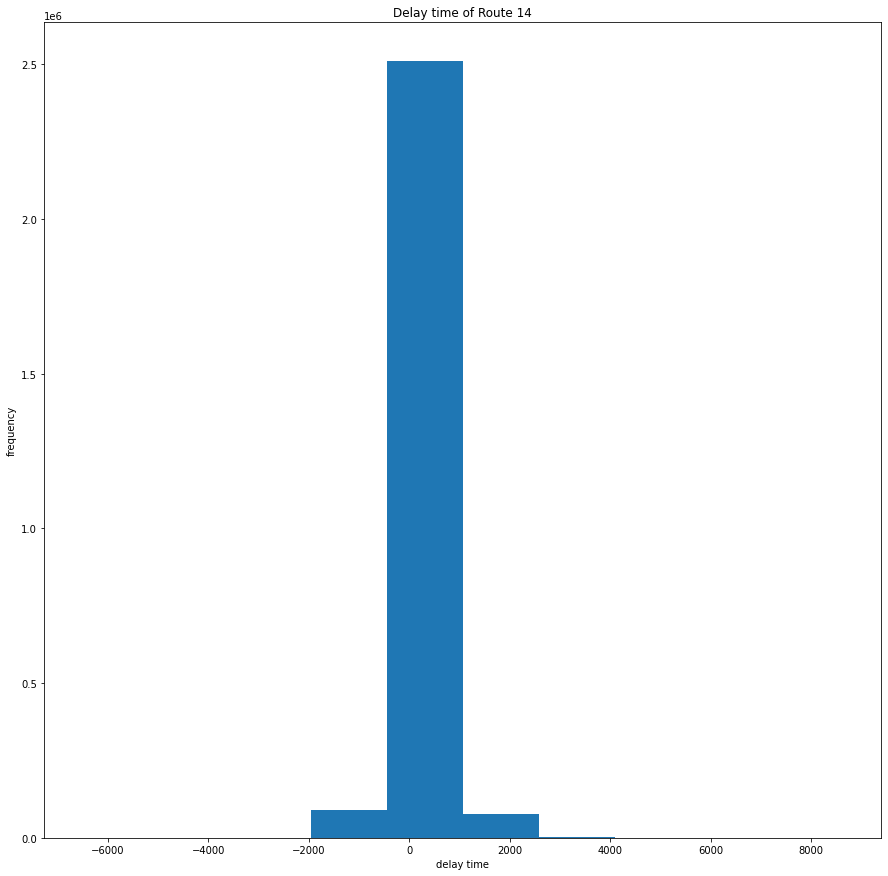

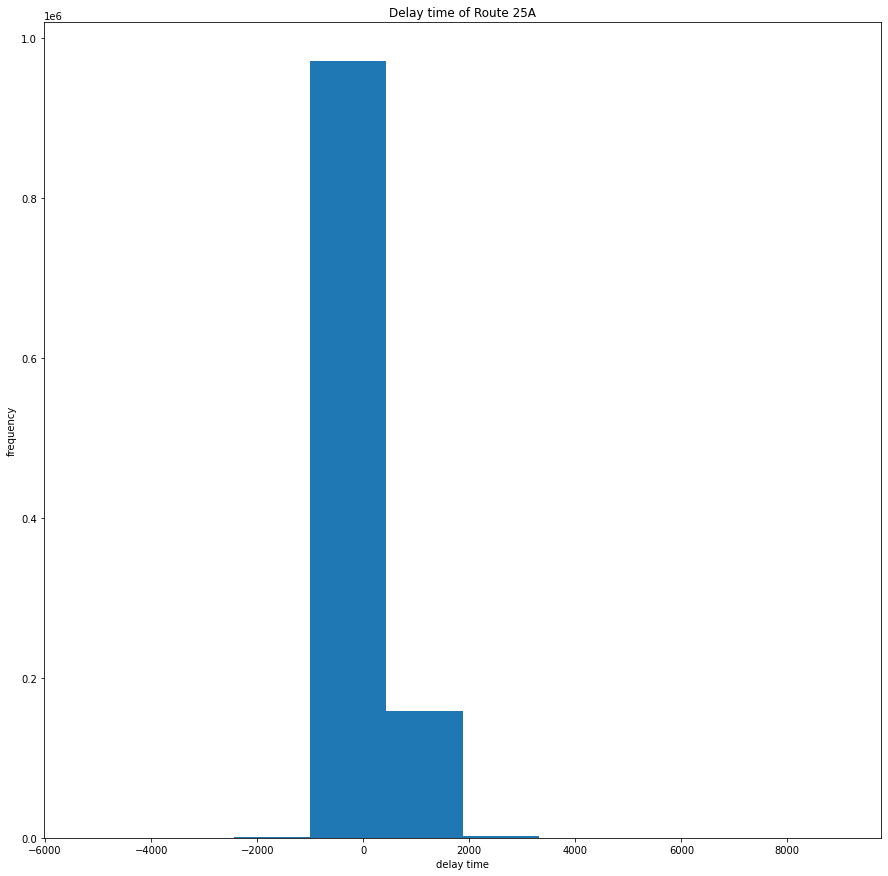

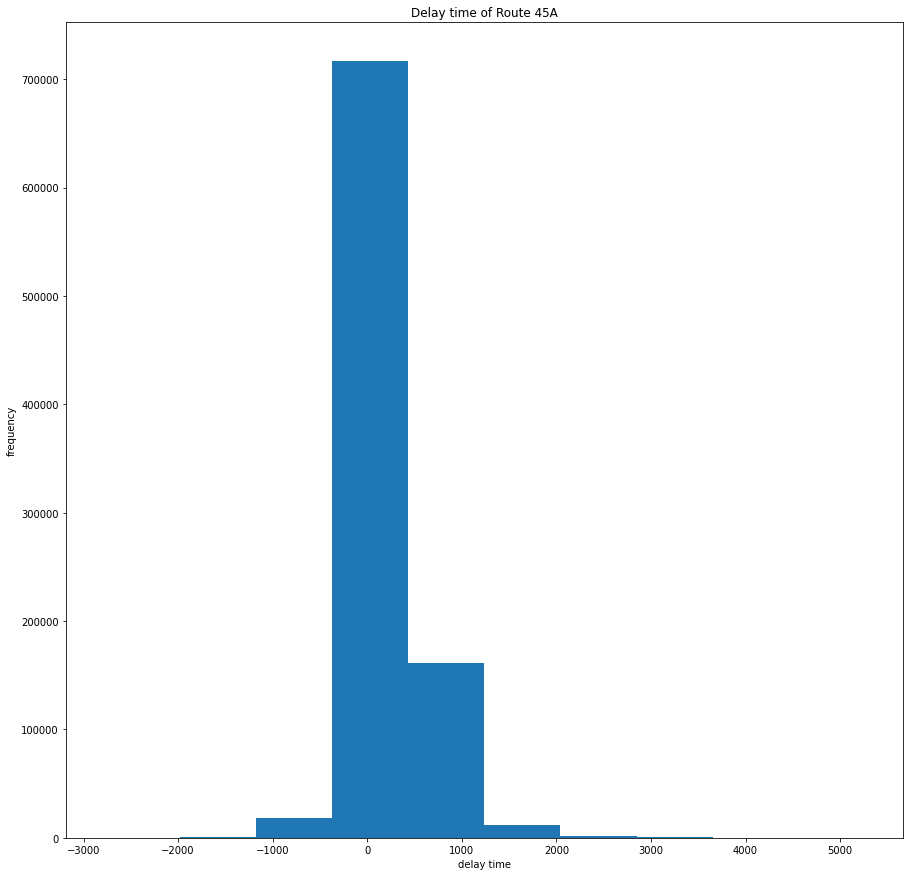

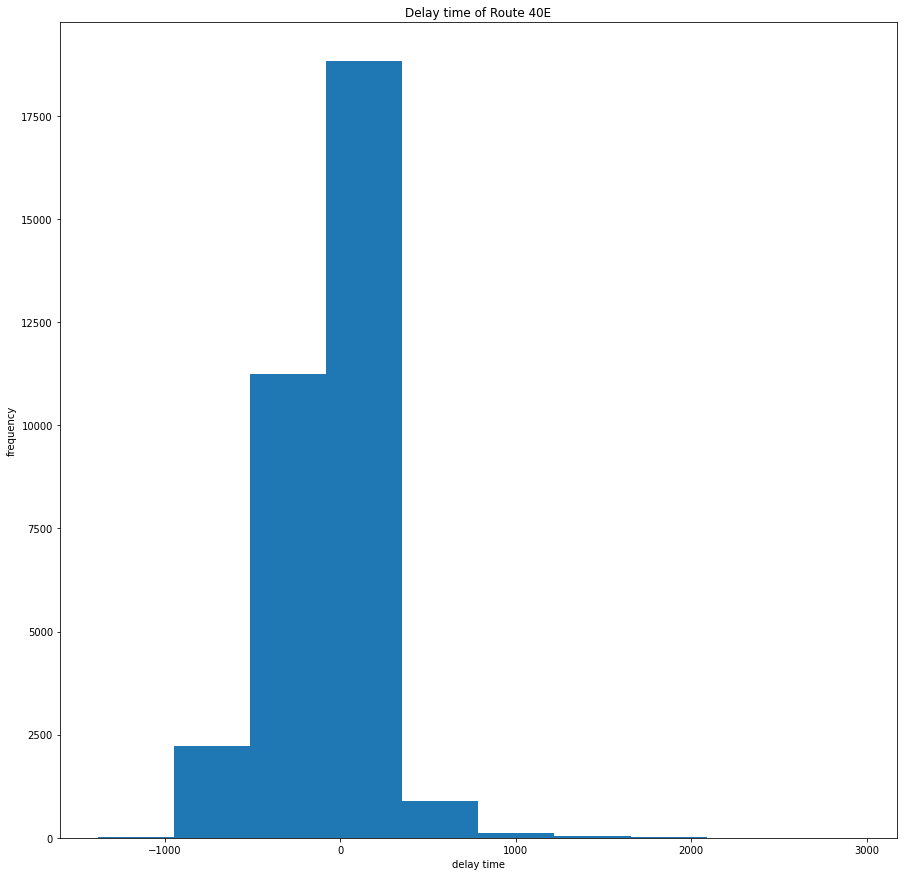

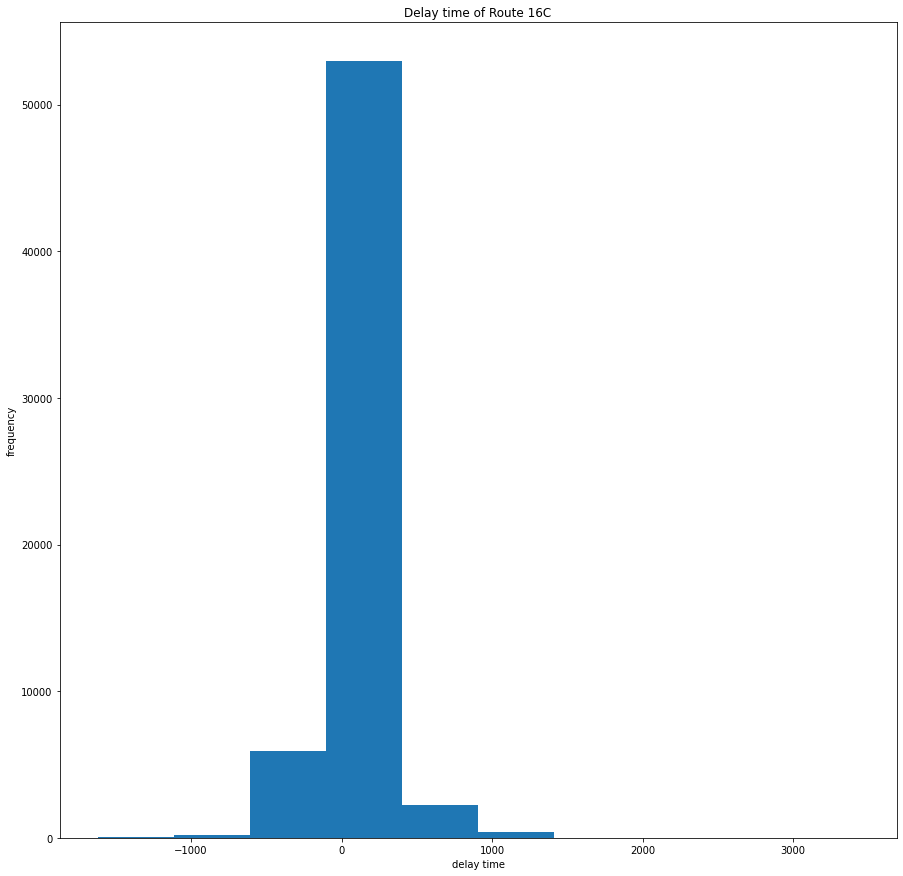

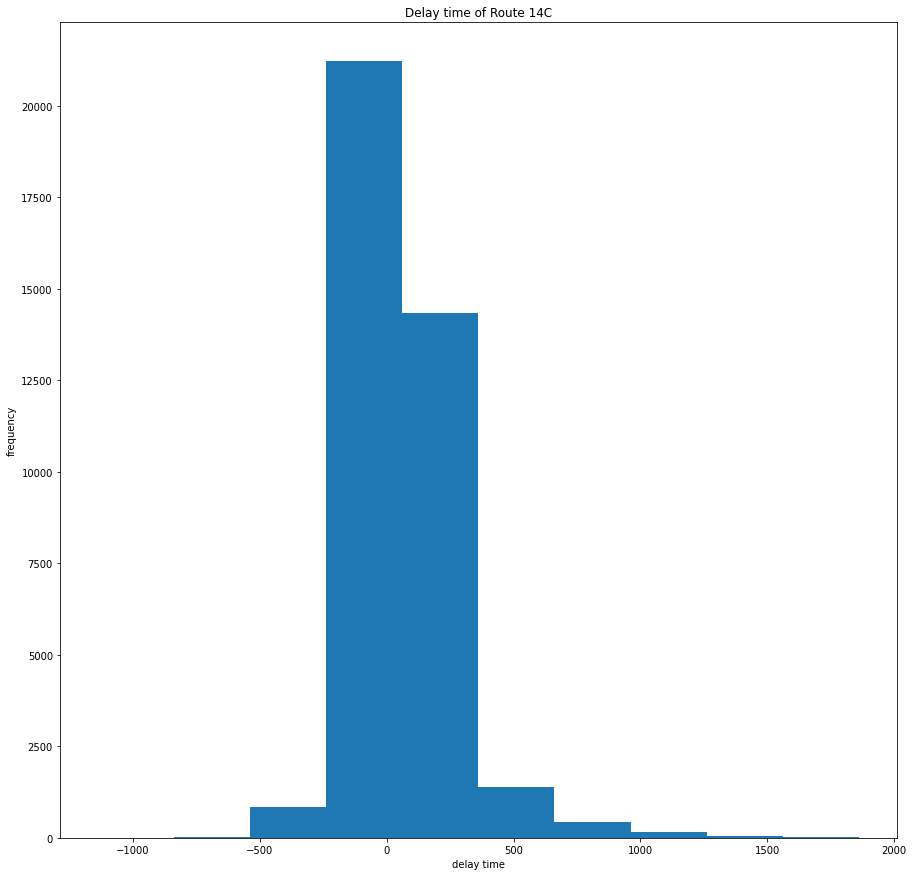

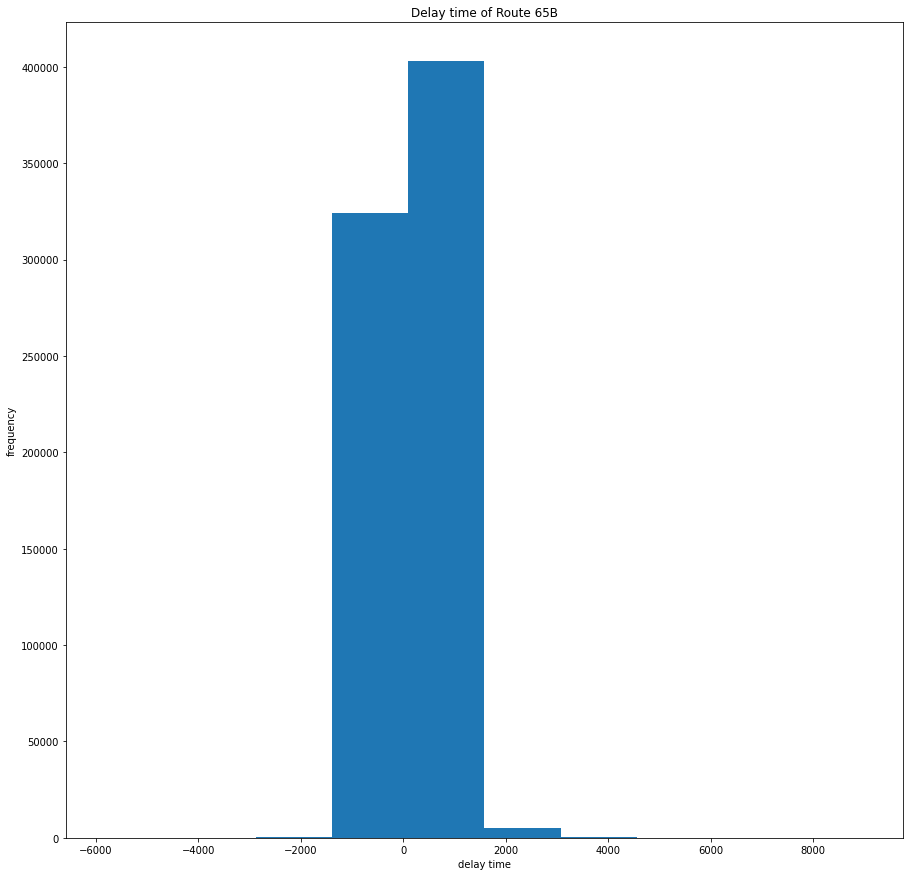

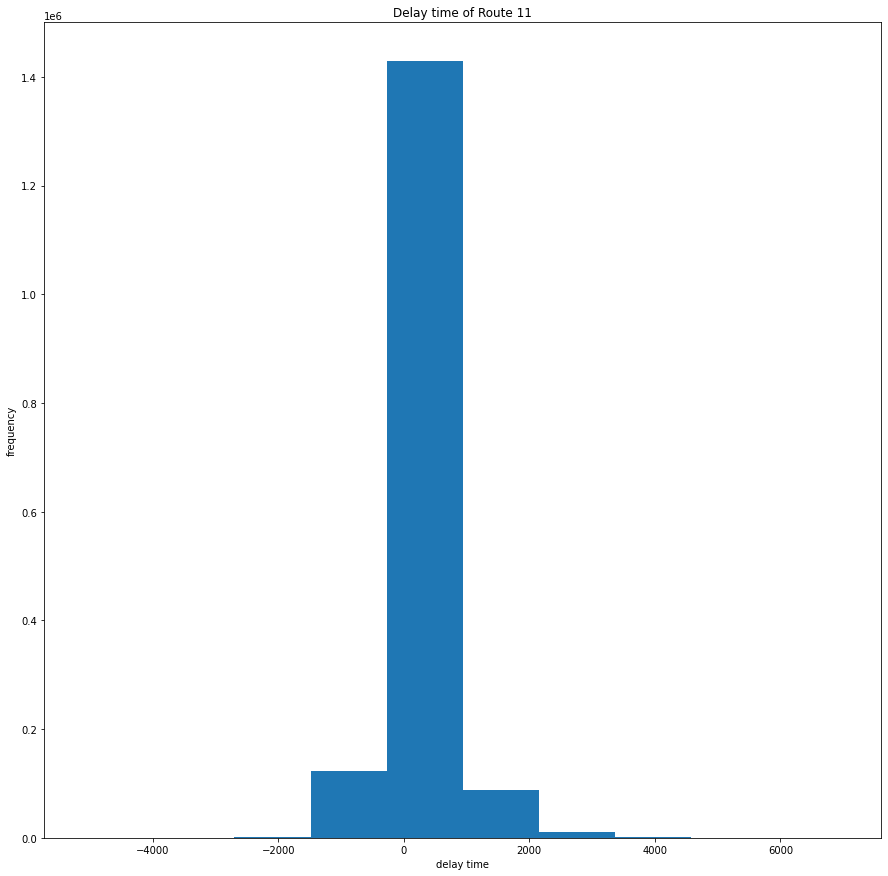

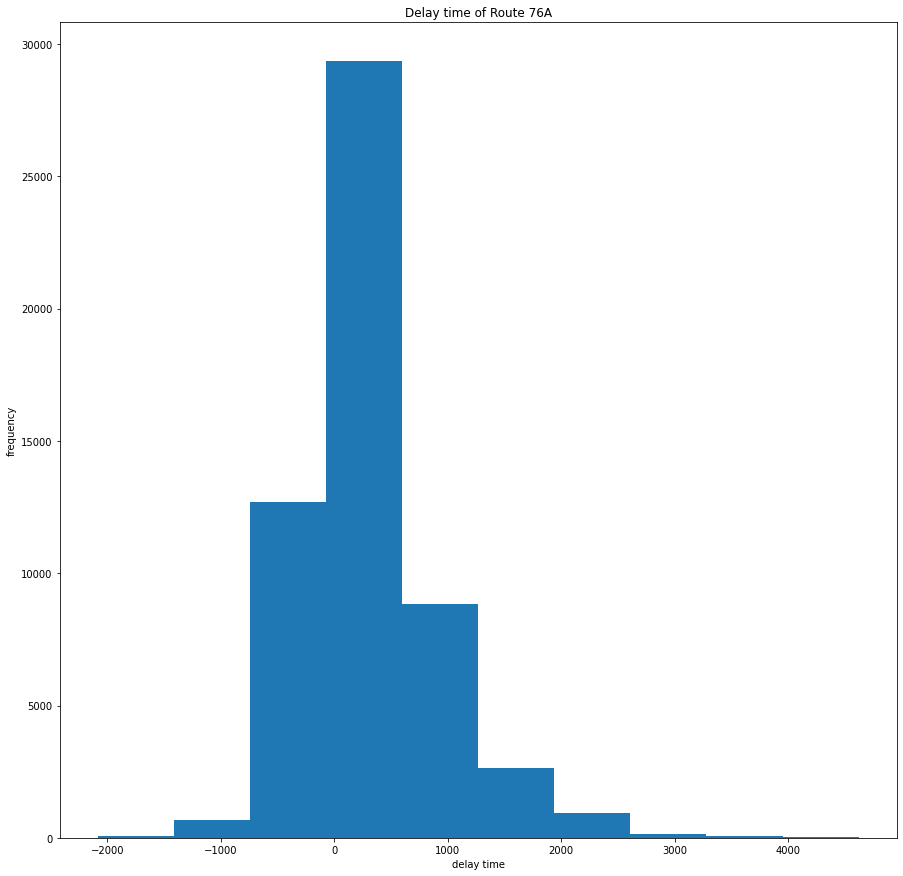

In [142]:
len_dir = len(os.listdir(directory))


for filename in os.listdir(directory):
    
    route = filename[5:]
    print(route)
    temp_route_df = read_dd_to_pandas("route"+route)
    delay = temp_route_df["ACTUALTIME_ARR"] - temp_route_df["PLANNEDTIME_ARR"]
    plt.figure(figsize=(15,15))
    plt.ioff()
    plt.xlabel("delay time")
    plt.ylabel("frequency")
    plt.title("Delay time of Route {}".format(route))
    plt.hist(delay, bins = 20)
    plt.savefig("images/delayTimesRoute{}".format(route))

In [104]:
route_pd_df = route_pd_df.drop("level_0", axis = 1)


KeyError: "['level_0'] not found in axis"

In [105]:
route_pd_df.head()

,index,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,JUSTIFICATIONID,LASTUPDATE,date_and_time
0,0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,NaN,NaN,2018-01-08 17:21:10,2018-01-01 13:00:00
1,1,2018-01-01,5966674,12,119,54001,54001,54023,54023,2693267,NaN,NaN,2018-01-08 17:21:10,2018-01-01 15:00:00
2,2,2018-01-01,5959105,12,119,60001,60001,59955,59955,2693263,NaN,NaN,2018-01-08 17:21:10,2018-01-01 16:00:00
3,3,2018-01-01,5966888,12,119,58801,58801,58771,58771,2693284,NaN,NaN,2018-01-08 17:21:10,2018-01-01 16:00:00
4,4,2018-01-01,5965960,12,119,56401,56401,56309,56323,2693209,NaN,NaN,2018-01-08 17:21:10,2018-01-01 15:00:00


In [106]:
# merge the route with the weather
combined_df = pd.merge(route_pd_df, weather_df, left_on="date_and_time", right_on="dt").reset_index()

In [107]:
combined_df.head()

,level_0,index,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,...,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,0,0,2018-01-01,5972116,12,119,48030,48030,48012,48012,...,81,12.86,280,0.3,NaN,75,520,Rain,light intensity shower rain,09d
1,1,25,2018-01-01,5965958,13,44,49279,49279,49187,49187,...,81,12.86,280,0.3,NaN,75,520,Rain,light intensity shower rain,09d
2,2,26,2018-01-01,5966672,13,44,46879,46879,46824,46835,...,81,12.86,280,0.3,NaN,75,520,Rain,light intensity shower rain,09d
3,3,29,2018-01-01,5972116,13,44,48079,48079,48058,48058,...,81,12.86,280,0.3,NaN,75,520,Rain,light intensity shower rain,09d
4,4,54,2018-01-01,5965958,14,7603,49314,49314,49201,49201,...,81,12.86,280,0.3,NaN,75,520,Rain,light intensity shower rain,09d


In [108]:
combined_df.drop("index", axis = 1, inplace = True)
combined_df.drop("level_0", axis = 1, inplace = True)

In [109]:
combined_df.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,...,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,NaN,...,81,12.86,280,0.3,NaN,75,520,Rain,light intensity shower rain,09d
1,2018-01-01,5965958,13,44,49279,49279,49187,49187,2693209,NaN,...,81,12.86,280,0.3,NaN,75,520,Rain,light intensity shower rain,09d
2,2018-01-01,5966672,13,44,46879,46879,46824,46835,2693267,NaN,...,81,12.86,280,0.3,NaN,75,520,Rain,light intensity shower rain,09d
3,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,NaN,...,81,12.86,280,0.3,NaN,75,520,Rain,light intensity shower rain,09d
4,2018-01-01,5965958,14,7603,49314,49314,49201,49201,2693209,NaN,...,81,12.86,280,0.3,NaN,75,520,Rain,light intensity shower rain,09d


In [110]:
unique_trips = combined_df["TRIPID"].unique()
len(unique_trips)

10549

In [111]:
combined_df["delay_amount"] = combined_df["ACTUALTIME_ARR"] - combined_df["PLANNEDTIME_ARR"]

In [112]:
#combined_df["planned_hour_arr"]
hours = combined_df["PLANNEDTIME_ARR"]//3600
#combined_df["planned_minute_arr"]

minutes= (combined_df["PLANNEDTIME_ARR"]%3600) // 60

combined_df["planned_arr_hours"] = hours
combined_df["planned_arr_minutes"] = minutes

In [115]:
combined_df.columns

Index(['DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID',
       'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'VEHICLEID', 'SUPPRESSED', 'JUSTIFICATIONID',
       'LASTUPDATE', 'date_and_time', 'dt', 'dt_iso', 'timezone', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_description', 'weather_icon',
       'delay_amount', 'planned_arr_hours', 'planned_arr_minutes'],
      dtype='object')

In [113]:
combined_df.head()

,DAYOFSERVICE,TRIPID,PROGRNUMBER,STOPPOINTID,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,VEHICLEID,SUPPRESSED,...,rain_1h,snow_1h,clouds_all,weather_id,weather_main,weather_description,weather_icon,delay_amount,planned_arr_hours,planned_arr_minutes
0,2018-01-01,5972116,12,119,48030,48030,48012,48012,2693211,NaN,...,0.3,NaN,75,520,Rain,light intensity shower rain,09d,-18,13,20
1,2018-01-01,5965958,13,44,49279,49279,49187,49187,2693209,NaN,...,0.3,NaN,75,520,Rain,light intensity shower rain,09d,-92,13,41
2,2018-01-01,5966672,13,44,46879,46879,46824,46835,2693267,NaN,...,0.3,NaN,75,520,Rain,light intensity shower rain,09d,-55,13,1
3,2018-01-01,5972116,13,44,48079,48079,48058,48058,2693211,NaN,...,0.3,NaN,75,520,Rain,light intensity shower rain,09d,-21,13,21
4,2018-01-01,5965958,14,7603,49314,49314,49201,49201,2693209,NaN,...,0.3,NaN,75,520,Rain,light intensity shower rain,09d,-113,13,41


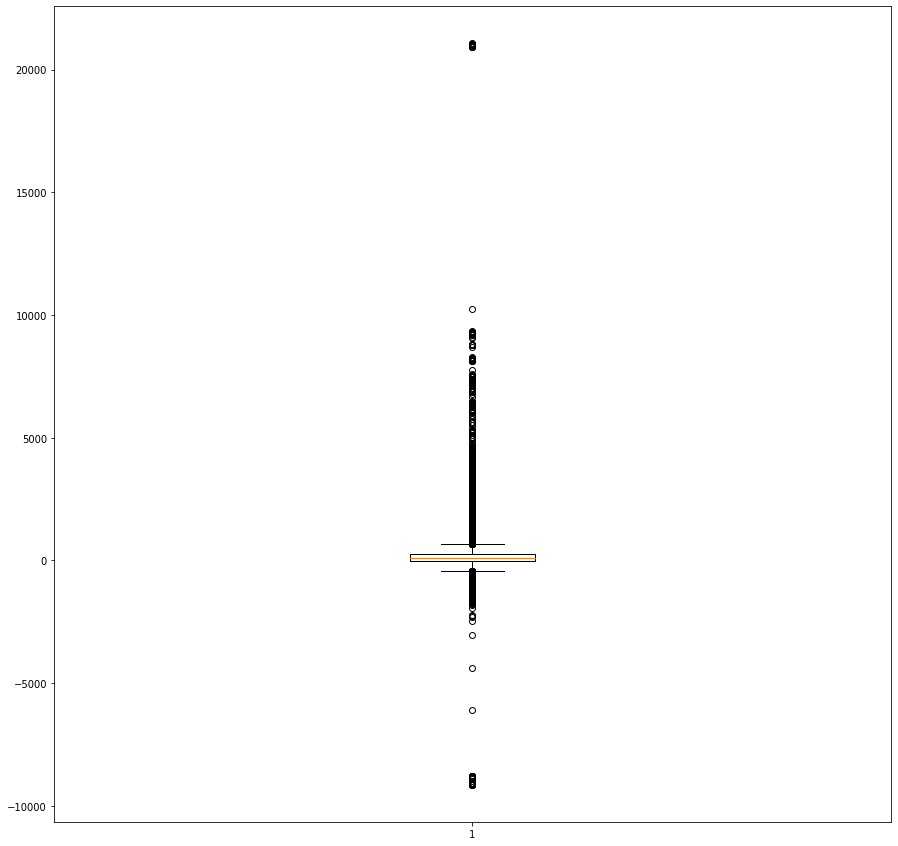

In [118]:
plt.figure(figsize = (15,15))
plt.boxplot(combined_df["delay_amount"])
plt.show()

In [144]:
# look for the relations between the features
target = combined_df["delay_amount"]

In [145]:
columns = combined_df.columns
print(columns)

Index(['DAYOFSERVICE', 'TRIPID', 'PROGRNUMBER', 'STOPPOINTID',
       'PLANNEDTIME_ARR', 'PLANNEDTIME_DEP', 'ACTUALTIME_ARR',
       'ACTUALTIME_DEP', 'VEHICLEID', 'SUPPRESSED', 'JUSTIFICATIONID',
       'LASTUPDATE', 'date_and_time', 'dt', 'dt_iso', 'timezone', 'temp',
       'feels_like', 'temp_min', 'temp_max', 'pressure', 'humidity',
       'wind_speed', 'wind_deg', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_id', 'weather_main', 'weather_description', 'weather_icon',
       'delay_amount', 'planned_arr_hours', 'planned_arr_minutes'],
      dtype='object')


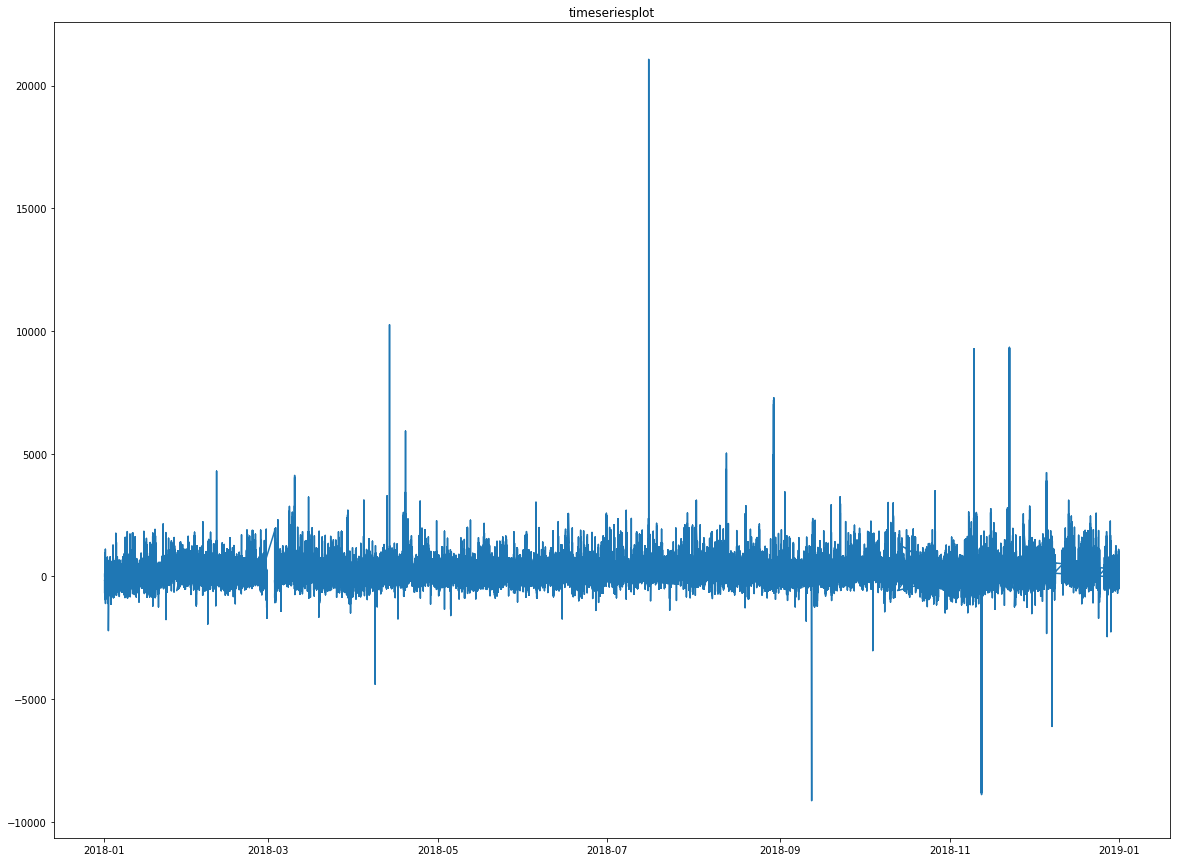

In [147]:
# important plot
first_x = combined_df["dt"]
plt.figure(figsize = (20,15))
plt.plot(first_x, target)
plt.title("timeseriesplot")
plt.ylabel("delay (seconds)")
plt.xlabel("date")
plt.show()

In [153]:
hourly_df = combined_df.groupby("planned_arr_hours").mean()

In [154]:
hourly_df.head()

,PLANNEDTIME_ARR,PLANNEDTIME_DEP,ACTUALTIME_ARR,ACTUALTIME_DEP,JUSTIFICATIONID,timezone,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_id,delay_amount,planned_arr_minutes
planned_arr_hours,,,,,,,,,,,,,,,,,,,,
6,24467.544847,24467.544847,24531.603875,24541.631452,4.849814e+17,1985.711879,281.375037,277.306700,280.484982,282.775983,1011.411345,87.836675,4.786996,201.631227,0.851961,0.140000,57.905757,732.046448,64.059028,47.327324
7,27048.879374,27048.879374,27133.074397,27145.003553,4.849814e+17,1863.091239,281.680534,277.441907,280.745745,282.951115,1011.372804,86.088251,5.016095,197.767369,0.874641,NaN,58.578426,728.104498,84.195023,30.358697
8,30564.271921,30564.271921,30686.777831,30704.869425,3.906066e+17,1952.912259,282.326144,278.099623,281.324694,283.437254,1011.900342,83.353048,5.026495,197.146676,0.690162,0.290000,58.384407,724.565357,122.505910,28.952678
9,34098.309411,34098.309411,34284.750903,34300.202696,3.953864e+17,1996.852549,283.082869,278.708441,281.990127,283.984104,1012.246158,80.487754,5.287558,192.918361,0.601079,0.288483,59.298983,729.193637,186.441492,27.834455
10,37718.012879,37718.012879,37841.608072,37857.224414,3.706250e+17,2041.579735,283.862654,279.297641,282.662409,284.624577,1012.498776,77.601858,5.606628,194.741416,0.612640,0.268879,60.515469,742.250149,123.595193,28.148385


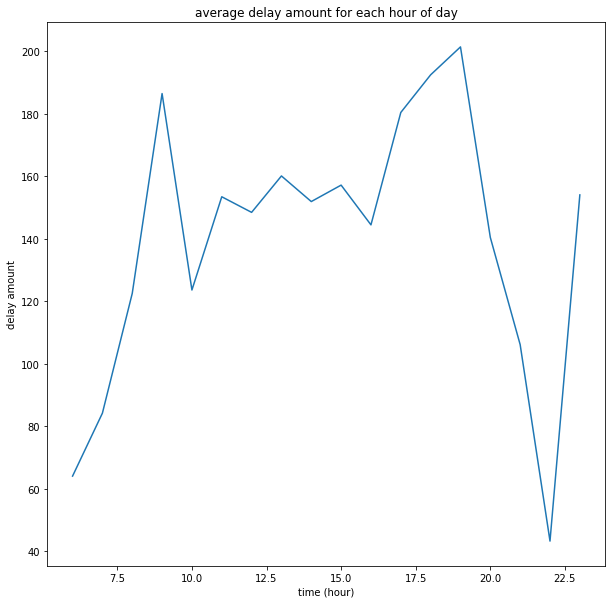

In [159]:
plt.figure(figsize = (10,10))
plt.plot(hourly_df.index,hourly_df["delay_amount"])
plt.title("average delay amount for each hour of day")
plt.ylabel("delay amount")
plt.xlabel("time (hour)")
plt.show()

In [160]:
hourly_minute_df = combined_df.groupby(["planned_arr_hours", "planned_arr_minutes"]).mean()

In [184]:
from datetime import time, datetime, timedelta

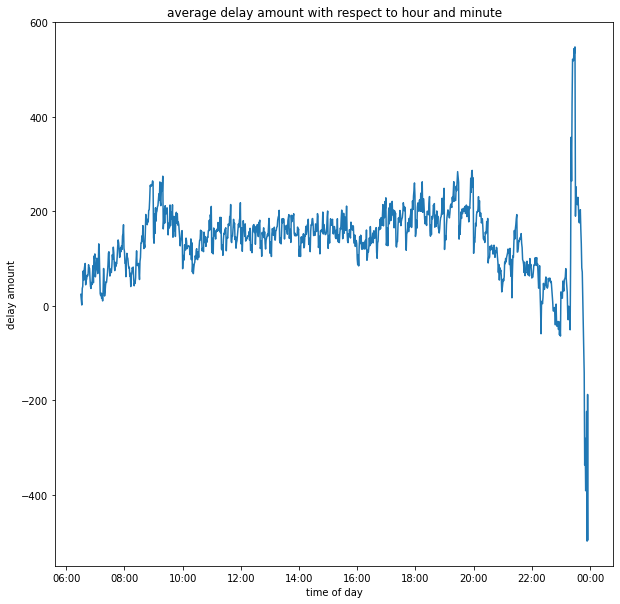

In [214]:
# picked random dates
x = [datetime(1990,1,1,element[0], element[1]) for element in hourly_minute_df.index]
y = hourly_minute_df["delay_amount"]
# plot
plt.figure(figsize = (10,10))
plt.plot(x,y)
myFmt = mdates.DateFormatter('%H:%M')
plt.gca().xaxis.set_major_formatter(myFmt)
plt.title("average delay amount with respect to hour and minute")
plt.xlabel("time of day")
plt.ylabel("delay amount")
plt.show()